**Youtube Trending Section Analysis - Canada**

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import pandas as pd
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib import cm
import seaborn as sns
import warnings
from collections import Counter
import datetime
import wordcloud
from wordcloud import WordCloud, STOPWORDS
import json
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
warnings.filterwarnings('ignore')

In [2]:
PLOT_COLORS = ["#268bd2", "#0052CC", "#FF5722", "#b58900", "#003f5c"]
pd.options.display.float_format = '{:.2f}'.format
sns.set(style="ticks")
plt.rc('figure', figsize=(8, 5), dpi=100)
plt.rc('axes', labelpad=20, facecolor="#ffffff", linewidth=0.4, grid=True, labelsize=14)
plt.rc('patch', linewidth=0)
plt.rc('xtick.major', width=0.2)
plt.rc('ytick.major', width=0.2)
plt.rc('grid', color='#9E9E9E', linewidth=0.4)
plt.rc('font', family='Arial', weight='400', size=10)
plt.rc('text', color='#282828')
plt.rc('savefig', pad_inches=0.3, dpi=300)

In [3]:
df = pd.read_csv("/home/sleepynav/Documents/Social Web/Youtube-Trending/Data/GBvideos.csv", index_col='video_id')

with open("/home/sleepynav/Documents/Social Web/Youtube-Trending/Data/GB_category_id.json") as f:
    categories = json.load(f)["items"]
cat_dict = {}
counts_titles = {}

for cat in categories:
    cat_dict[int(cat["id"])] = cat["snippet"]["title"]
df['category_name'] = df['category_id'].map(cat_dict)

In [4]:
df.head(5)

trending_date                                              title  \
video_id                                                                       
Jw1Y-zhQURU      17.14.11      John Lewis Christmas Ad 2017 - #MozTheMonster   
3s1rvMFUweQ      17.14.11          Taylor Swift: …Ready for It? (Live) - SNL   
n1WpP7iowLc      17.14.11         Eminem - Walk On Water (Audio) ft. Beyoncé   
PUTEiSjKwJU      17.14.11  Goals from Salford City vs Class of 92 and Fri...   
rHwDegptbI4      17.14.11  Dashcam captures truck's near miss with child ...   

                          channel_title  category_id  \
video_id                                               
Jw1Y-zhQURU                  John Lewis           26   
3s1rvMFUweQ         Saturday Night Live           24   
n1WpP7iowLc                  EminemVEVO           10   
PUTEiSjKwJU  Salford City Football Club           17   
rHwDegptbI4            Cute Girl Videos           25   

                         publish_time  \
video_id                                
Jw1Y-zhQURU  2017-11-10T07:38:29.000Z   
3s1rvMFUweQ  2017-11-12T06:24:44.000Z   
n1WpP7iowLc  2017-11-10T17:00:03.000Z   
PUTEiSjKwJU  2017-11-13T02:30:38.000Z   
rHwDegptbI4  2017-11-13T01:45:13.000Z   

                                                          tags     views  \
video_id                                                                   
Jw1Y-zhQURU  christmas|"john lewis christmas"|"john lewis"|...   7224515   
3s1rvMFUweQ  SNL|"Saturday Night Live"|"SNL Season 43"|"Epi...   1053632   
n1WpP7iowLc  Eminem|"Walk"|"On"|"Water"|"Aftermath/Shady/In...  17158579   
PUTEiSjKwJU  Salford City FC|"Salford City"|"Salford"|"Clas...     27833   
rHwDegptbI4                                             [none]      9815   

              likes  dislikes  comment_count  \
video_id                                       
Jw1Y-zhQURU   55681     10247           9479   
3s1rvMFUweQ   25561      2294           2757   
n1WpP7iowLc  787420     43420         125882   
PUTEiSjKwJU     193        12             37   
rHwDegptbI4      30         2             30   

                                             thumbnail_link  \
video_id                                                      
Jw1Y-zhQURU  https://i.ytimg.com/vi/Jw1Y-zhQURU/default.jpg   
3s1rvMFUweQ  https://i.ytimg.com/vi/3s1rvMFUweQ/default.jpg   
n1WpP7iowLc  https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg   
PUTEiSjKwJU  https://i.ytimg.com/vi/PUTEiSjKwJU/default.jpg   
rHwDegptbI4  https://i.ytimg.com/vi/rHwDegptbI4/default.jpg   

             comments_disabled  ratings_disabled  video_error_or_removed  \
video_id                                                                   
Jw1Y-zhQURU              False             False                   False   
3s1rvMFUweQ              False             False                   False   
n1WpP7iowLc              False             False                   False   
PUTEiSjKwJU              False             False                   False   
rHwDegptbI4              False             False                   False   

                                                   description  \
video_id                                                         
Jw1Y-zhQURU  Click here to continue the story and make your...   
3s1rvMFUweQ  Musical guest Taylor Swift performs …Ready for...   
n1WpP7iowLc  Eminem's new track Walk on Water ft. Beyoncé i...   
PUTEiSjKwJU  Salford drew 4-4 against the Class of 92 and F...   
rHwDegptbI4  Dashcam captures truck's near miss with child ...   

               category_name  
video_id                      
Jw1Y-zhQURU    Howto & Style  
3s1rvMFUweQ    Entertainment  
n1WpP7iowLc            Music  
PUTEiSjKwJU           Sports  
rHwDegptbI4  News & Politics

In [5]:
cat_dict

{1: 'Film & Animation',
 2: 'Autos & Vehicles',
 10: 'Music',
 15: 'Pets & Animals',
 17: 'Sports',
 18: 'Short Movies',
 19: 'Travel & Events',
 20: 'Gaming',
 21: 'Videoblogging',
 22: 'People & Blogs',
 23: 'Comedy',
 24: 'Entertainment',
 25: 'News & Politics',
 26: 'Howto & Style',
 27: 'Education',
 28: 'Science & Technology',
 30: 'Movies',
 31: 'Anime/Animation',
 32: 'Action/Adventure',
 33: 'Classics',
 34: 'Comedy',
 35: 'Documentary',
 36: 'Drama',
 37: 'Family',
 38: 'Foreign',
 39: 'Horror',
 40: 'Sci-Fi/Fantasy',
 41: 'Thriller',
 42: 'Shorts',
 43: 'Shows',
 44: 'Trailers'}

In [6]:
df[['category_id', 'category_name']].head()

category_id    category_name
video_id                                 
Jw1Y-zhQURU           26    Howto & Style
3s1rvMFUweQ           24    Entertainment
n1WpP7iowLc           10            Music
PUTEiSjKwJU           17           Sports
rHwDegptbI4           25  News & Politics

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38916 entries, Jw1Y-zhQURU to 4YFo4bdMO8Q
Data columns (total 16 columns):
trending_date             38916 non-null object
title                     38916 non-null object
channel_title             38916 non-null object
category_id               38916 non-null int64
publish_time              38916 non-null object
tags                      38916 non-null object
views                     38916 non-null int64
likes                     38916 non-null int64
dislikes                  38916 non-null int64
comment_count             38916 non-null int64
thumbnail_link            38916 non-null object
comments_disabled         38916 non-null bool
ratings_disabled          38916 non-null bool
video_error_or_removed    38916 non-null bool
description               38304 non-null object
category_name             38826 non-null object
dtypes: bool(3), int64(5), object(8)
memory usage: 4.3+ MB


In [8]:
category_count = df['category_name'].value_counts()
category_count

Music                   13754
Entertainment            9124
People & Blogs           2926
Film & Animation         2577
Howto & Style            1928
Sports                   1907
Comedy                   1828
Gaming                   1788
News & Politics          1225
Pets & Animals            534
Science & Technology      518
Education                 457
Autos & Vehicles          144
Travel & Events            96
Shows                      20
Name: category_name, dtype: int64

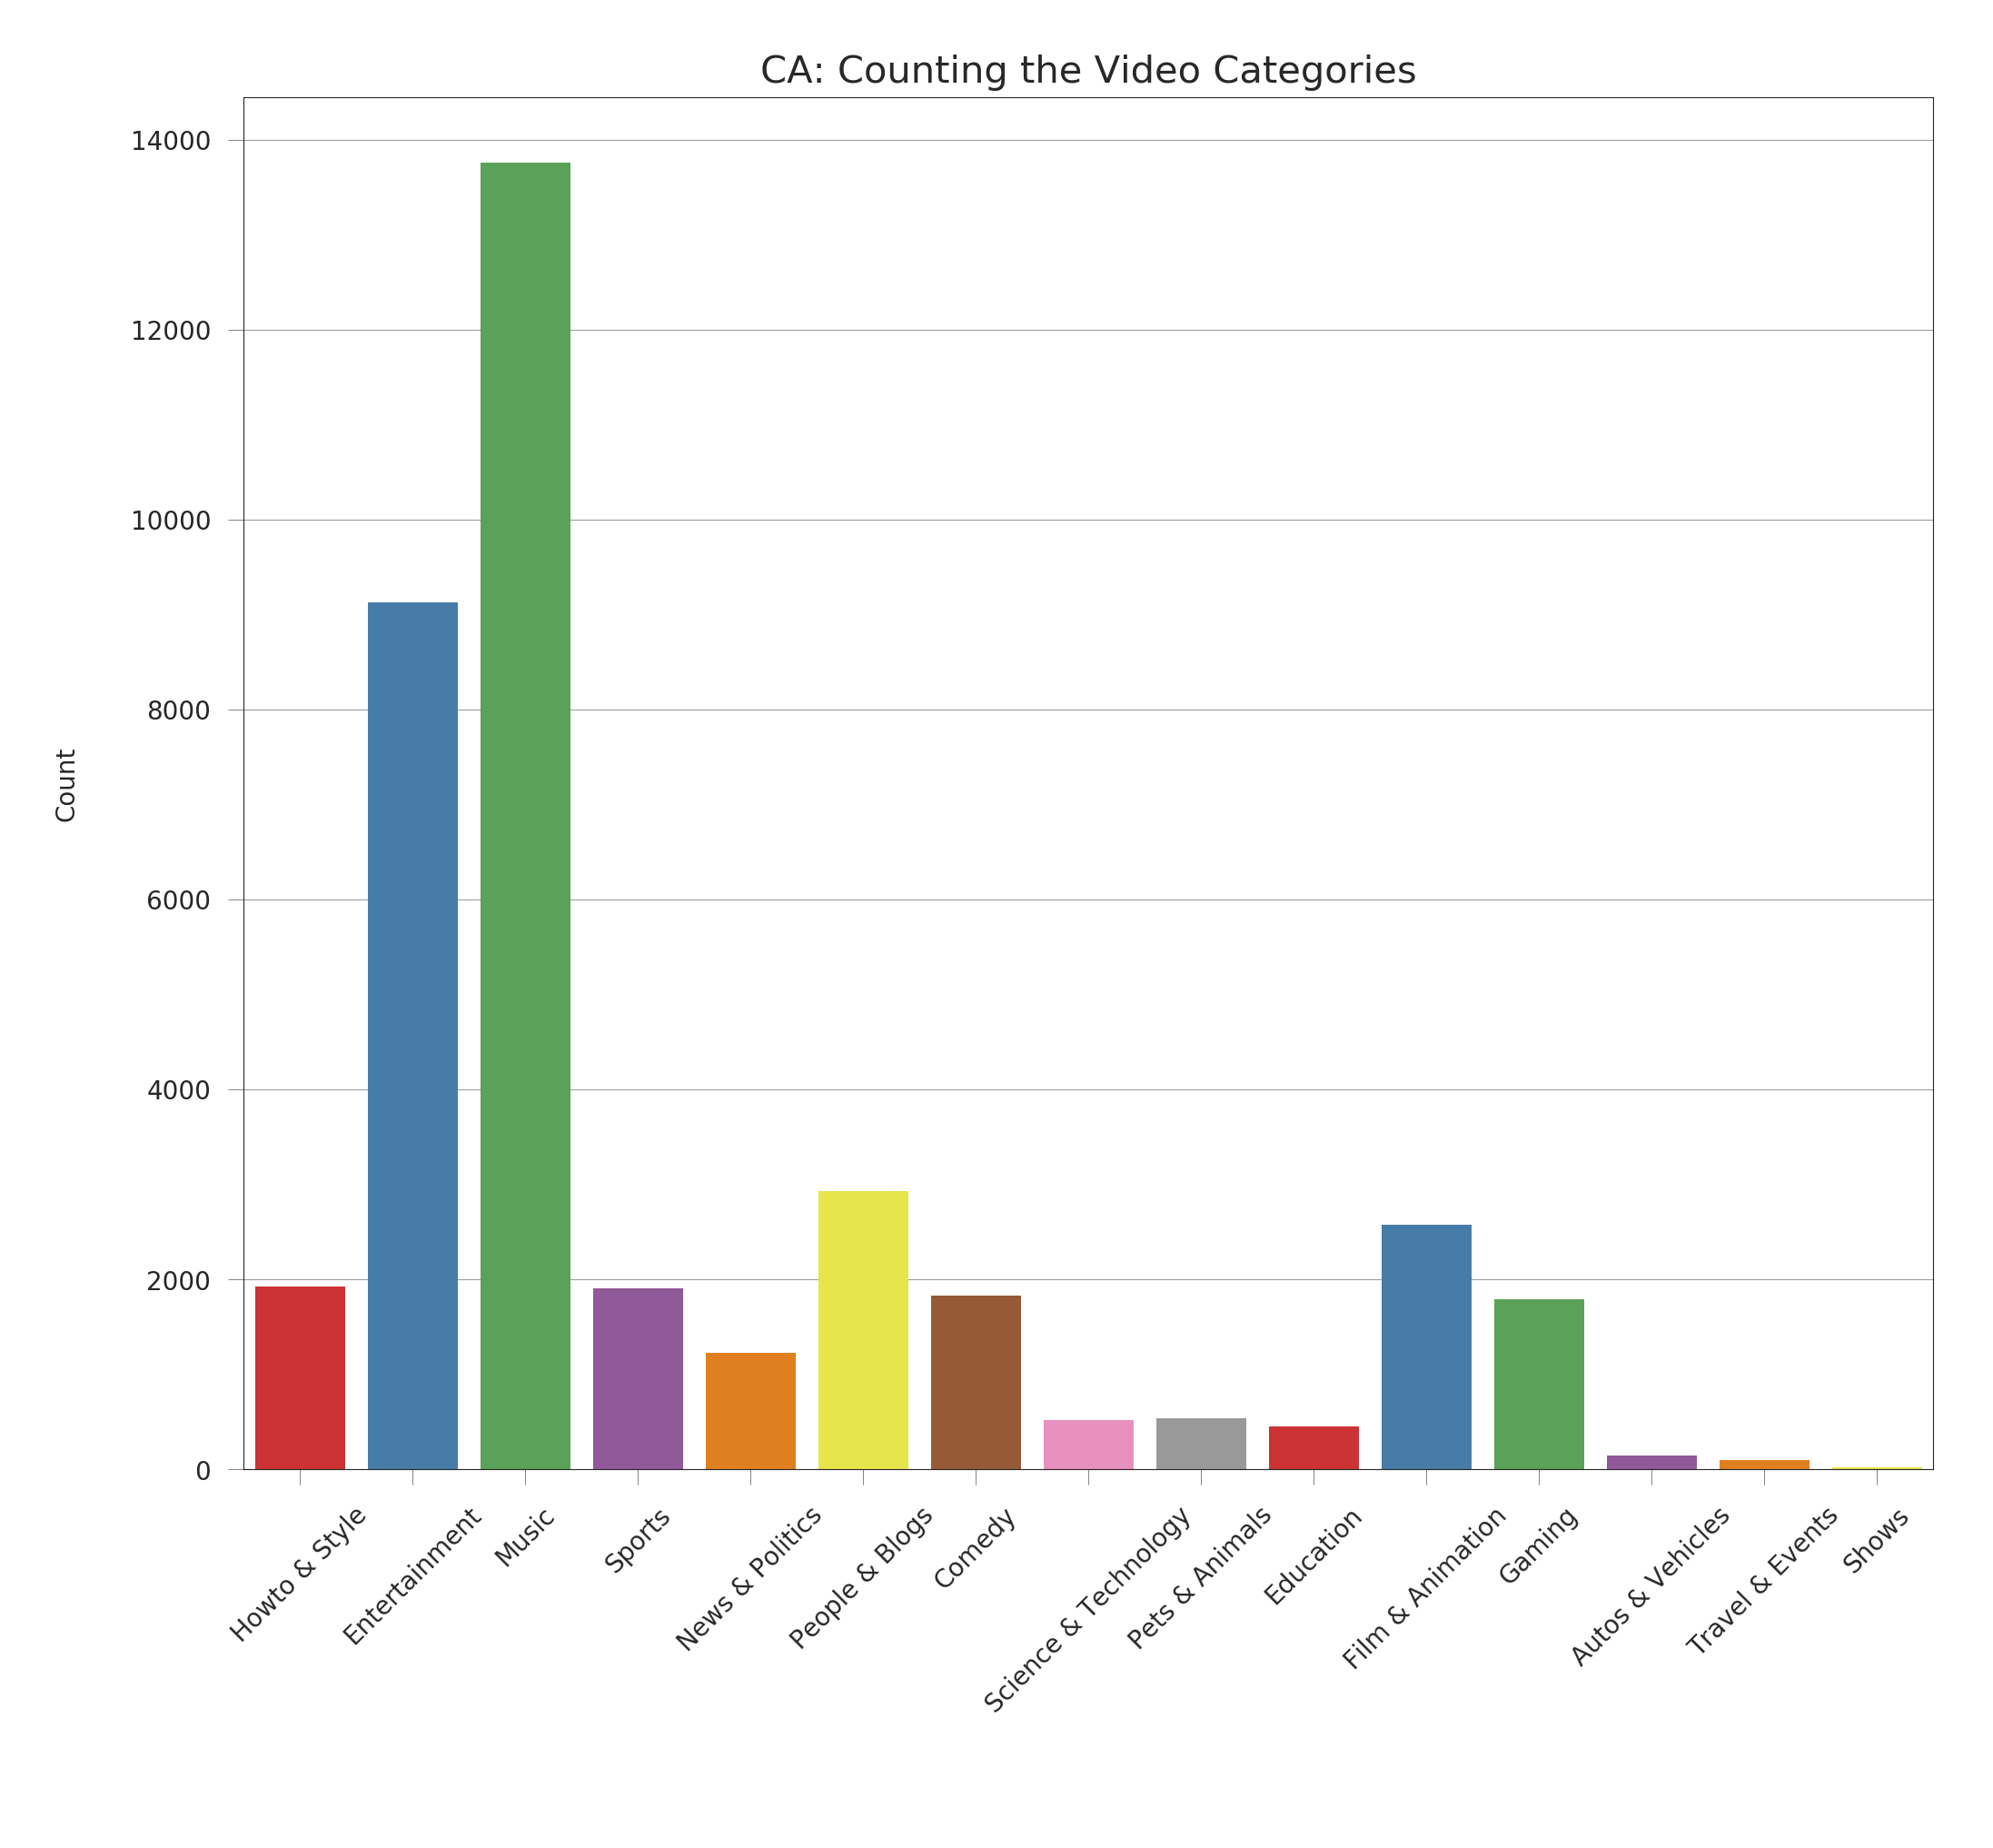

In [9]:
plt.figure(figsize = (12,10))
g = sns.countplot('category_name', data=df, palette="Set1")
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_title("CA: Counting the Video Categories", fontsize=15)
g.set_xlabel(" ", fontsize=10)
g.set_ylabel("Count", fontsize=10);

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38916 entries, Jw1Y-zhQURU to 4YFo4bdMO8Q
Data columns (total 16 columns):
trending_date             38916 non-null object
title                     38916 non-null object
channel_title             38916 non-null object
category_id               38916 non-null int64
publish_time              38916 non-null object
tags                      38916 non-null object
views                     38916 non-null int64
likes                     38916 non-null int64
dislikes                  38916 non-null int64
comment_count             38916 non-null int64
thumbnail_link            38916 non-null object
comments_disabled         38916 non-null bool
ratings_disabled          38916 non-null bool
video_error_or_removed    38916 non-null bool
description               38304 non-null object
category_name             38826 non-null object
dtypes: bool(3), int64(5), object(8)
memory usage: 5.5+ MB


In [11]:
df["publishing_day"] = df["publish_time"].apply(
    lambda x: datetime.datetime.strptime(x[:10], "%Y-%m-%d").date().strftime('%a'))
df["publishing_hour"] = df["publish_time"].apply(lambda x: x[11:13])

In [12]:
df["publishing_day"].value_counts()

Fri    7634
Wed    7333
Thu    7159
Tue    5952
Mon    5821
Sun    2815
Sat    2202
Name: publishing_day, dtype: int64

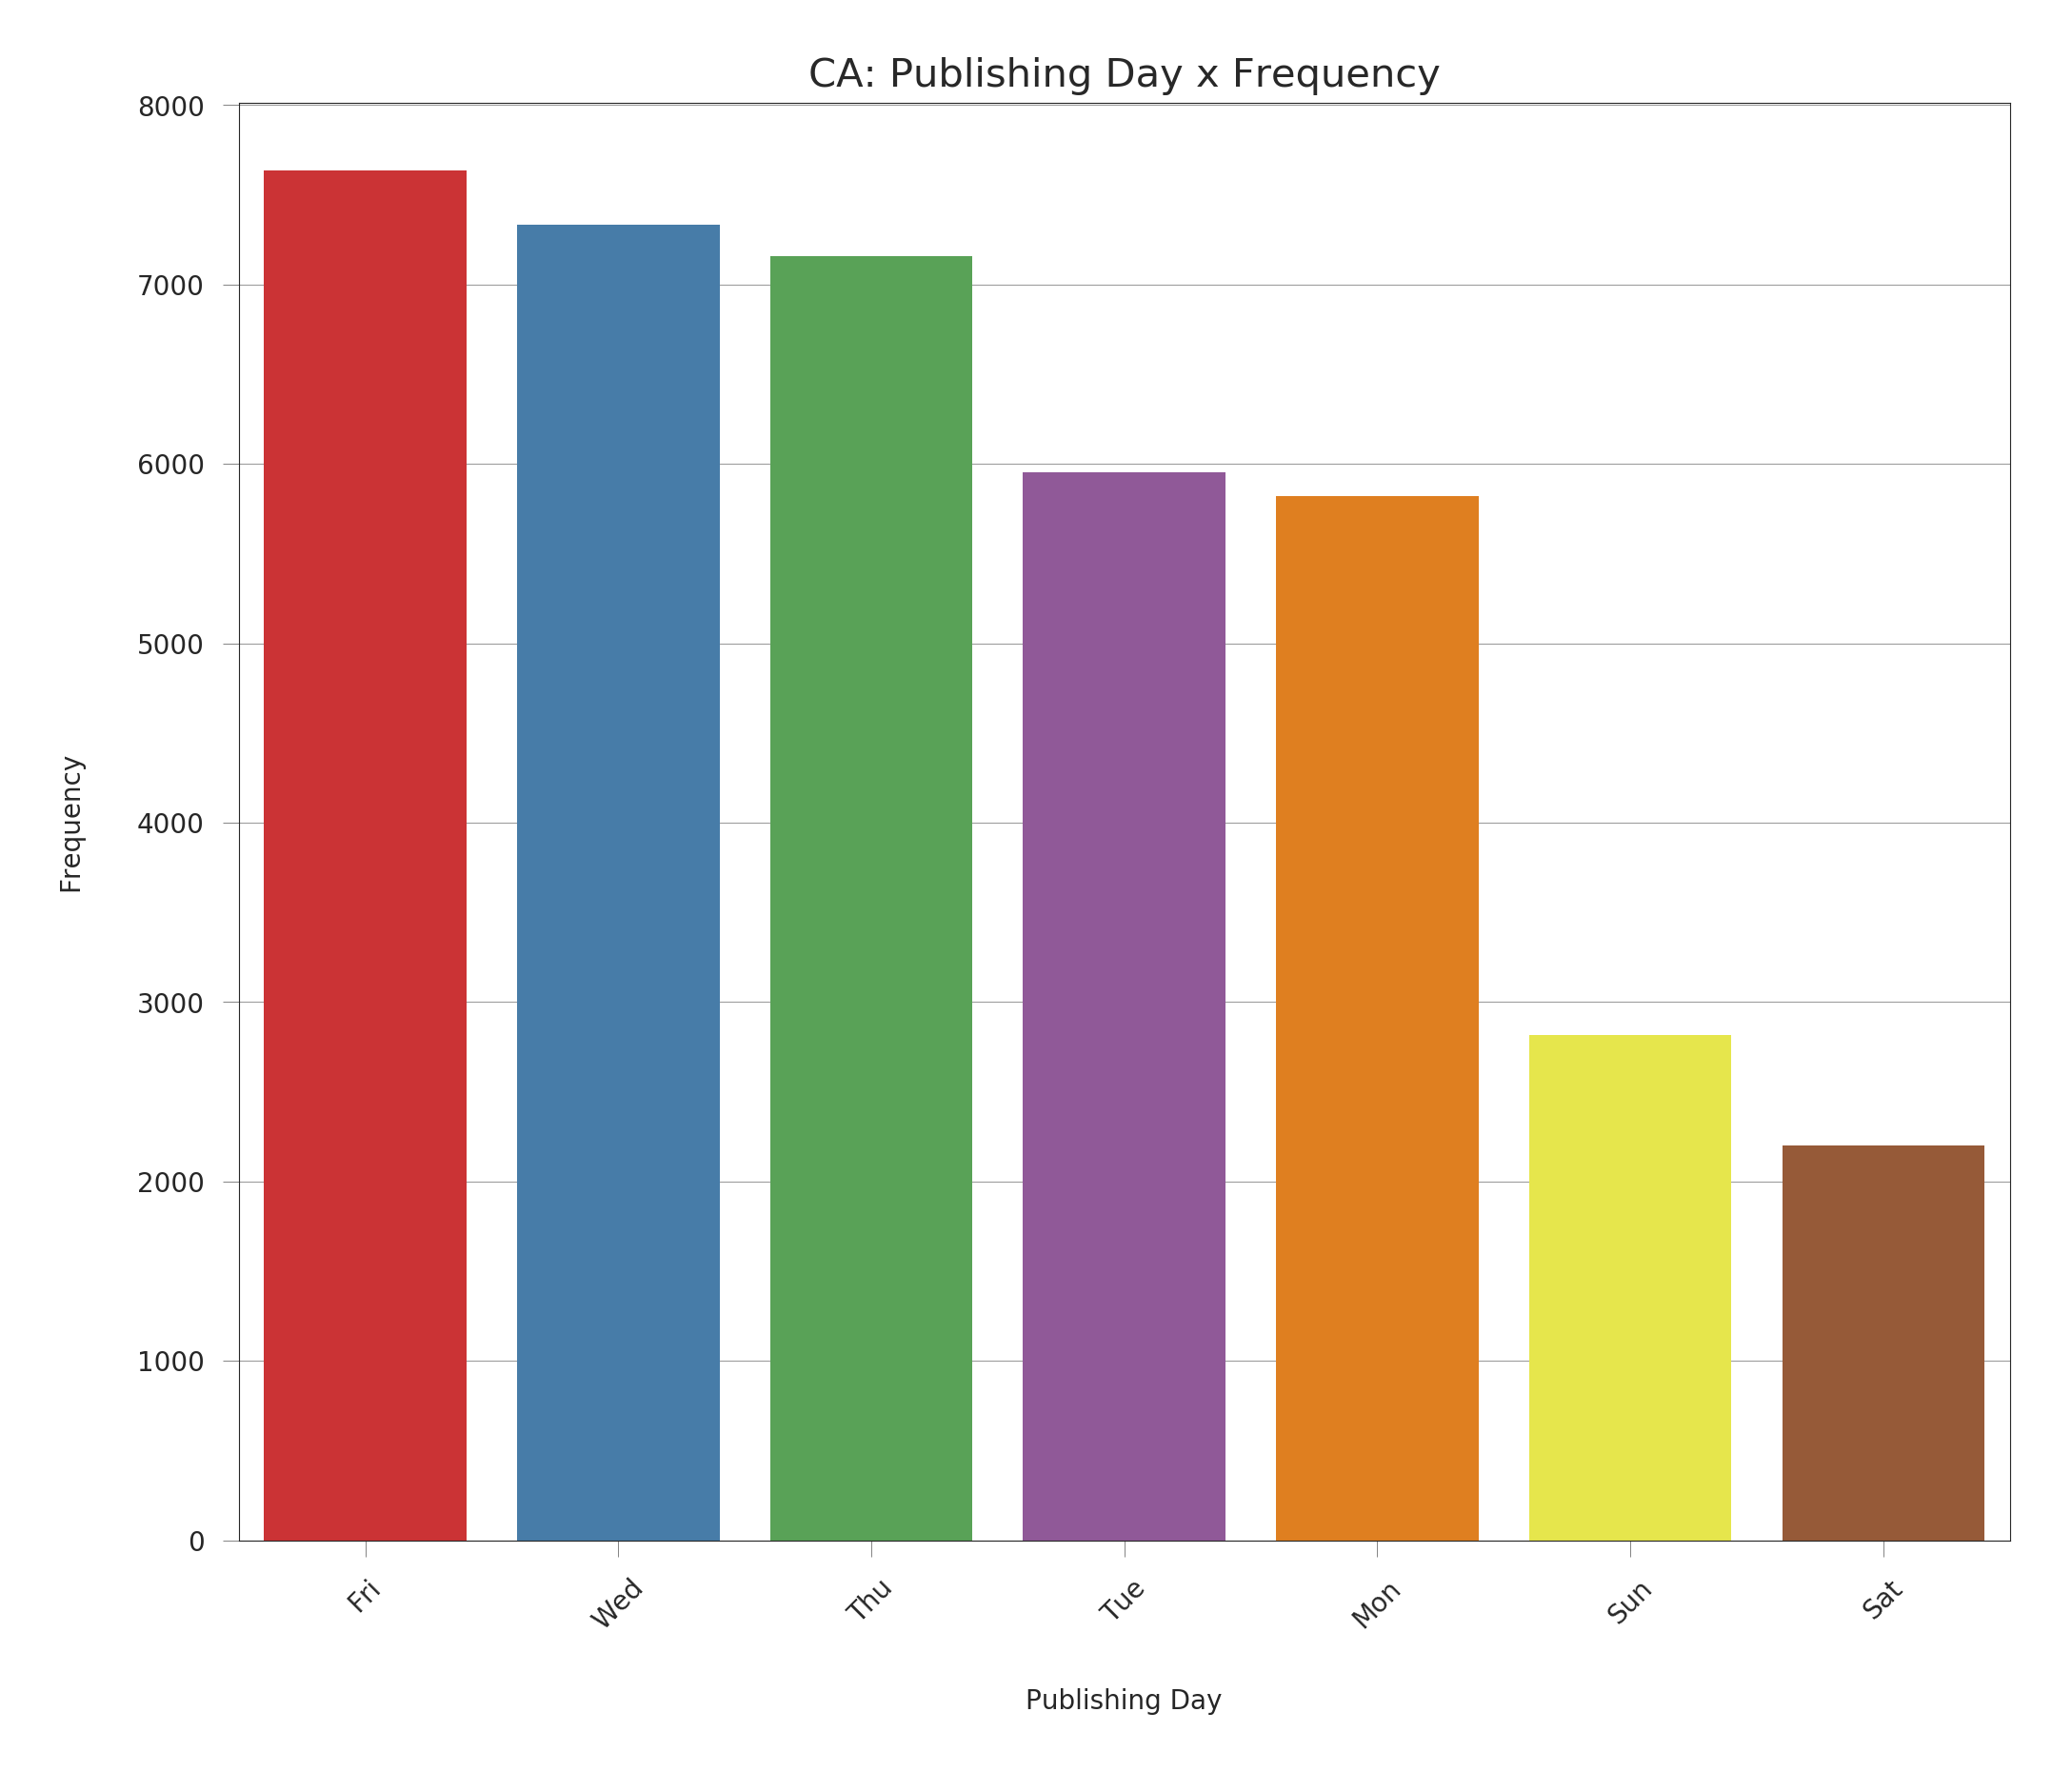

In [13]:
publishD_df= df["publishing_day"].value_counts()\
        .to_frame().reset_index().rename(columns={"index": "publishing_day", "publishing_day": "No_of_videos"})

plt.figure(figsize = (12,10))
g = sns.barplot(x="publishing_day", y="No_of_videos", data=publishD_df, palette="Set1")
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_title("CA: Publishing Day x Frequency", fontsize=15)
g.set_xlabel("Publishing Day", fontsize=10)
g.set_ylabel("Frequency", fontsize=10);

In [14]:
df["publishing_hour"].value_counts()

17    3410
16    3231
15    3014
14    2372
18    2281
05    2147
19    2052
13    1968
04    1808
21    1699
20    1555
22    1513
09    1374
12    1355
00    1140
02    1105
23    1078
01    1072
08    1028
03     969
10     795
11     715
06     618
07     617
Name: publishing_hour, dtype: int64

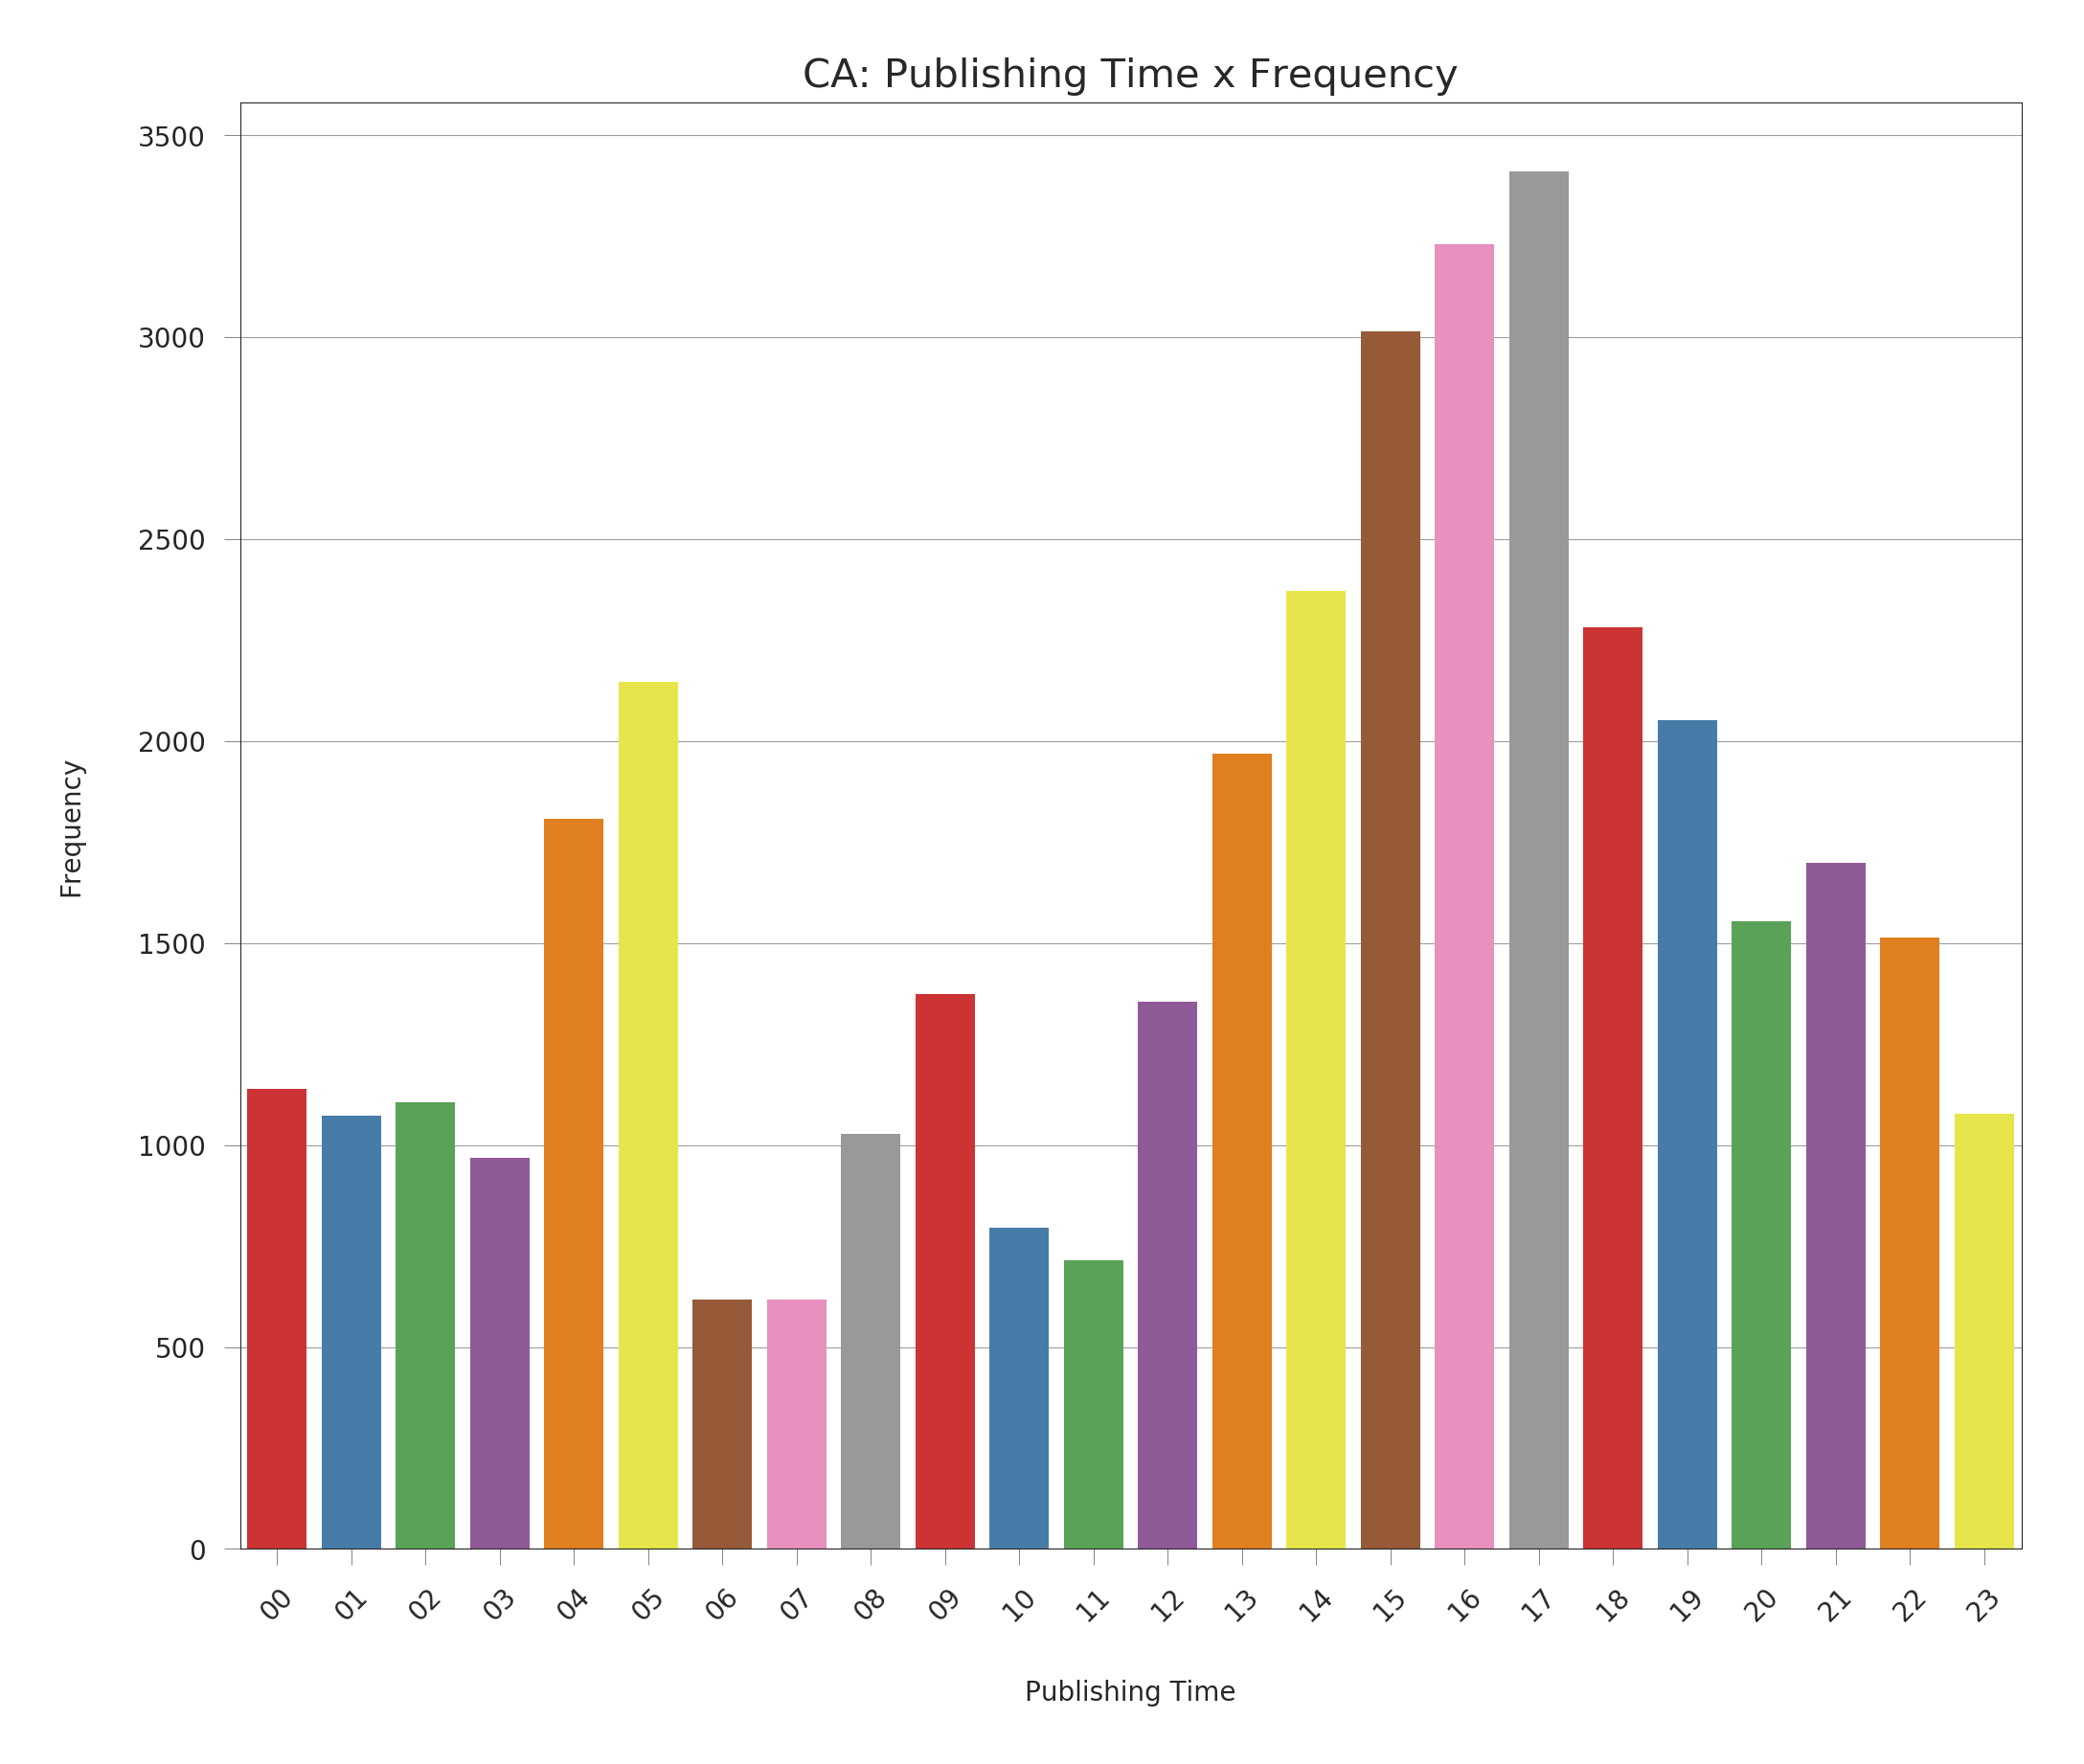

In [15]:
publishT_df= df["publishing_hour"].value_counts()\
        .to_frame().reset_index().rename(columns={"index": "publishing_hour", "publishing_hour": "No_of_videos"})

plt.figure(figsize = (12,10))
g = sns.barplot(x="publishing_hour", y="No_of_videos", data=publishT_df, palette="Set1")
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_title("CA: Publishing Time x Frequency", fontsize=15)
g.set_xlabel("Publishing Time", fontsize=10)
g.set_ylabel("Frequency", fontsize=10);

In [16]:
df["trending_date"].apply(lambda x: '20' + x[:2]).value_counts()

2018    29323
2017     9593
Name: trending_date, dtype: int64

In [17]:
df["trending_date"].apply(lambda x: '20' + x[:2]).value_counts(normalize=True)

2018   0.75
2017   0.25
Name: trending_date, dtype: float64

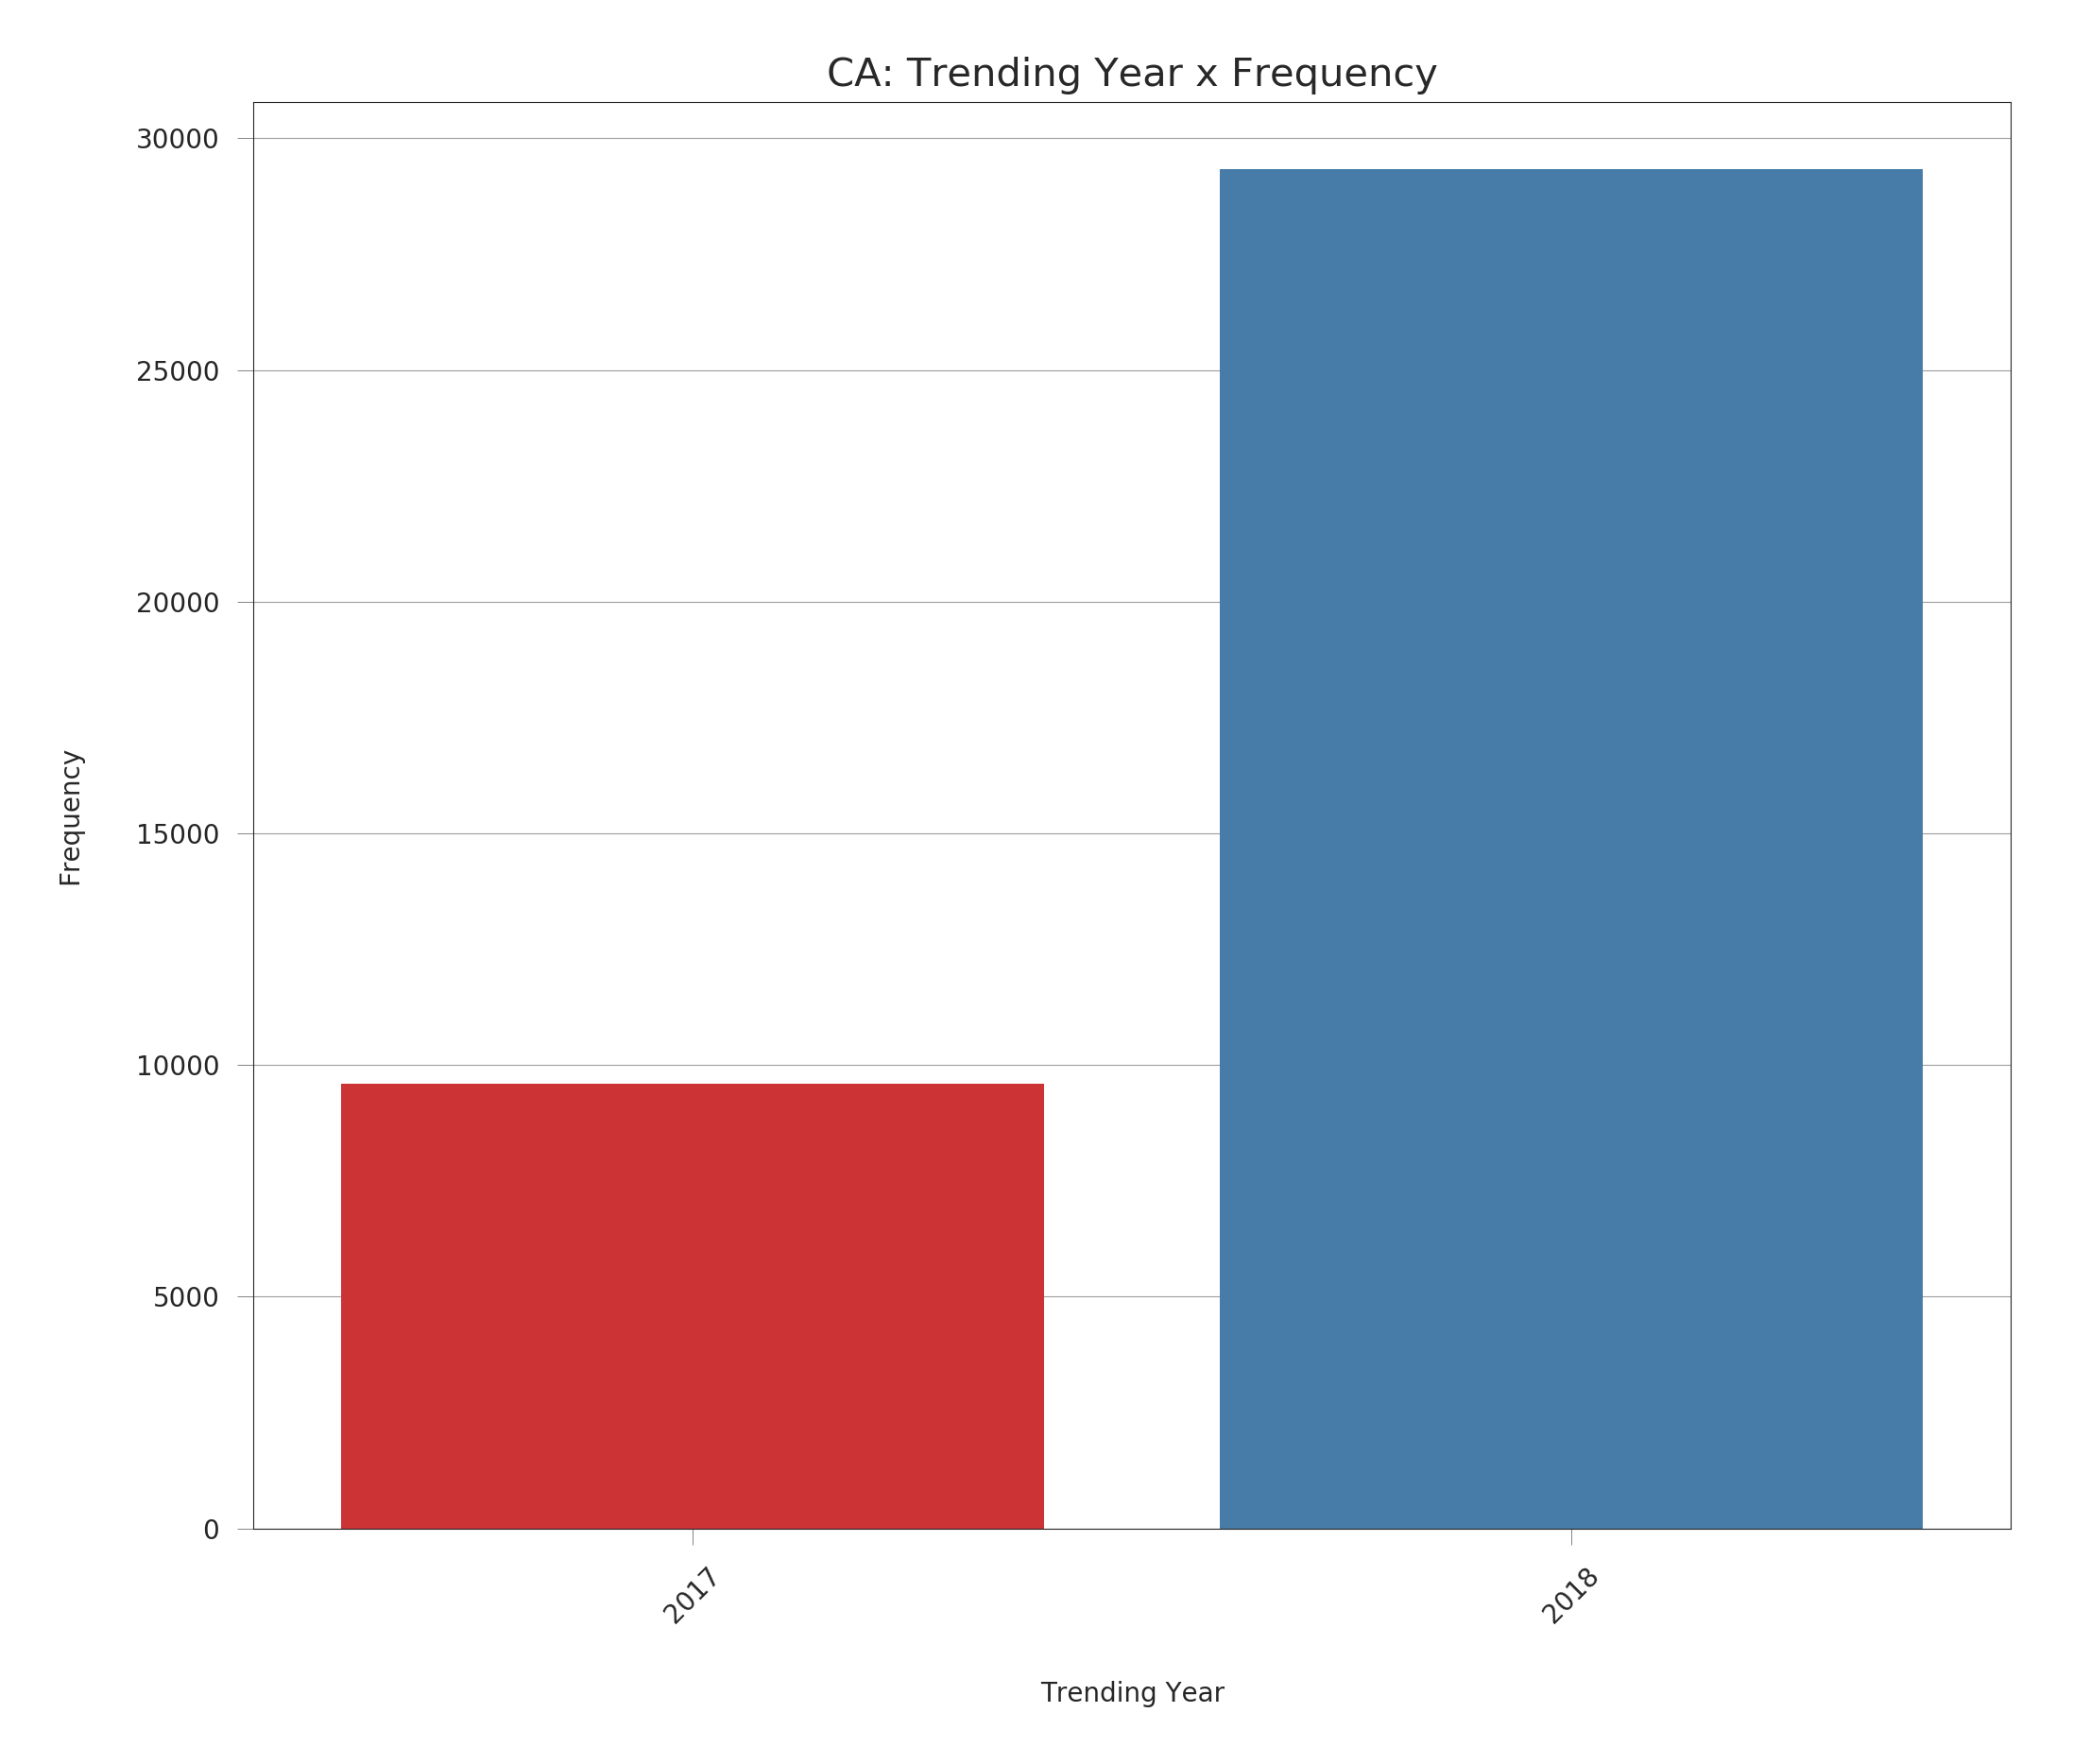

In [18]:
trendingY_df = df["trending_date"].apply(lambda x: '20' + x[:2]).value_counts() \
            .to_frame().reset_index() \
            .rename(columns={"index": "year", "trending_date": "No_of_videos"})

plt.figure(figsize = (12,10))
g = sns.barplot(x="year", y="No_of_videos", data=trendingY_df , palette="Set1")
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_title("CA: Trending Year x Frequency", fontsize=15)
g.set_xlabel("Trending Year", fontsize=10)
g.set_ylabel("Frequency", fontsize=10);

In [19]:
df.describe()

category_id        views      likes   dislikes  comment_count
count     38916.00     38916.00   38916.00   38916.00       38916.00
mean         16.83   5911943.63  134519.55    7612.56       13088.35
std           7.75  19001209.95  349989.31   50956.83       50667.40
min           1.00       851.00       0.00       0.00           0.00
25%          10.00    251527.25    5897.00     200.00         679.00
50%          20.00    981889.00   25182.50     821.00        2478.00
75%          24.00   3683628.50  114089.25    3357.50        9241.50
max          43.00 424538912.00 5613827.00 1944971.00     1626501.00

In [20]:
df.info()

type_int_list = ['views', 'likes', 'dislikes', 'comment_count']
for column in type_int_list:
    df[column] = df[column].astype(int)

type_str_list = ['category_id']
for column in type_str_list:
    df[column] = df[column].astype(str)

<class 'pandas.core.frame.DataFrame'>
Index: 38916 entries, Jw1Y-zhQURU to 4YFo4bdMO8Q
Data columns (total 18 columns):
trending_date             38916 non-null object
title                     38916 non-null object
channel_title             38916 non-null object
category_id               38916 non-null int64
publish_time              38916 non-null object
tags                      38916 non-null object
views                     38916 non-null int64
likes                     38916 non-null int64
dislikes                  38916 non-null int64
comment_count             38916 non-null int64
thumbnail_link            38916 non-null object
comments_disabled         38916 non-null bool
ratings_disabled          38916 non-null bool
video_error_or_removed    38916 non-null bool
description               38304 non-null object
category_name             38826 non-null object
publishing_day            38916 non-null object
publishing_hour           38916 non-null object
dtypes: bool(3), int64(5), 

In [21]:
df[df["description"].apply(lambda x: pd.isnull(x))].head(5)

trending_date                    title  channel_title category_id  \
video_id                                                                        
_wM_jY_rass      17.14.11        Bone on Labour HQ  Ross Kempsell          25   
8HON4AswPVk      17.14.11  Arvo Pärt - Tabula Rasa      JSaxofone          10   
j5AILysDDTI      17.14.11   Brad Bufanda Demo Reel    EinsteinEnt          24   
_wM_jY_rass      17.15.11        Bone on Labour HQ  Ross Kempsell          25   
8HON4AswPVk      17.15.11  Arvo Pärt - Tabula Rasa      JSaxofone          10   

                         publish_time  \
video_id                                
_wM_jY_rass  2017-11-06T16:12:58.000Z   
8HON4AswPVk  2012-09-13T12:35:46.000Z   
j5AILysDDTI  2010-09-02T20:48:37.000Z   
_wM_jY_rass  2017-11-06T16:12:58.000Z   
8HON4AswPVk  2012-09-13T12:35:46.000Z   

                                                          tags   views  likes  \
video_id                                                                        
_wM_jY_rass                                             [none]  159065   1160   
8HON4AswPVk  Arvo|"Pärt"|"Tabula"|"Rasa"|"part"|"violin"|"c...  728177   4007   
j5AILysDDTI                          Brad Bufanda (Film Actor)  154054     16   
_wM_jY_rass                                             [none]  160381   1168   
8HON4AswPVk  Arvo|"Pärt"|"Tabula"|"Rasa"|"part"|"violin"|"c...  729358   4016   

             dislikes  comment_count  \
video_id                               
_wM_jY_rass      1164              0   
8HON4AswPVk        71            240   
j5AILysDDTI        10             19   
_wM_jY_rass      1170              0   
8HON4AswPVk        71            240   

                                             thumbnail_link  \
video_id                                                      
_wM_jY_rass  https://i.ytimg.com/vi/_wM_jY_rass/default.jpg   
8HON4AswPVk  https://i.ytimg.com/vi/8HON4AswPVk/default.jpg   
j5AILysDDTI  https://i.ytimg.com/vi/j5AILysDDTI/default.jpg   
_wM_jY_rass  https://i.ytimg.com/vi/_wM_jY_rass/default.jpg   
8HON4AswPVk  https://i.ytimg.com/vi/8HON4AswPVk/default.jpg   

             comments_disabled  ratings_disabled  video_error_or_removed  \
video_id                                                                   
_wM_jY_rass               True             False                   False   
8HON4AswPVk              False             False                   False   
j5AILysDDTI              False             False                   False   
_wM_jY_rass               True             False                   False   
8HON4AswPVk              False             False                   False   

            description    category_name publishing_day publishing_hour  
video_id                                                                 
_wM_jY_rass         NaN  News & Politics            Mon              16  
8HON4AswPVk         NaN            Music            Thu              12  
j5AILysDDTI         NaN    Entertainment            Thu              20  
_wM_jY_rass         NaN  News & Politics            Mon              16  
8HON4AswPVk         NaN            Music            Thu              12

In [22]:
df["description"] = df["description"].fillna(value="")
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38916 entries, Jw1Y-zhQURU to 4YFo4bdMO8Q
Data columns (total 18 columns):
trending_date             38916 non-null object
title                     38916 non-null object
channel_title             38916 non-null object
category_id               38916 non-null object
publish_time              38916 non-null object
tags                      38916 non-null object
views                     38916 non-null int64
likes                     38916 non-null int64
dislikes                  38916 non-null int64
comment_count             38916 non-null int64
thumbnail_link            38916 non-null object
comments_disabled         38916 non-null bool
ratings_disabled          38916 non-null bool
video_error_or_removed    38916 non-null bool
description               38916 non-null object
category_name             38826 non-null object
publishing_day            38916 non-null object
publishing_hour           38916 non-null object
dtypes: bool(3), int64(4),

In [23]:
df["category_name"] = df["category_name"].fillna(value="")
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38916 entries, Jw1Y-zhQURU to 4YFo4bdMO8Q
Data columns (total 18 columns):
trending_date             38916 non-null object
title                     38916 non-null object
channel_title             38916 non-null object
category_id               38916 non-null object
publish_time              38916 non-null object
tags                      38916 non-null object
views                     38916 non-null int64
likes                     38916 non-null int64
dislikes                  38916 non-null int64
comment_count             38916 non-null int64
thumbnail_link            38916 non-null object
comments_disabled         38916 non-null bool
ratings_disabled          38916 non-null bool
video_error_or_removed    38916 non-null bool
description               38916 non-null object
category_name             38916 non-null object
publishing_day            38916 non-null object
publishing_hour           38916 non-null object
dtypes: bool(3), int64(4),

In [24]:
df.describe()

views      likes   dislikes  comment_count
count     38916.00   38916.00   38916.00       38916.00
mean    5911943.63  134519.55    7612.56       13088.35
std    19001209.95  349989.31   50956.83       50667.40
min         851.00       0.00       0.00           0.00
25%      251527.25    5897.00     200.00         679.00
50%      981889.00   25182.50     821.00        2478.00
75%     3683628.50  114089.25    3357.50        9241.50
max   424538912.00 5613827.00 1944971.00     1626501.00

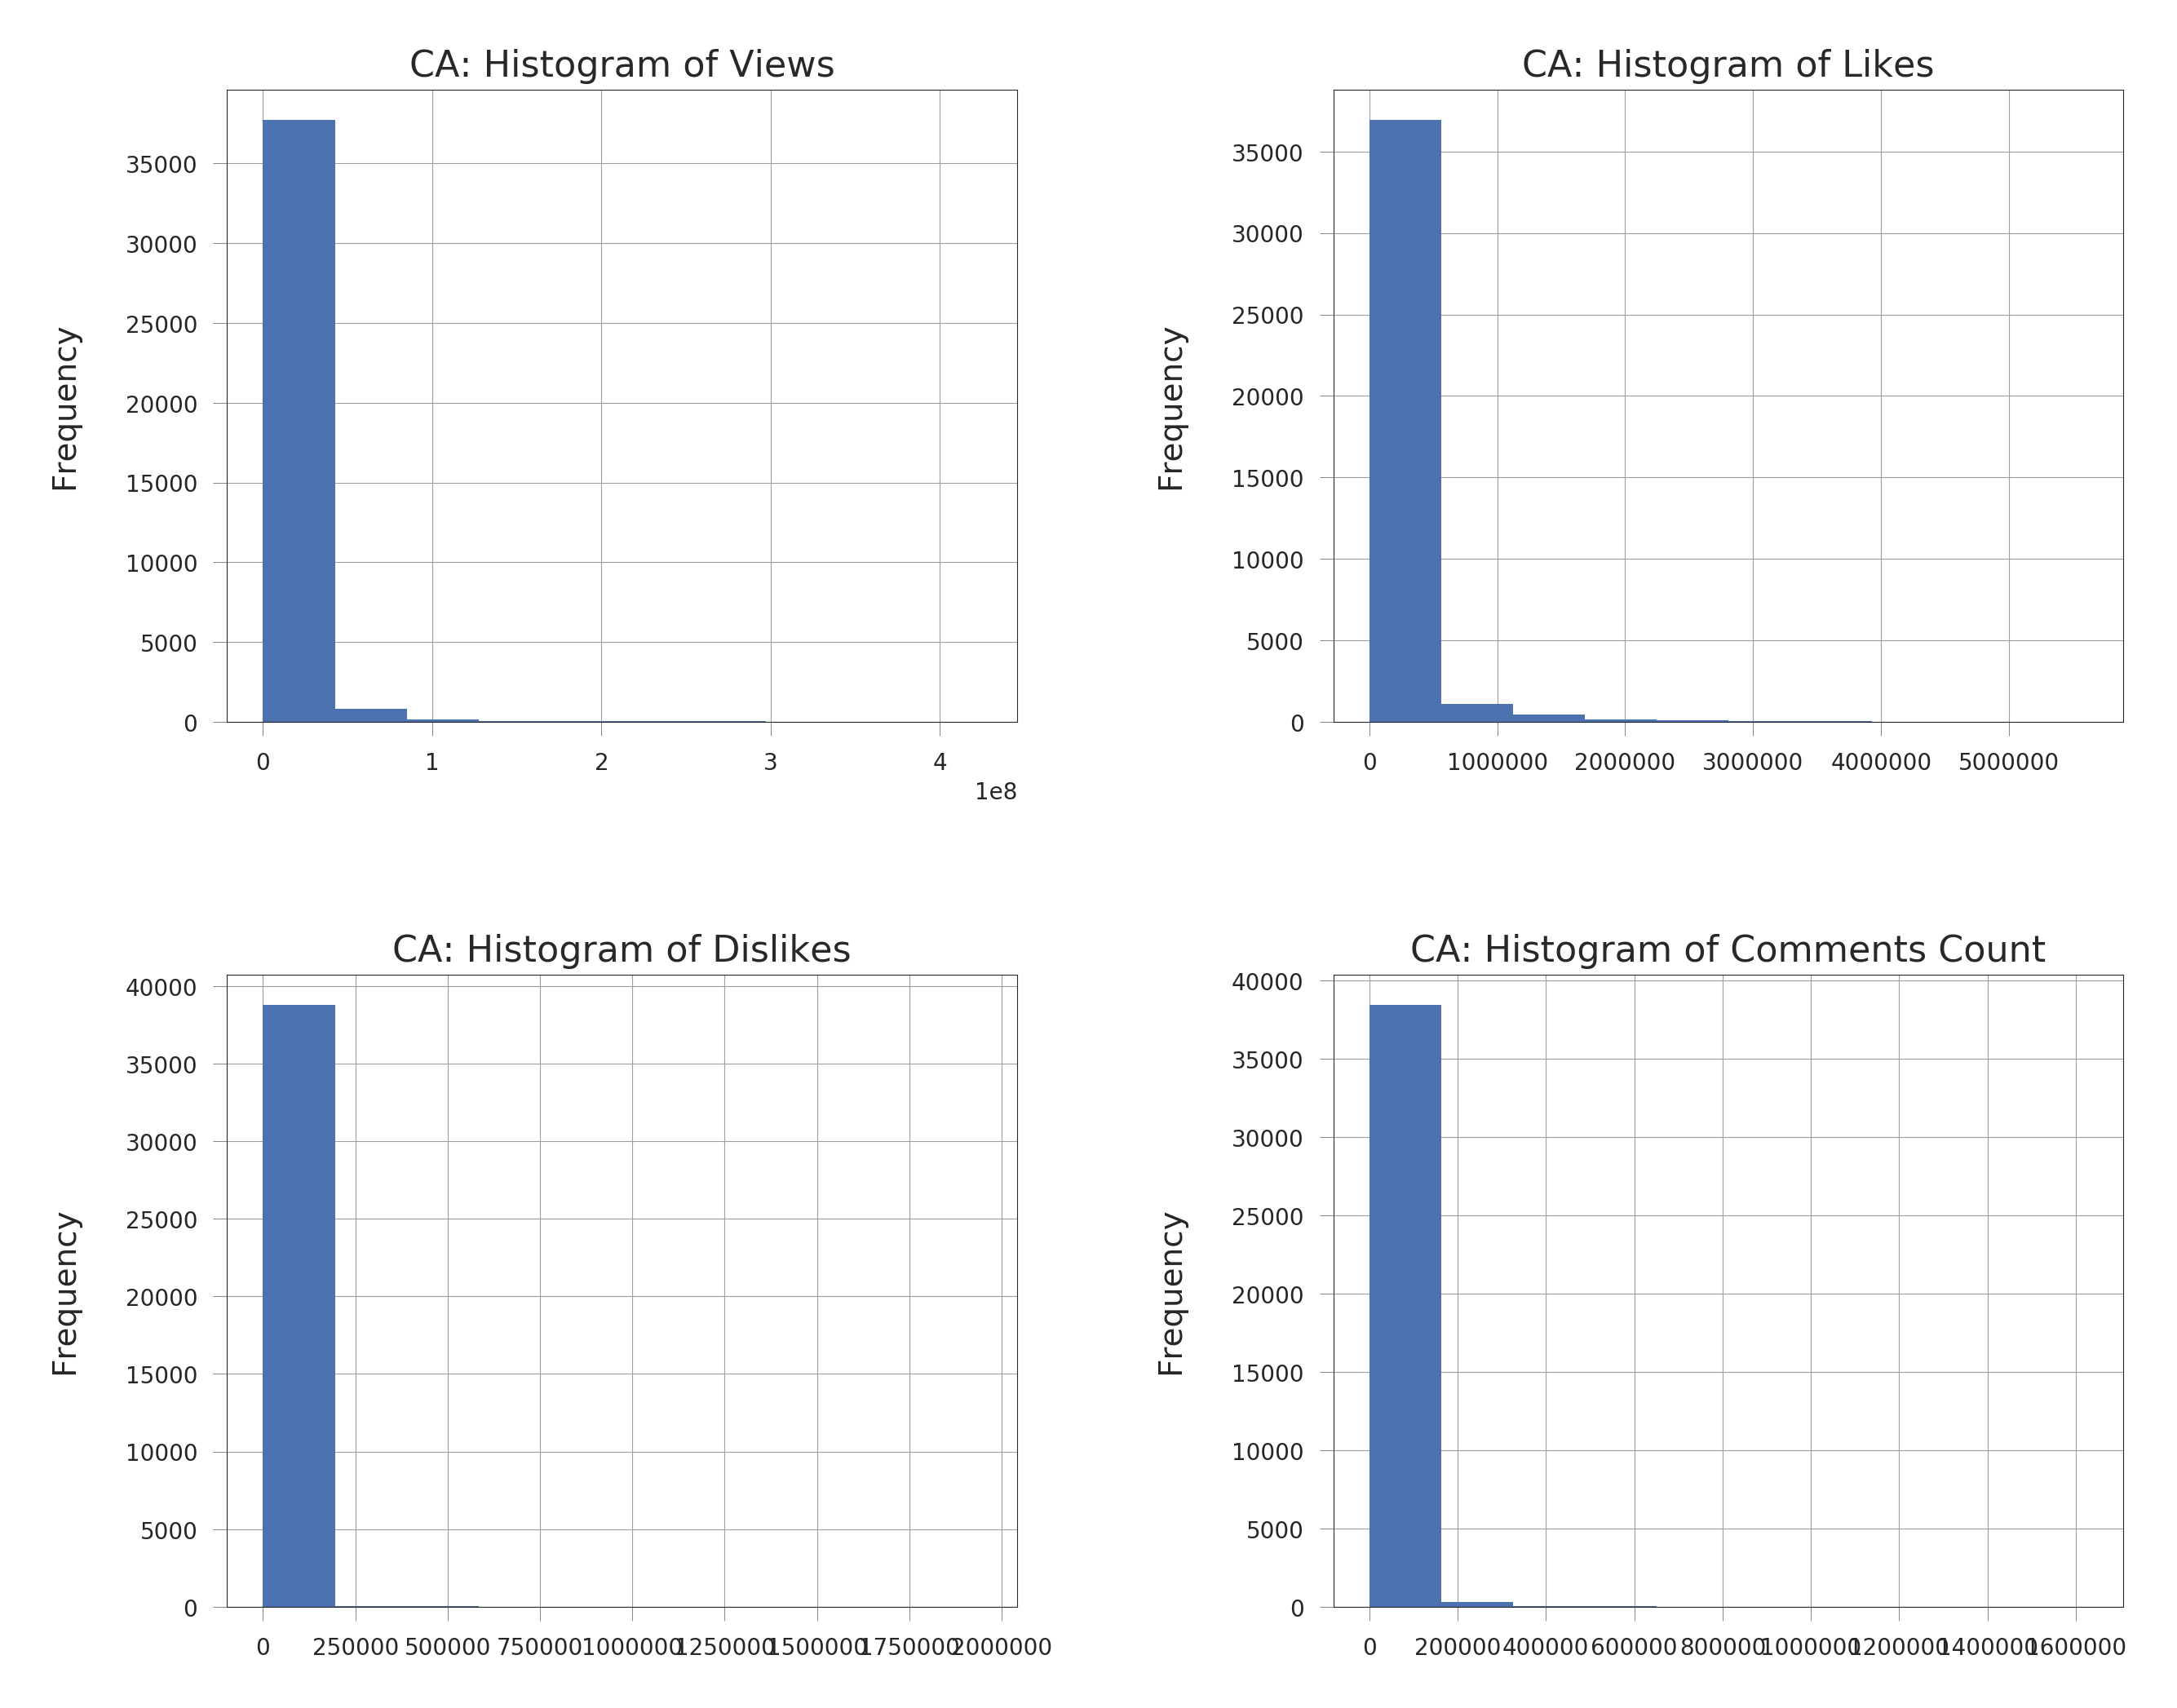

In [25]:
plt.figure(figsize = (15,12))

plt.subplot(221)
h1=df['views'].plot.hist()
h1.set_title("CA: Histogram of Views", fontsize=16)

plt.subplot(222)
h2=df['likes'].plot.hist()
h2.set_title("CA: Histogram of Likes", fontsize=16)

plt.subplot(223)
h3=df['dislikes'].plot.hist()
h3.set_title("CA: Histogram of Dislikes", fontsize=16)

plt.subplot(224)
h4=df['comment_count'].plot.hist()
h4.set_title("CA: Histogram of Comments Count", fontsize=16)


plt.subplots_adjust(wspace = 0.4, hspace = 0.4,top = 0.9)
plt.show();

In [26]:
keep_columns = ['views', 'likes', 'dislikes', 'comment_count'] 
corr_matrix = df[keep_columns].corr()
corr_matrix

views  likes  dislikes  comment_count
views           1.00   0.80      0.39           0.47
likes           0.80   1.00      0.45           0.74
dislikes        0.39   0.45      1.00           0.77
comment_count   0.47   0.74      0.77           1.00

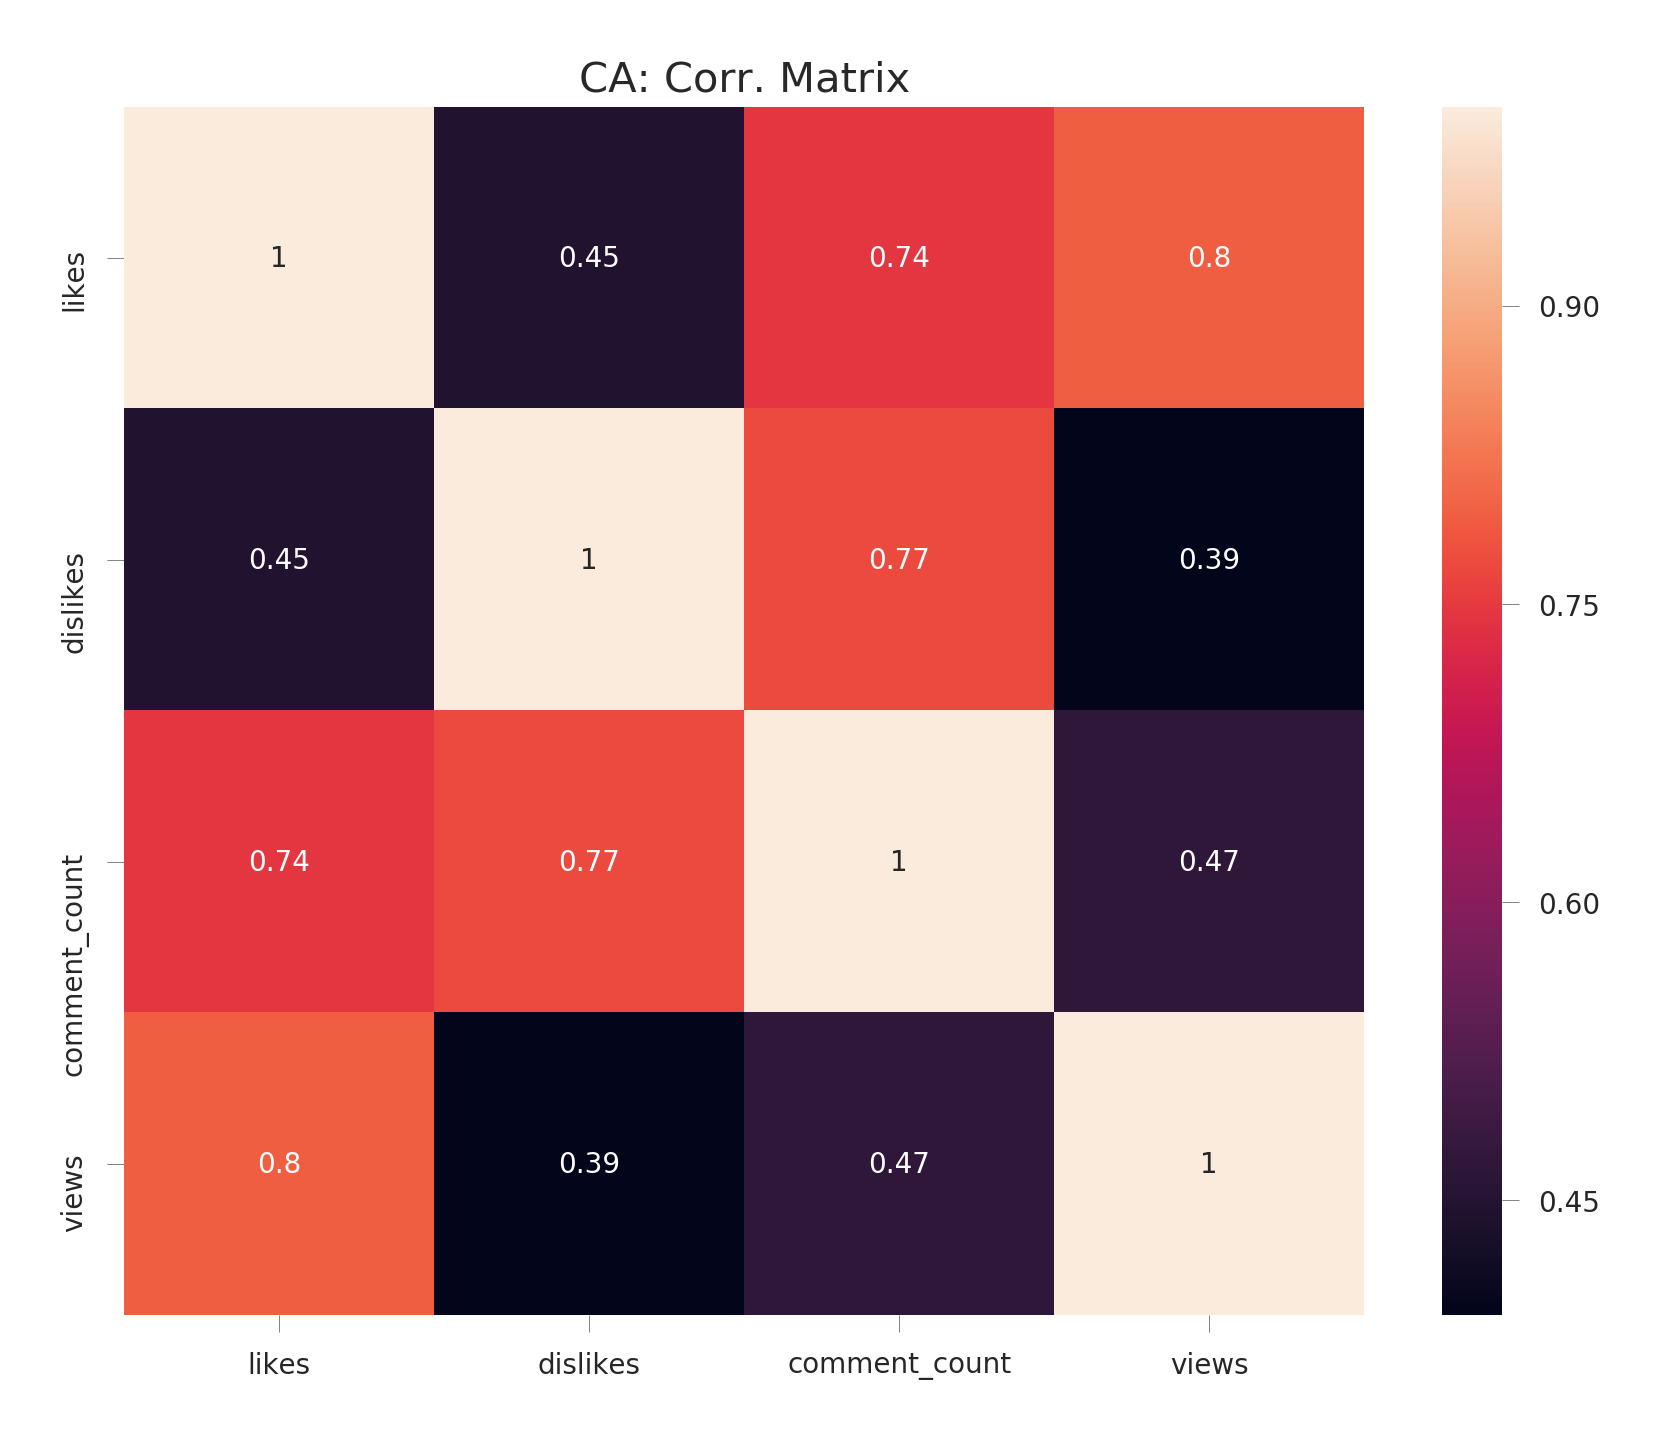

In [27]:
plt.figure(figsize = (10,8))
g = sns.heatmap(df[['likes', 'dislikes', 'comment_count', 'views']].corr(), annot=True)
g.set_title("CA: Corr. Matrix", fontsize=15)
plt.show();

In [28]:
df['title'].value_counts()

Maroon 5 - Wait                                                                                   40
Justin Timberlake’s FULL Pepsi Super Bowl LII Halftime Show! | NFL Highlights                     38
Anne-Marie - 2002 [Official Video]                                                                38
Jurassic World: Fallen Kingdom - Official Trailer #2 [HD]                                         38
To Our Daughter                                                                                   38
Royce da 5'9 - Caterpillar ft. Eminem, King Green                                                 37
BHAD BHABIE feat. Lil Yachty - Gucci Flip Flops (Official Music Video) | Danielle Bregoli         37
Enrique Iglesias - MOVE TO MIAMI (Official Video) ft. Pitbull                                     37
VENOM - Official Teaser Trailer (HD)                                                              37
Florence + The Machine - Hunger                                                            

In [29]:
df['video_error_or_removed'].value_counts()

False    38847
True        69
Name: video_error_or_removed, dtype: int64

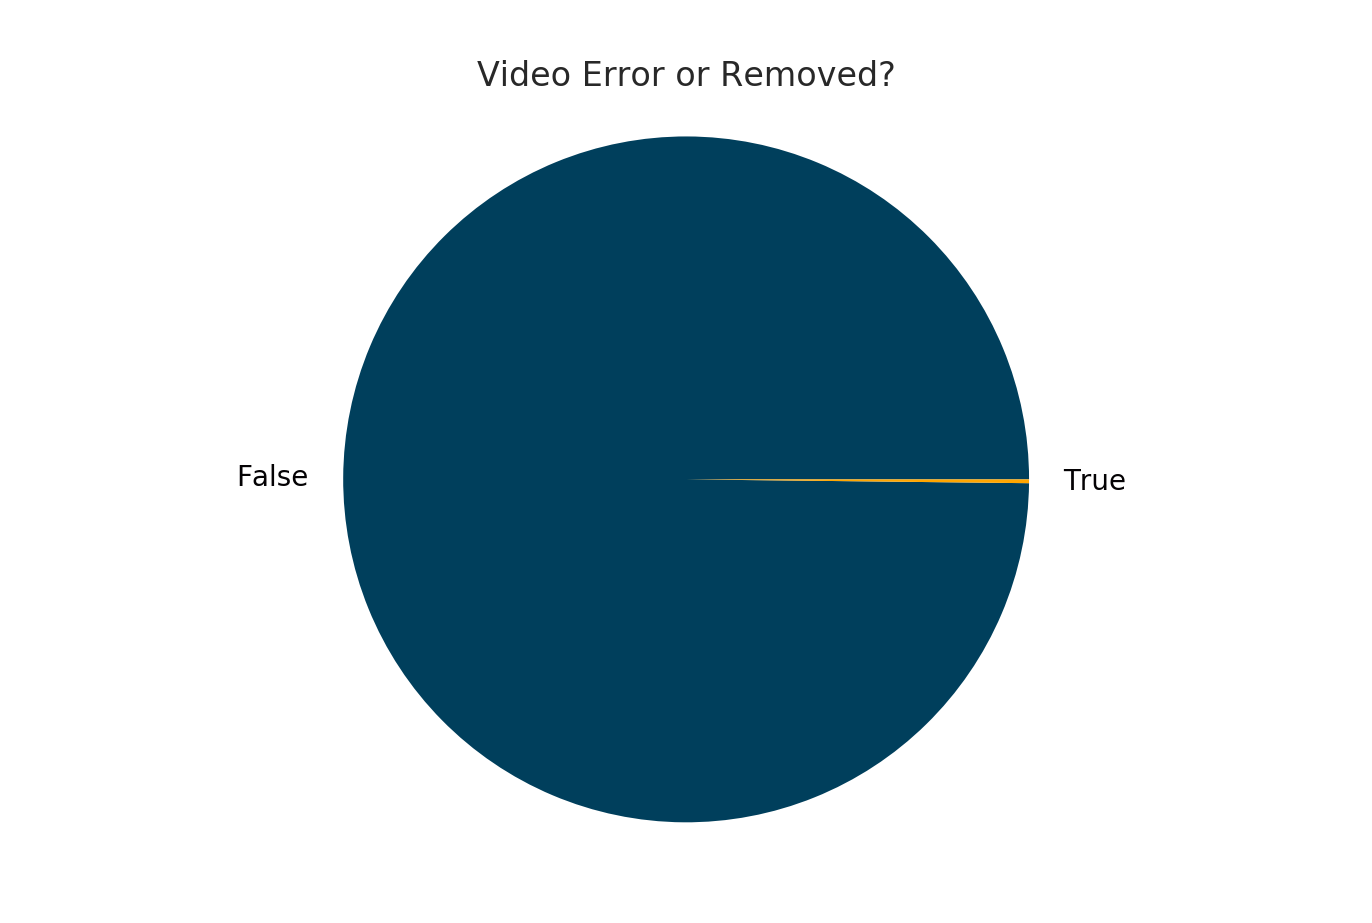

In [30]:
value_counts = df["video_error_or_removed"].value_counts().to_dict()
fig, ax = plt.subplots()
ax.pie([value_counts[False], value_counts[True]], labels=['False', 'True'], 
        colors=['#003f5c', '#ffa600'], textprops={'color': '#040204'})
ax.axis('equal')
ax.set_title('Video Error or Removed?');

In [31]:
df['comments_disabled'].value_counts()

False    38233
True       683
Name: comments_disabled, dtype: int64

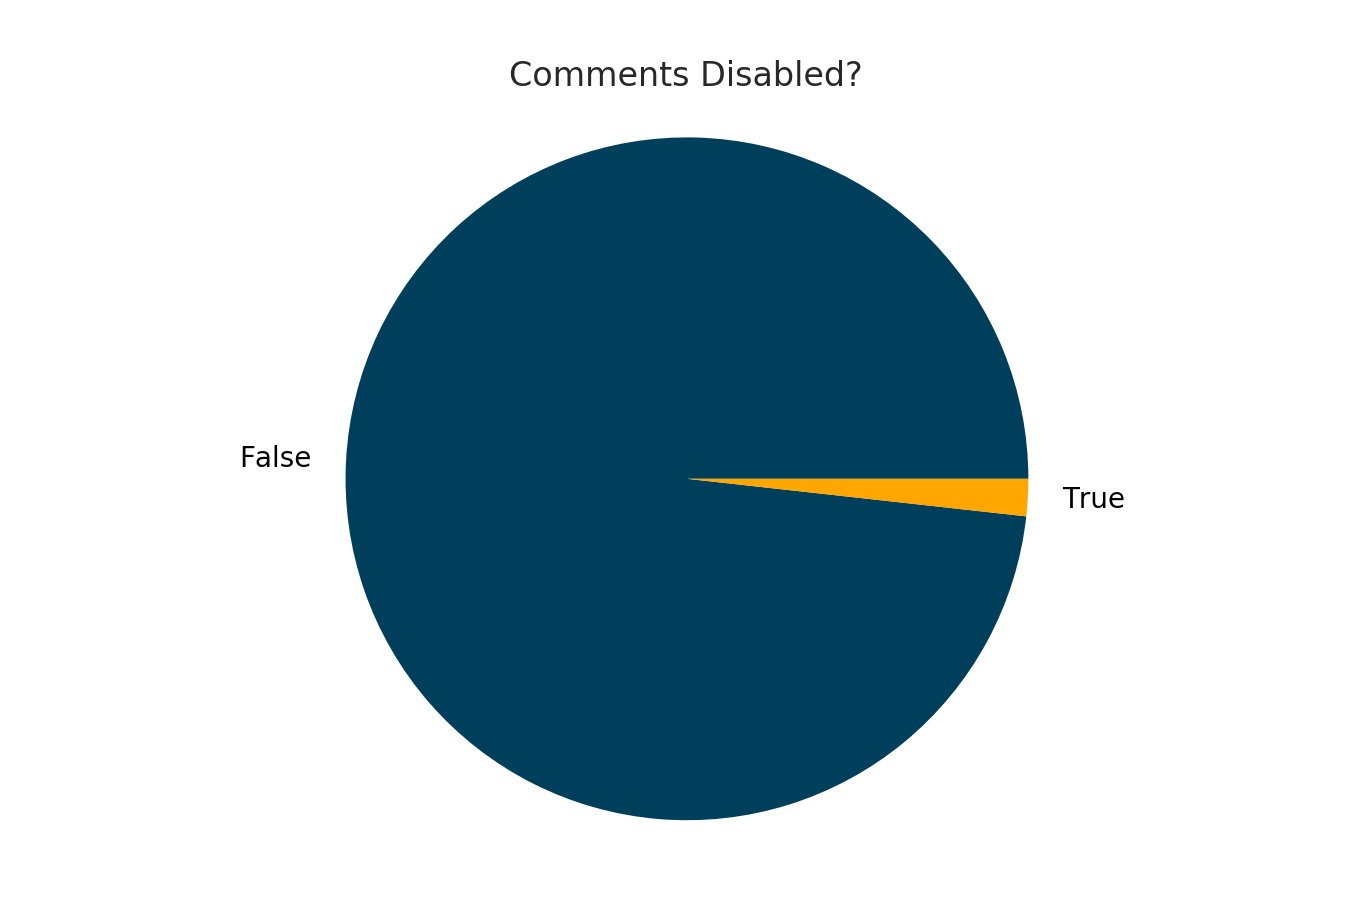

In [32]:
value_counts = df["comments_disabled"].value_counts().to_dict()
fig, ax = plt.subplots()
ax.pie(x=[value_counts[False], value_counts[True]], labels=['False', 'True'], colors=['#003f5c', '#ffa600'], textprops={'color': '#040204'})
ax.axis('equal')
ax.set_title('Comments Disabled?');

In [33]:
df['ratings_disabled'].value_counts()

False    38644
True       272
Name: ratings_disabled, dtype: int64

In [34]:
keep_columns = ['views', 'likes', 'dislikes', 'comment_count'] 
corr_matrix = df[keep_columns].corr()
corr_matrix

views  likes  dislikes  comment_count
views           1.00   0.80      0.39           0.47
likes           0.80   1.00      0.45           0.74
dislikes        0.39   0.45      1.00           0.77
comment_count   0.47   0.74      0.77           1.00

In [35]:
df['title'].value_counts()

Maroon 5 - Wait                                                                                   40
Justin Timberlake’s FULL Pepsi Super Bowl LII Halftime Show! | NFL Highlights                     38
Anne-Marie - 2002 [Official Video]                                                                38
Jurassic World: Fallen Kingdom - Official Trailer #2 [HD]                                         38
To Our Daughter                                                                                   38
Royce da 5'9 - Caterpillar ft. Eminem, King Green                                                 37
BHAD BHABIE feat. Lil Yachty - Gucci Flip Flops (Official Music Video) | Danielle Bregoli         37
Enrique Iglesias - MOVE TO MIAMI (Official Video) ft. Pitbull                                     37
VENOM - Official Teaser Trailer (HD)                                                              37
Florence + The Machine - Hunger                                                            

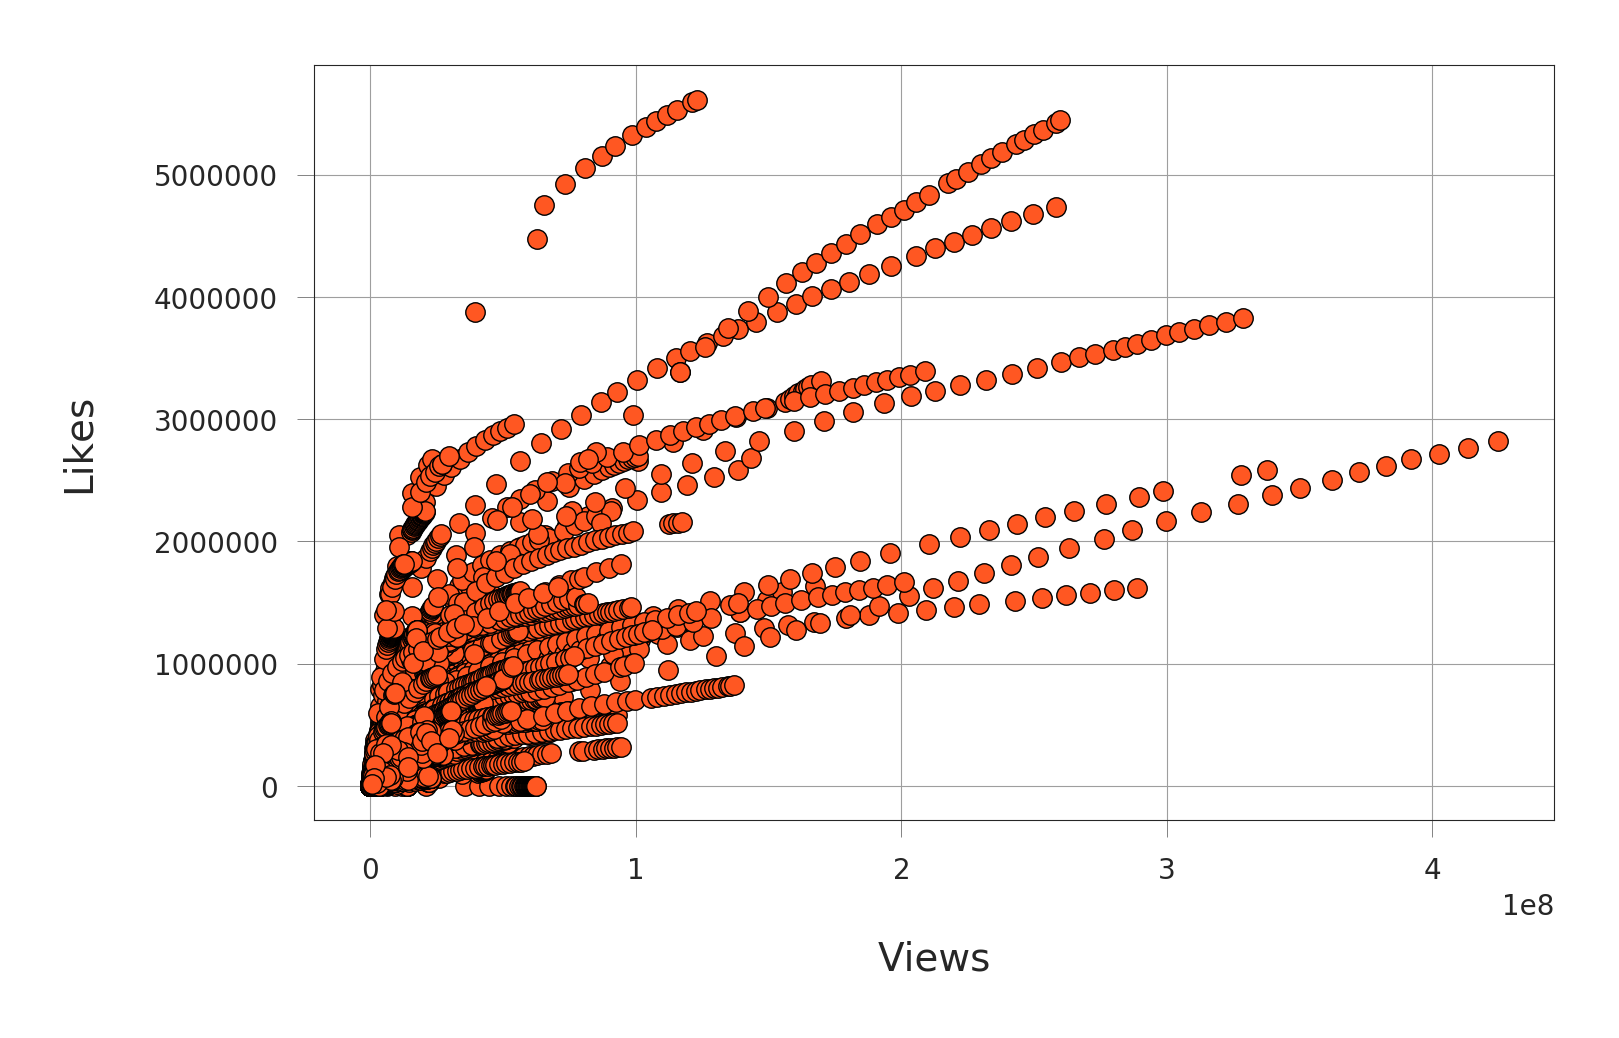

In [36]:
fig, ax = plt.subplots()
plt.scatter(x=df['views'], y=df['likes'], color=PLOT_COLORS[2], edgecolors="#000000", linewidths=0.5)
ax.set(xlabel="Views", ylabel="Likes");

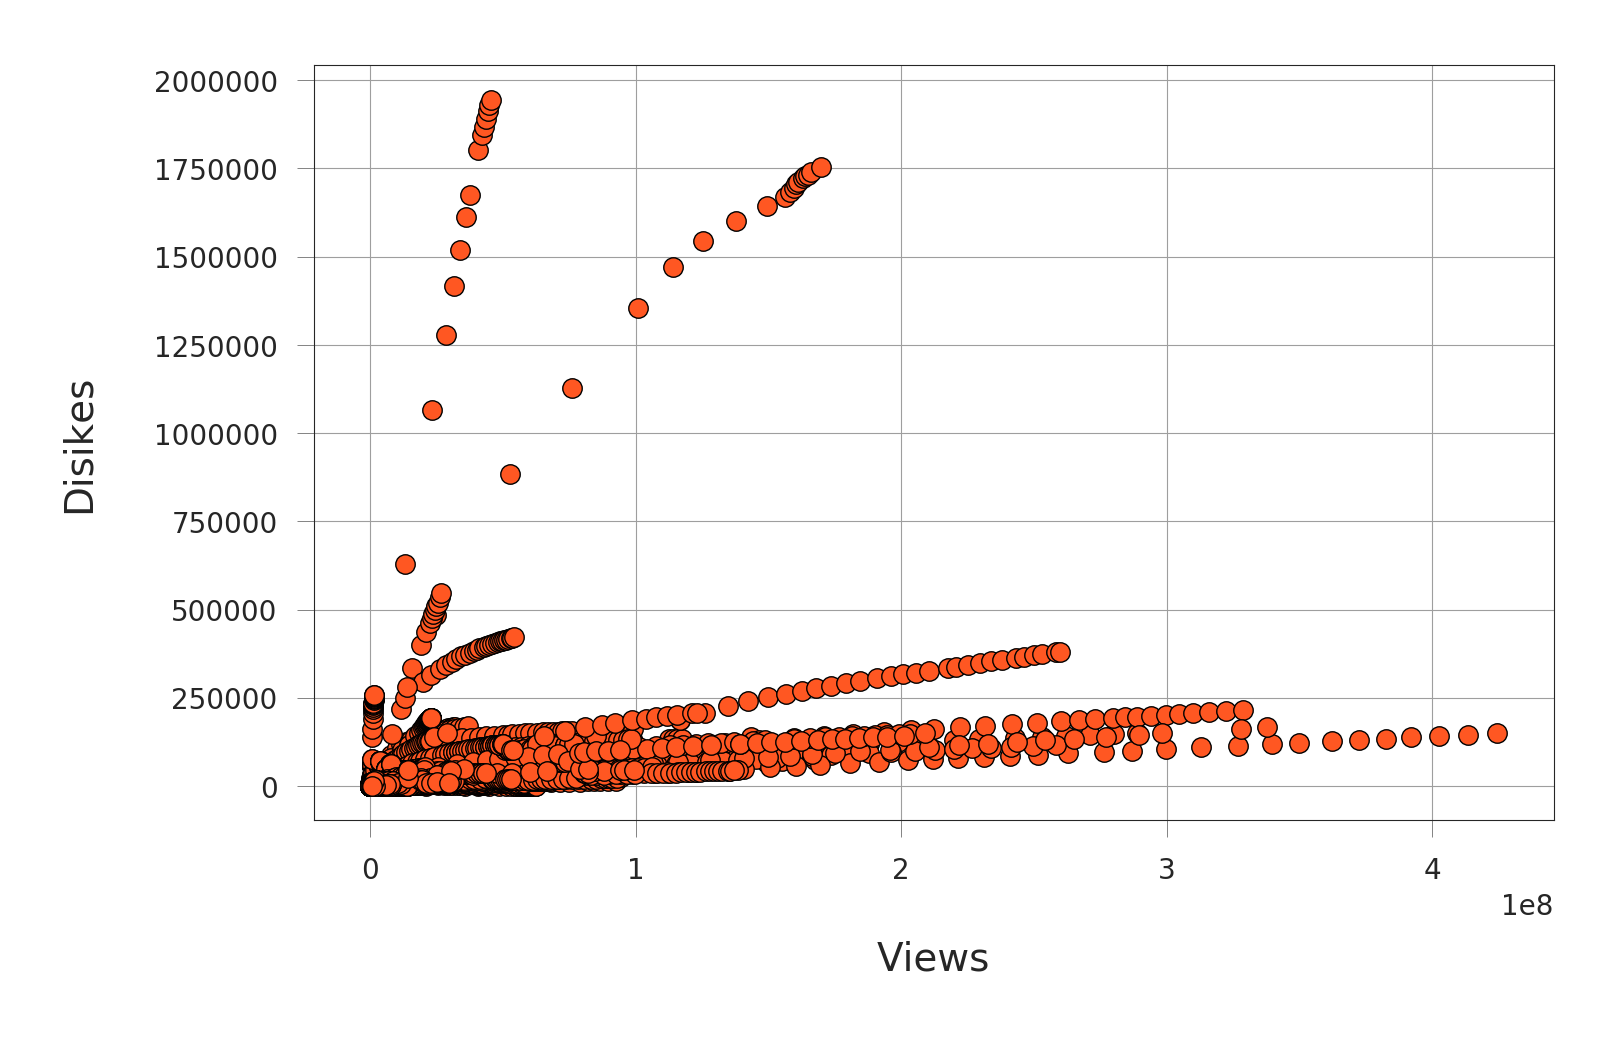

In [37]:
fig, ax = plt.subplots()
plt.scatter(x=df['views'], y=df['dislikes'], color=PLOT_COLORS[2], edgecolors="#000000", linewidths=0.5)
ax.set(xlabel="Views", ylabel="Disikes");

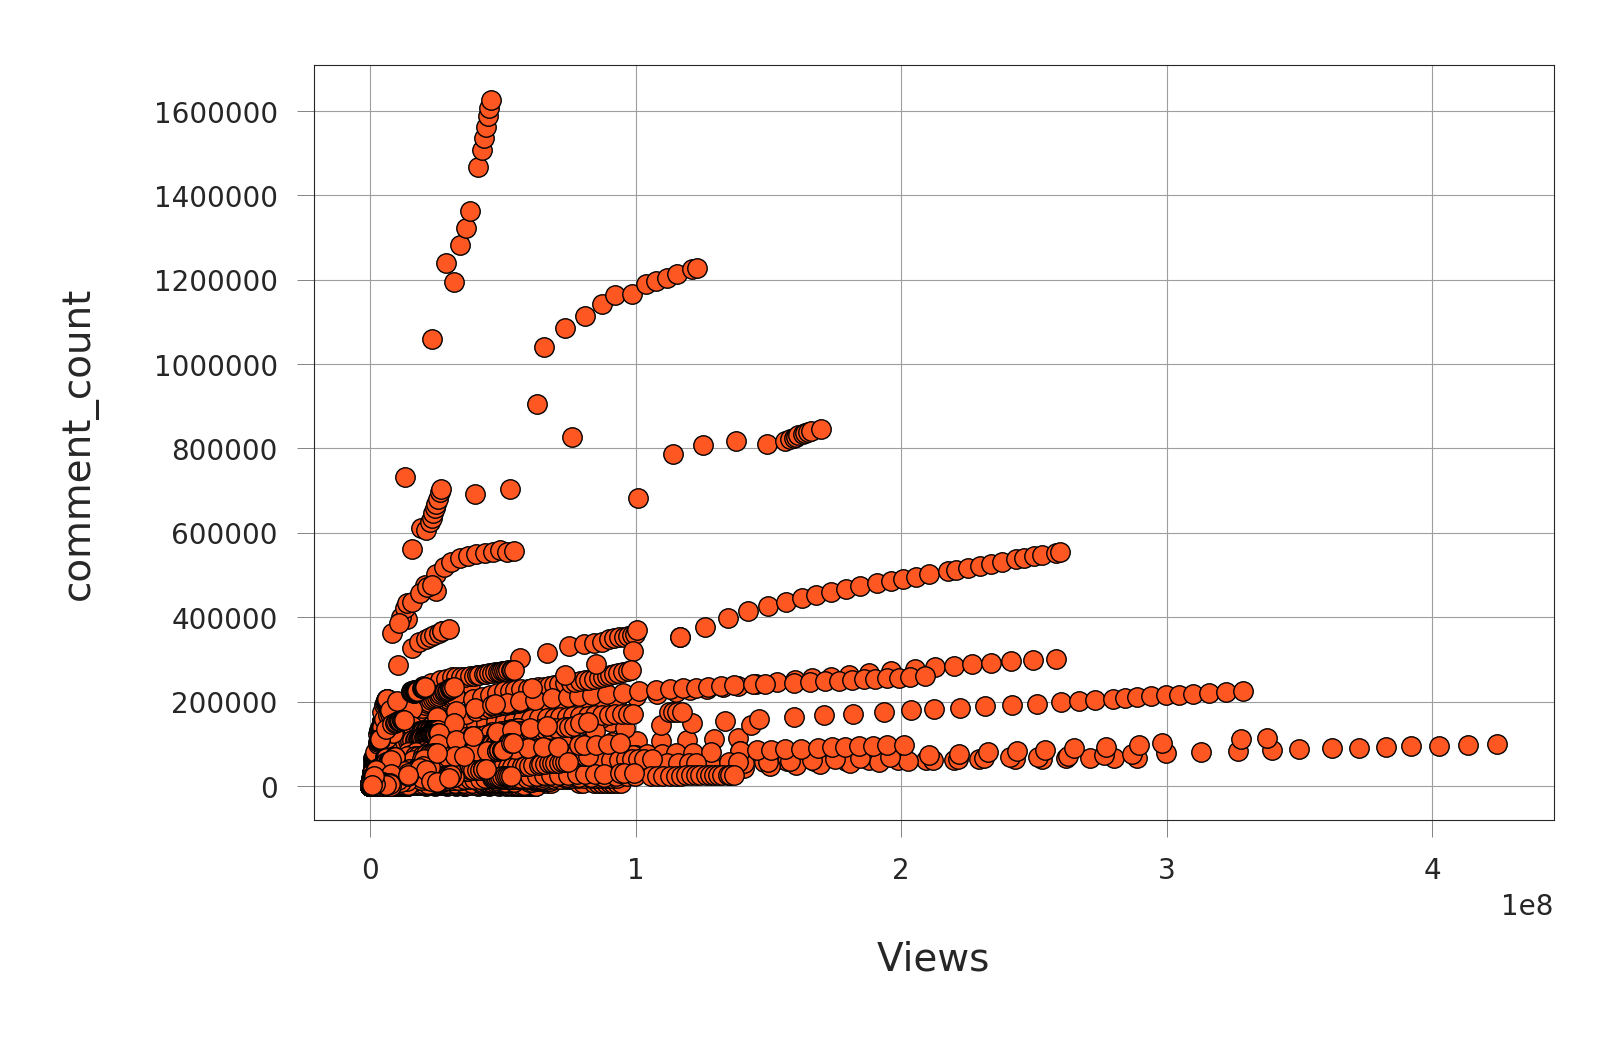

In [38]:
fig, ax = plt.subplots()
plt.scatter(x=df['views'], y=df['comment_count'], color=PLOT_COLORS[2], edgecolors="#000000", linewidths=0.5)
ax.set(xlabel="Views", ylabel="comment_count");

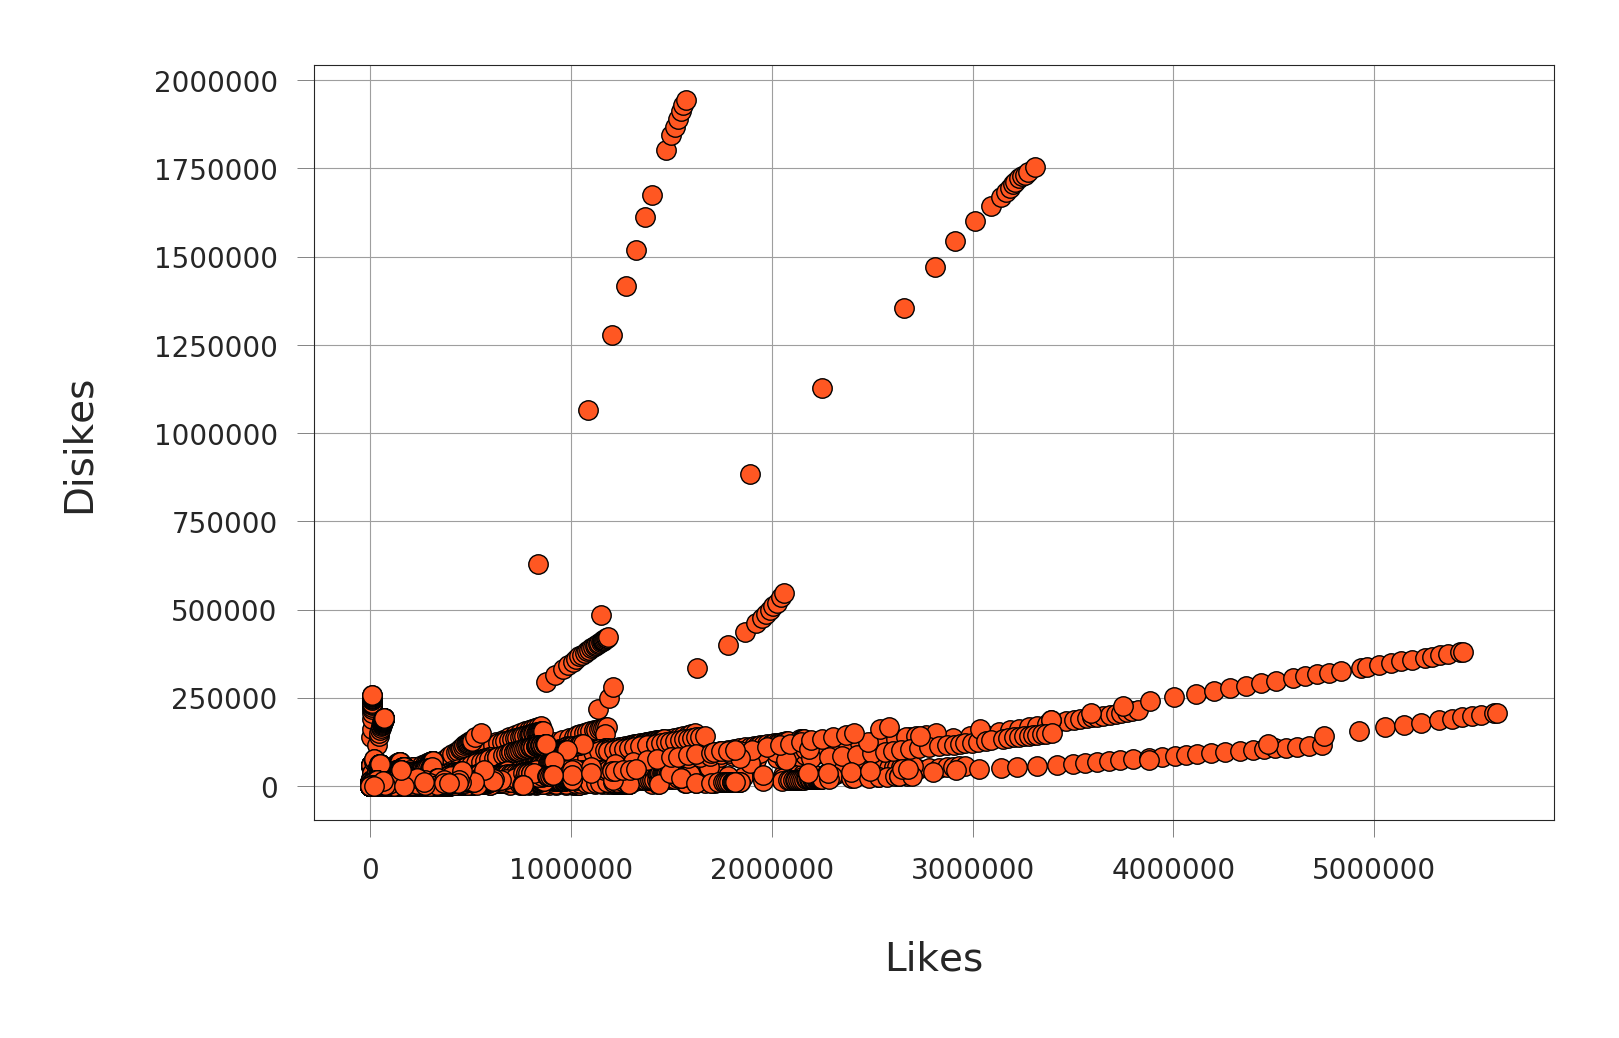

In [39]:
fig, ax = plt.subplots()
plt.scatter(x=df['likes'], y=df['dislikes'], color=PLOT_COLORS[2], edgecolors="#000000", linewidths=0.5)
ax.set(xlabel="Likes", ylabel="Disikes");

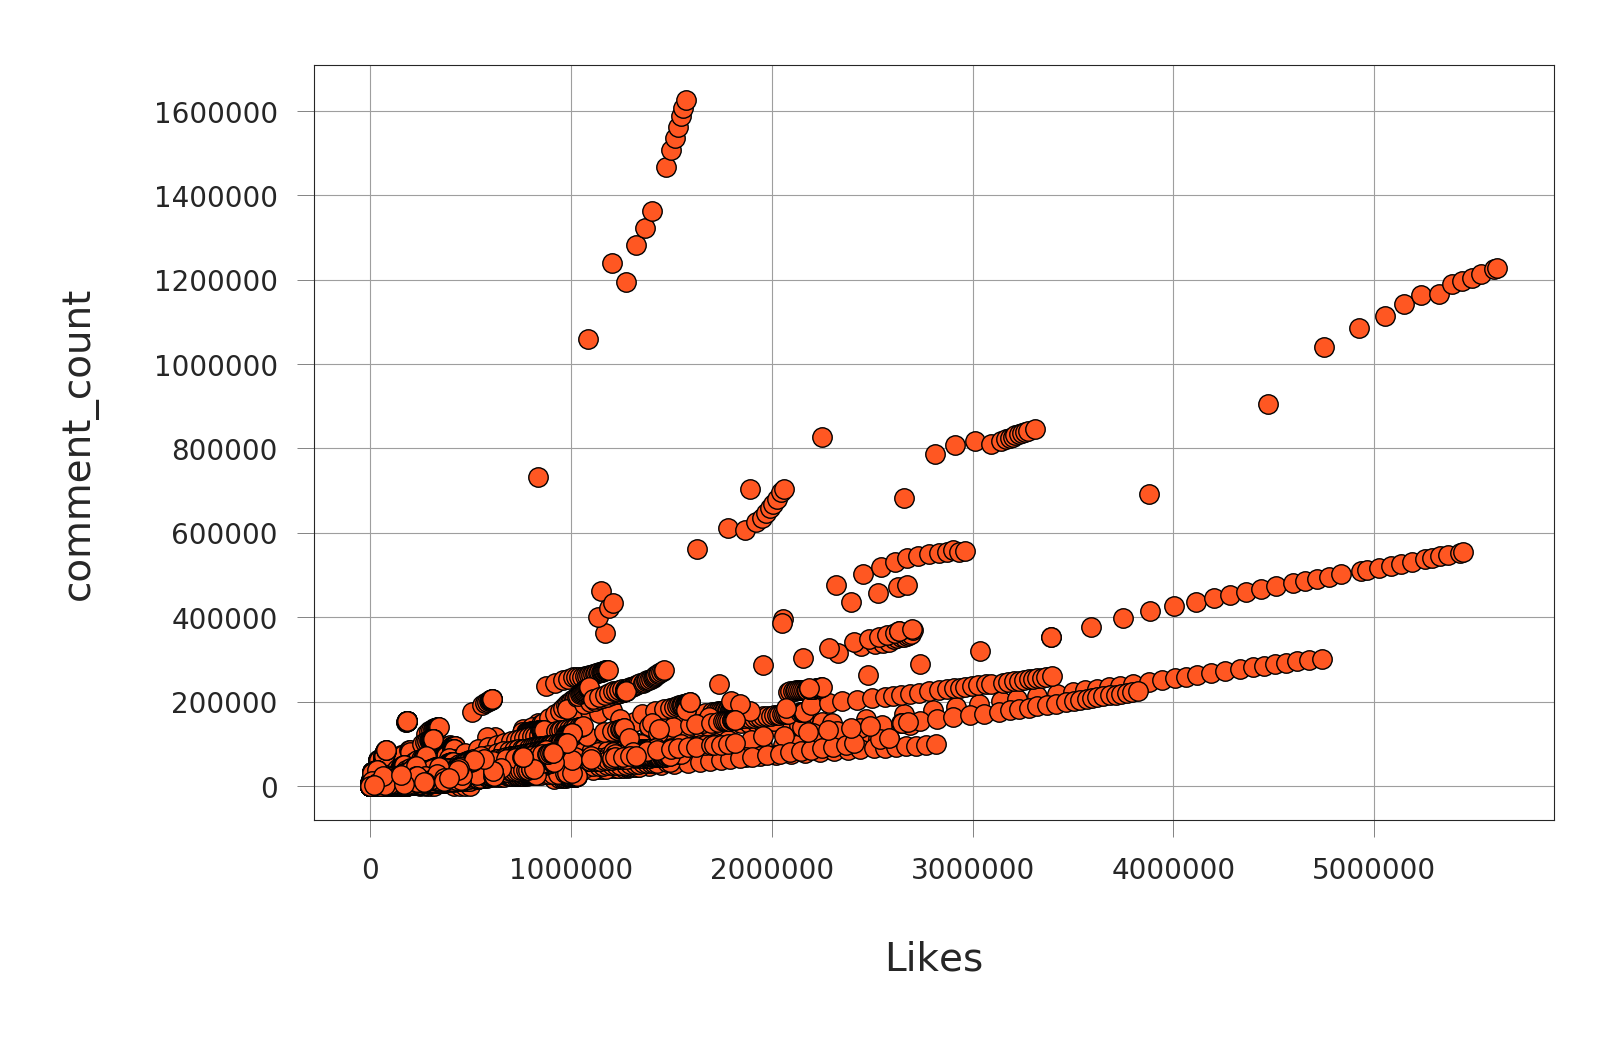

In [40]:
fig, ax = plt.subplots()
plt.scatter(x=df['likes'], y=df['comment_count'], color=PLOT_COLORS[2], edgecolors="#000000", linewidths=0.5)
ax.set(xlabel="Likes", ylabel="comment_count");

In [41]:
df['likes_log'] = np.log(df['likes'] + 1)
df['views_log'] = np.log(df['views'] + 1)
df['dislikes_log'] = np.log(df['dislikes'] + 1)
df['comment_log'] = np.log(df['comment_count'] + 1)

df['like_rate'] =  df['likes'] / df['views'] * 100
df['dislike_rate'] =  df['dislikes'] / df['views'] * 100
df['comment_rate'] =  df['comment_count'] / df['views'] * 100

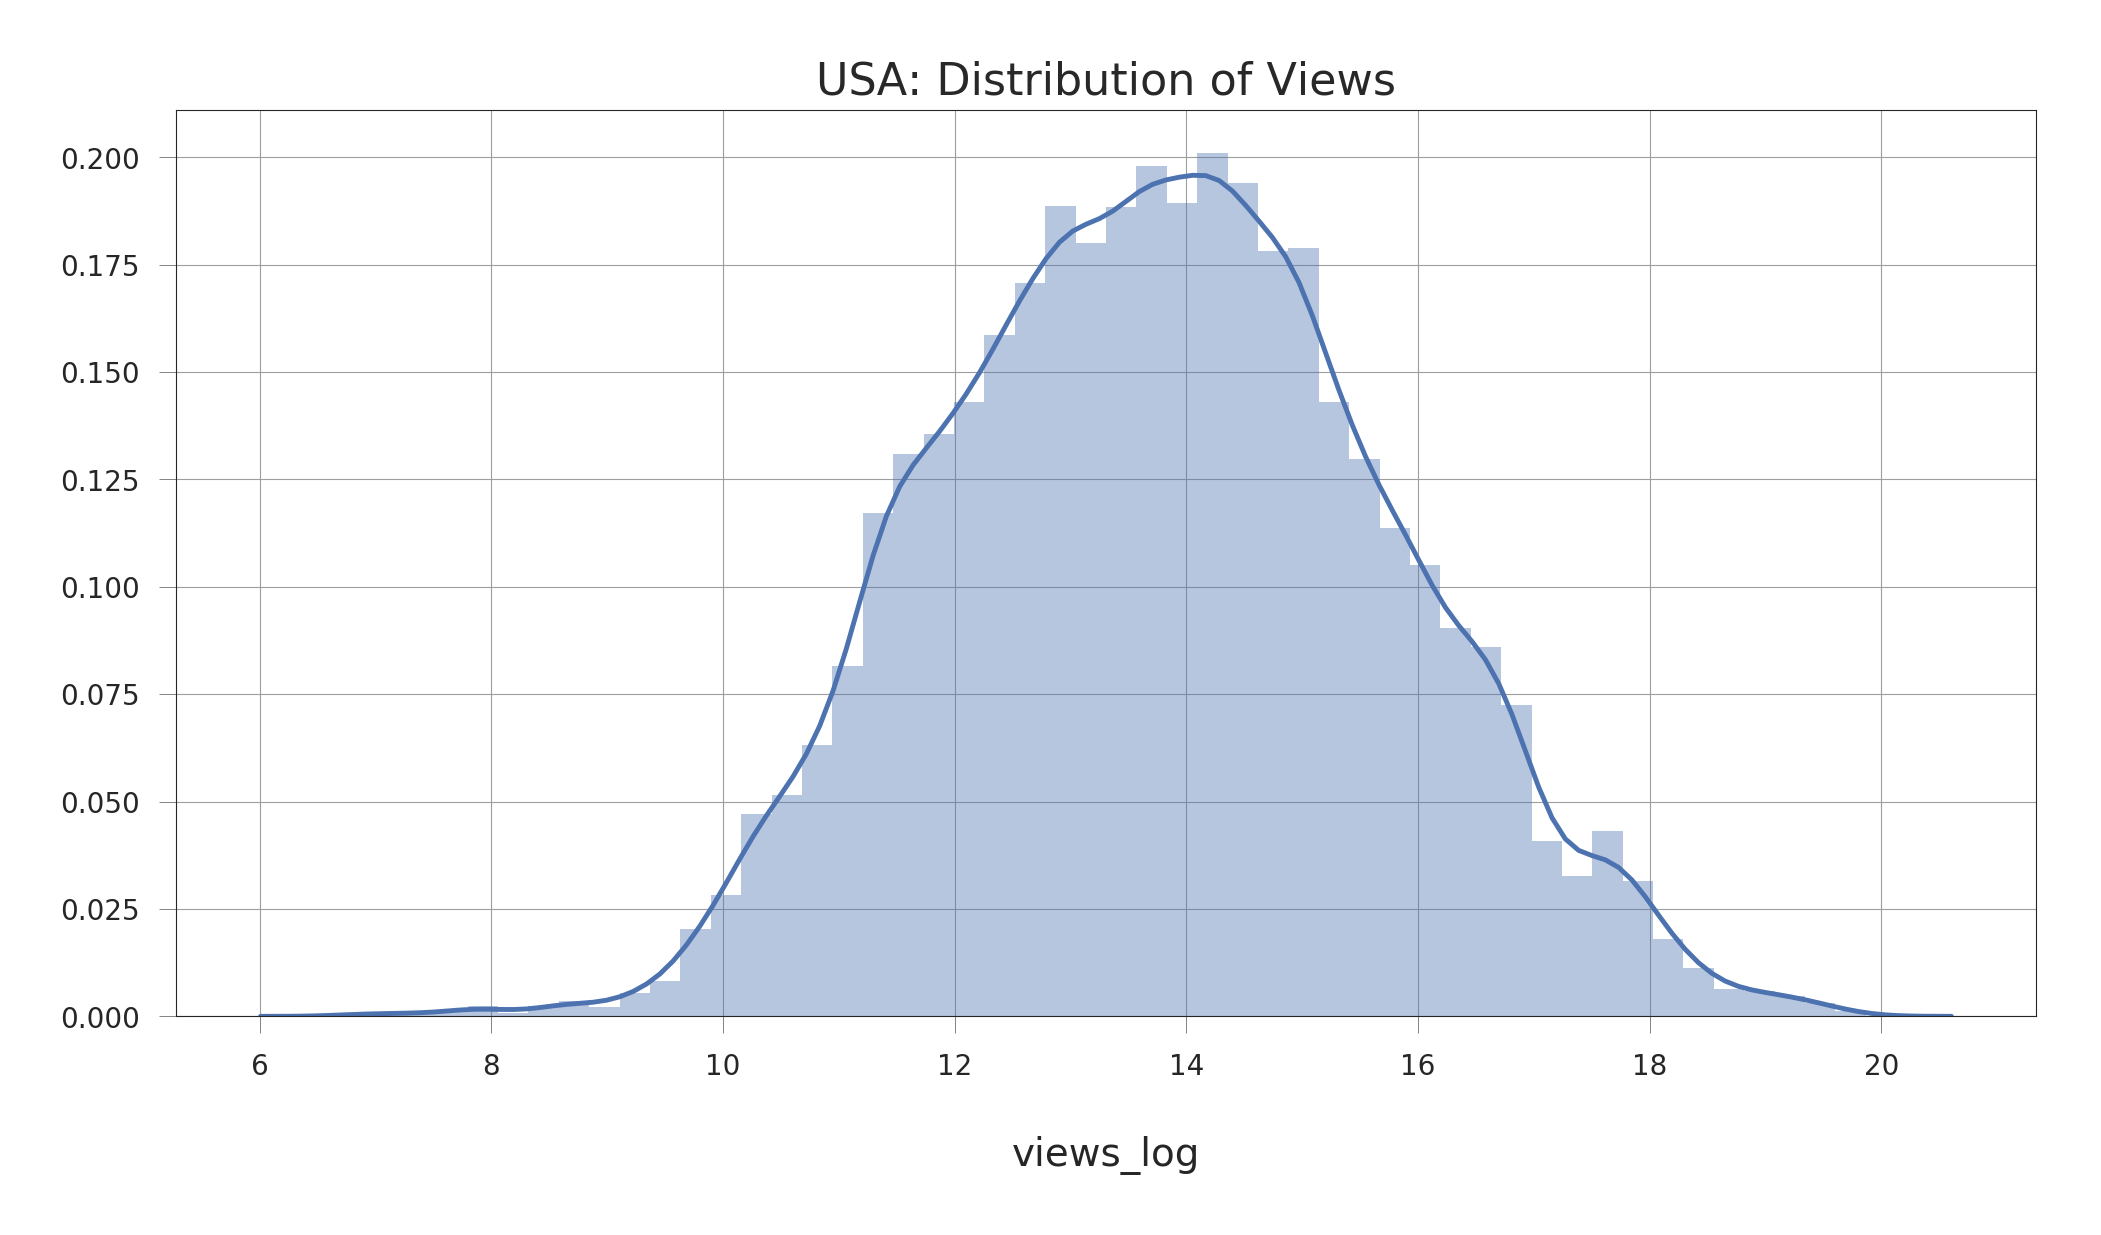

In [42]:
plt.figure(figsize = (12,6))
l1 = sns.distplot(df['views_log'])
l1.set_title("USA: Distribution of Views", fontsize=16);

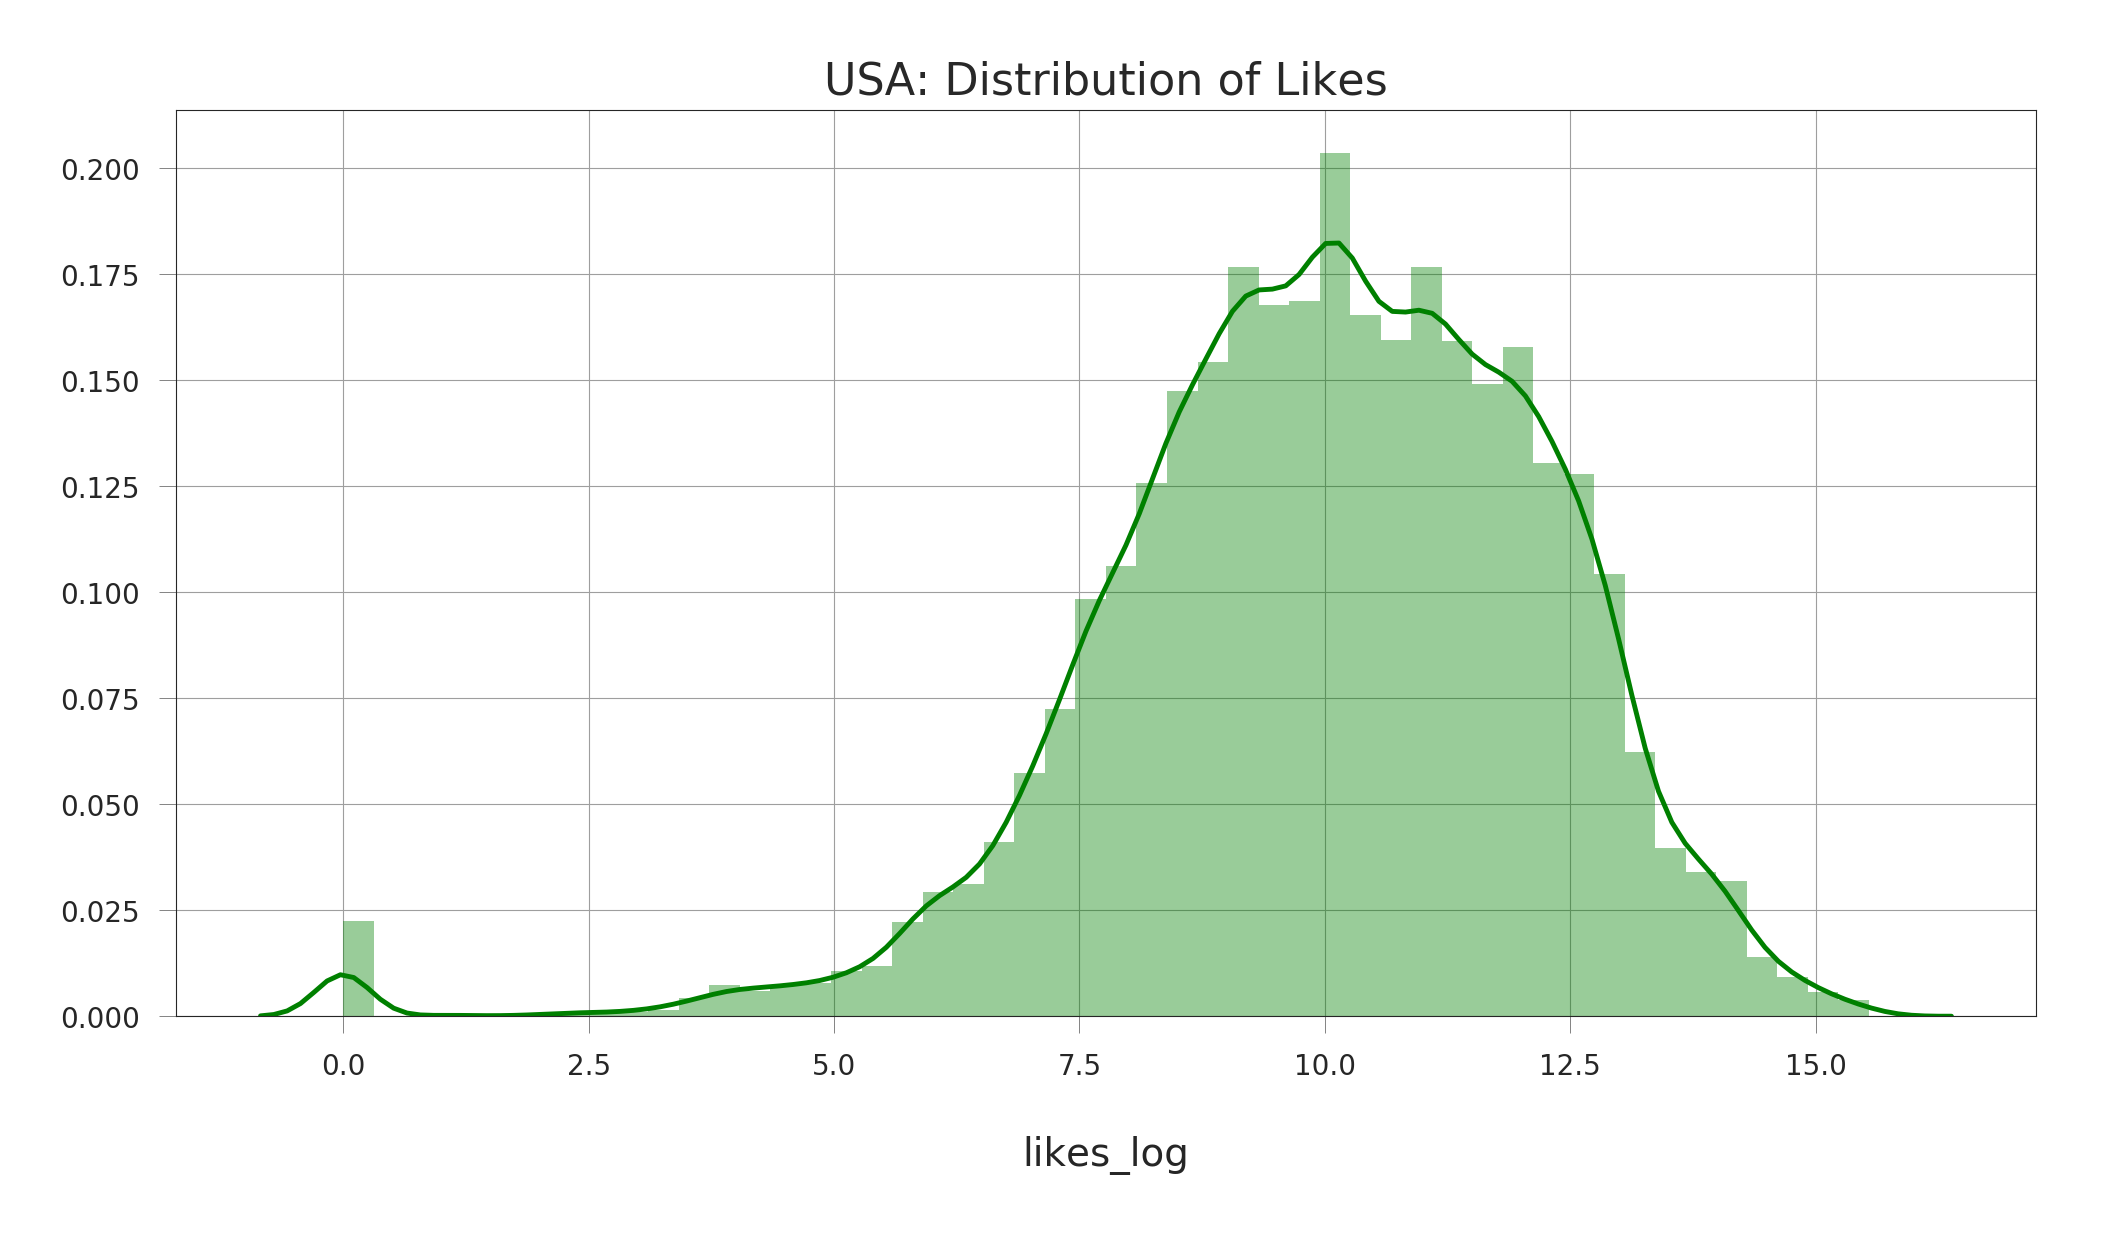

In [43]:
plt.figure(figsize = (12,6))
l2 = sns.distplot(df['likes_log'],color='green')
l2.set_title('USA: Distribution of Likes', fontsize=16);

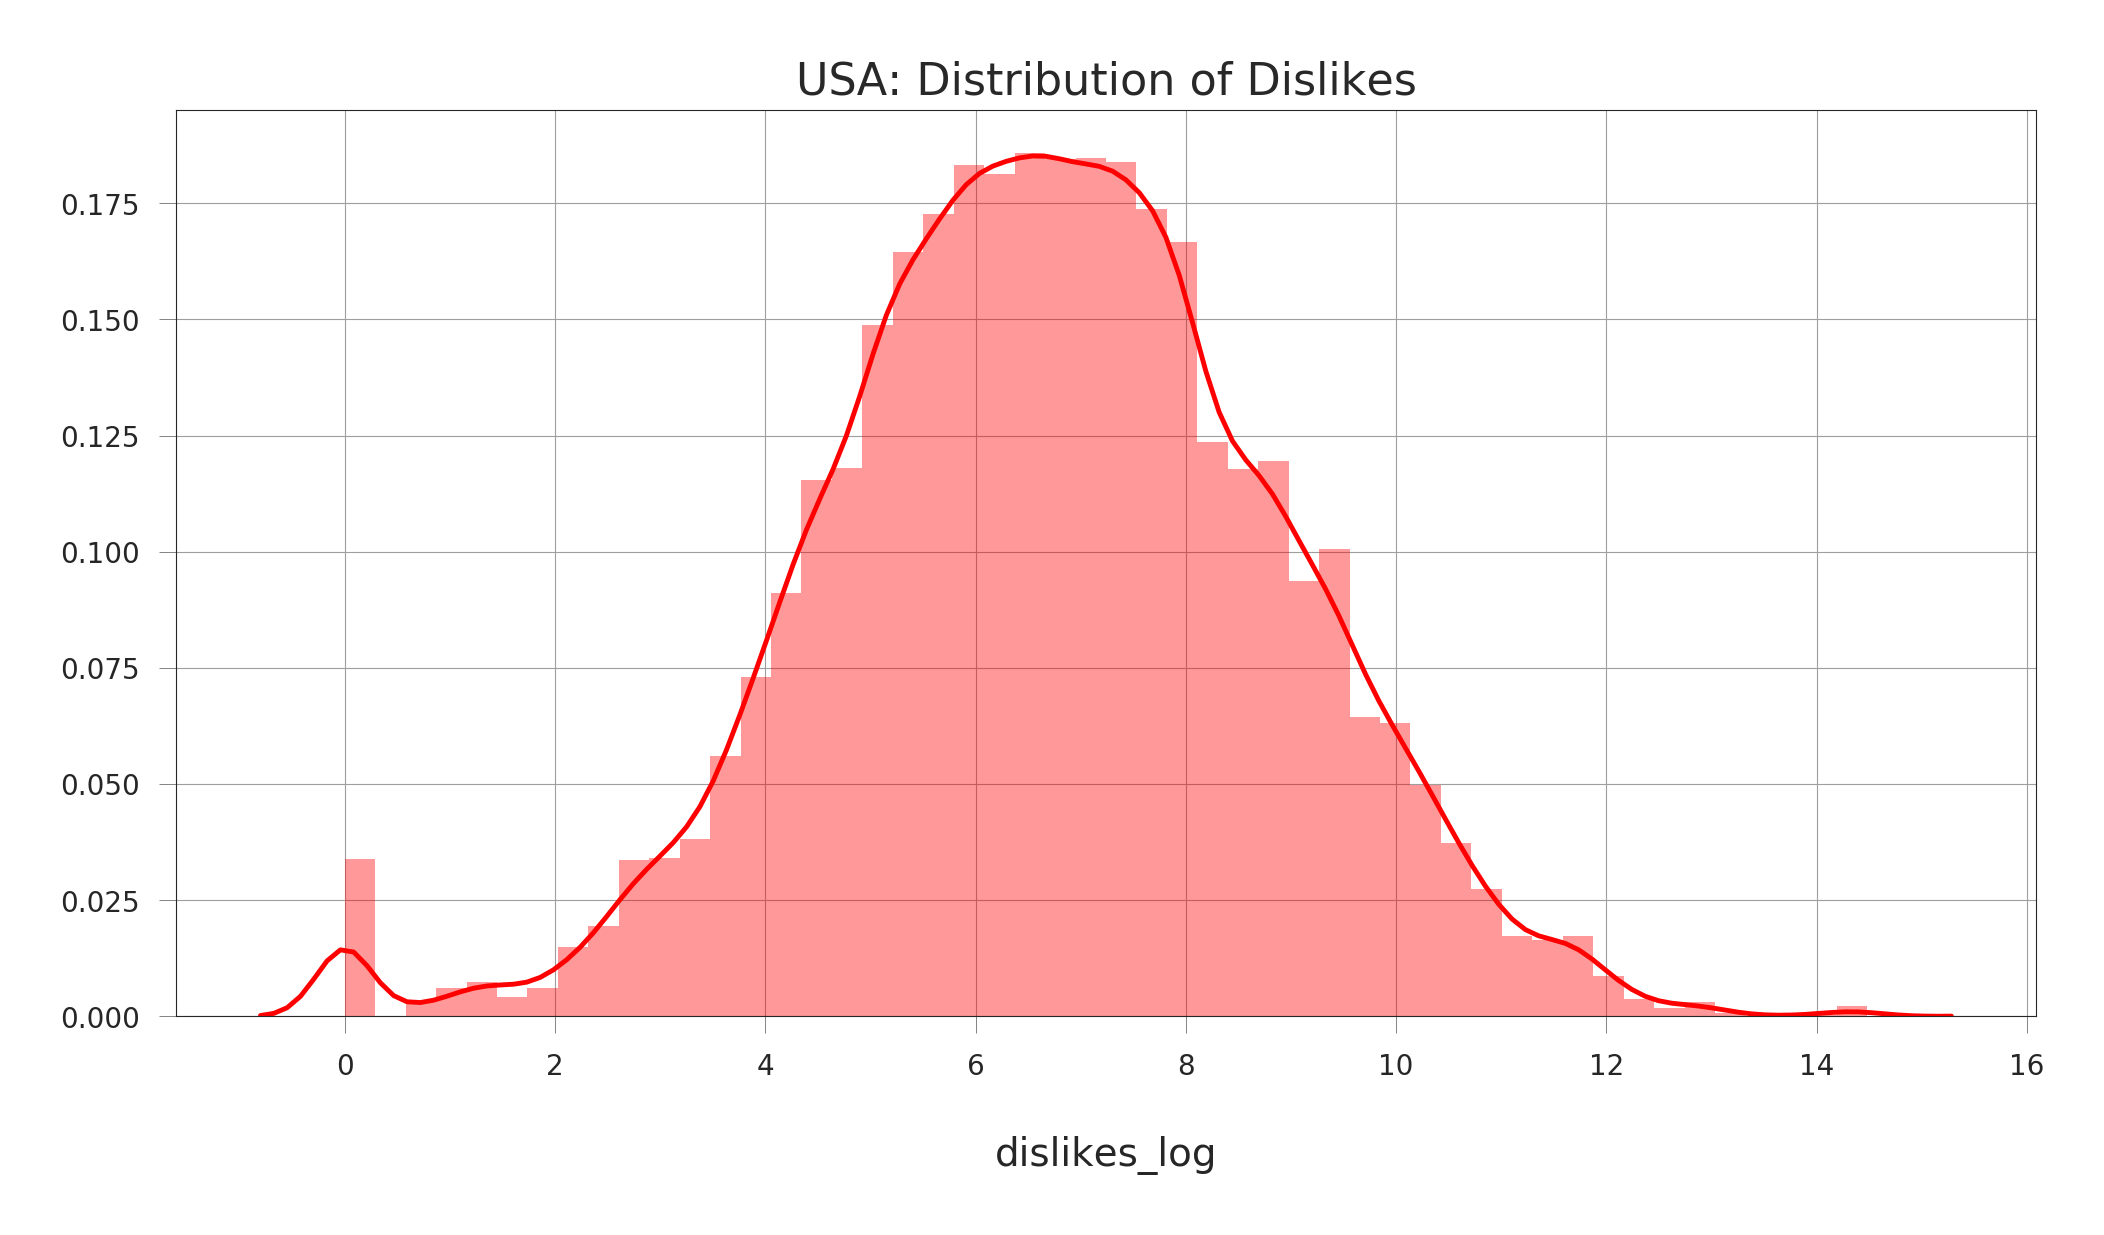

In [44]:
plt.figure(figsize = (12,6))
l3 = sns.distplot(df['dislikes_log'], color='r')
l3.set_title("USA: Distribution of Dislikes", fontsize=16);

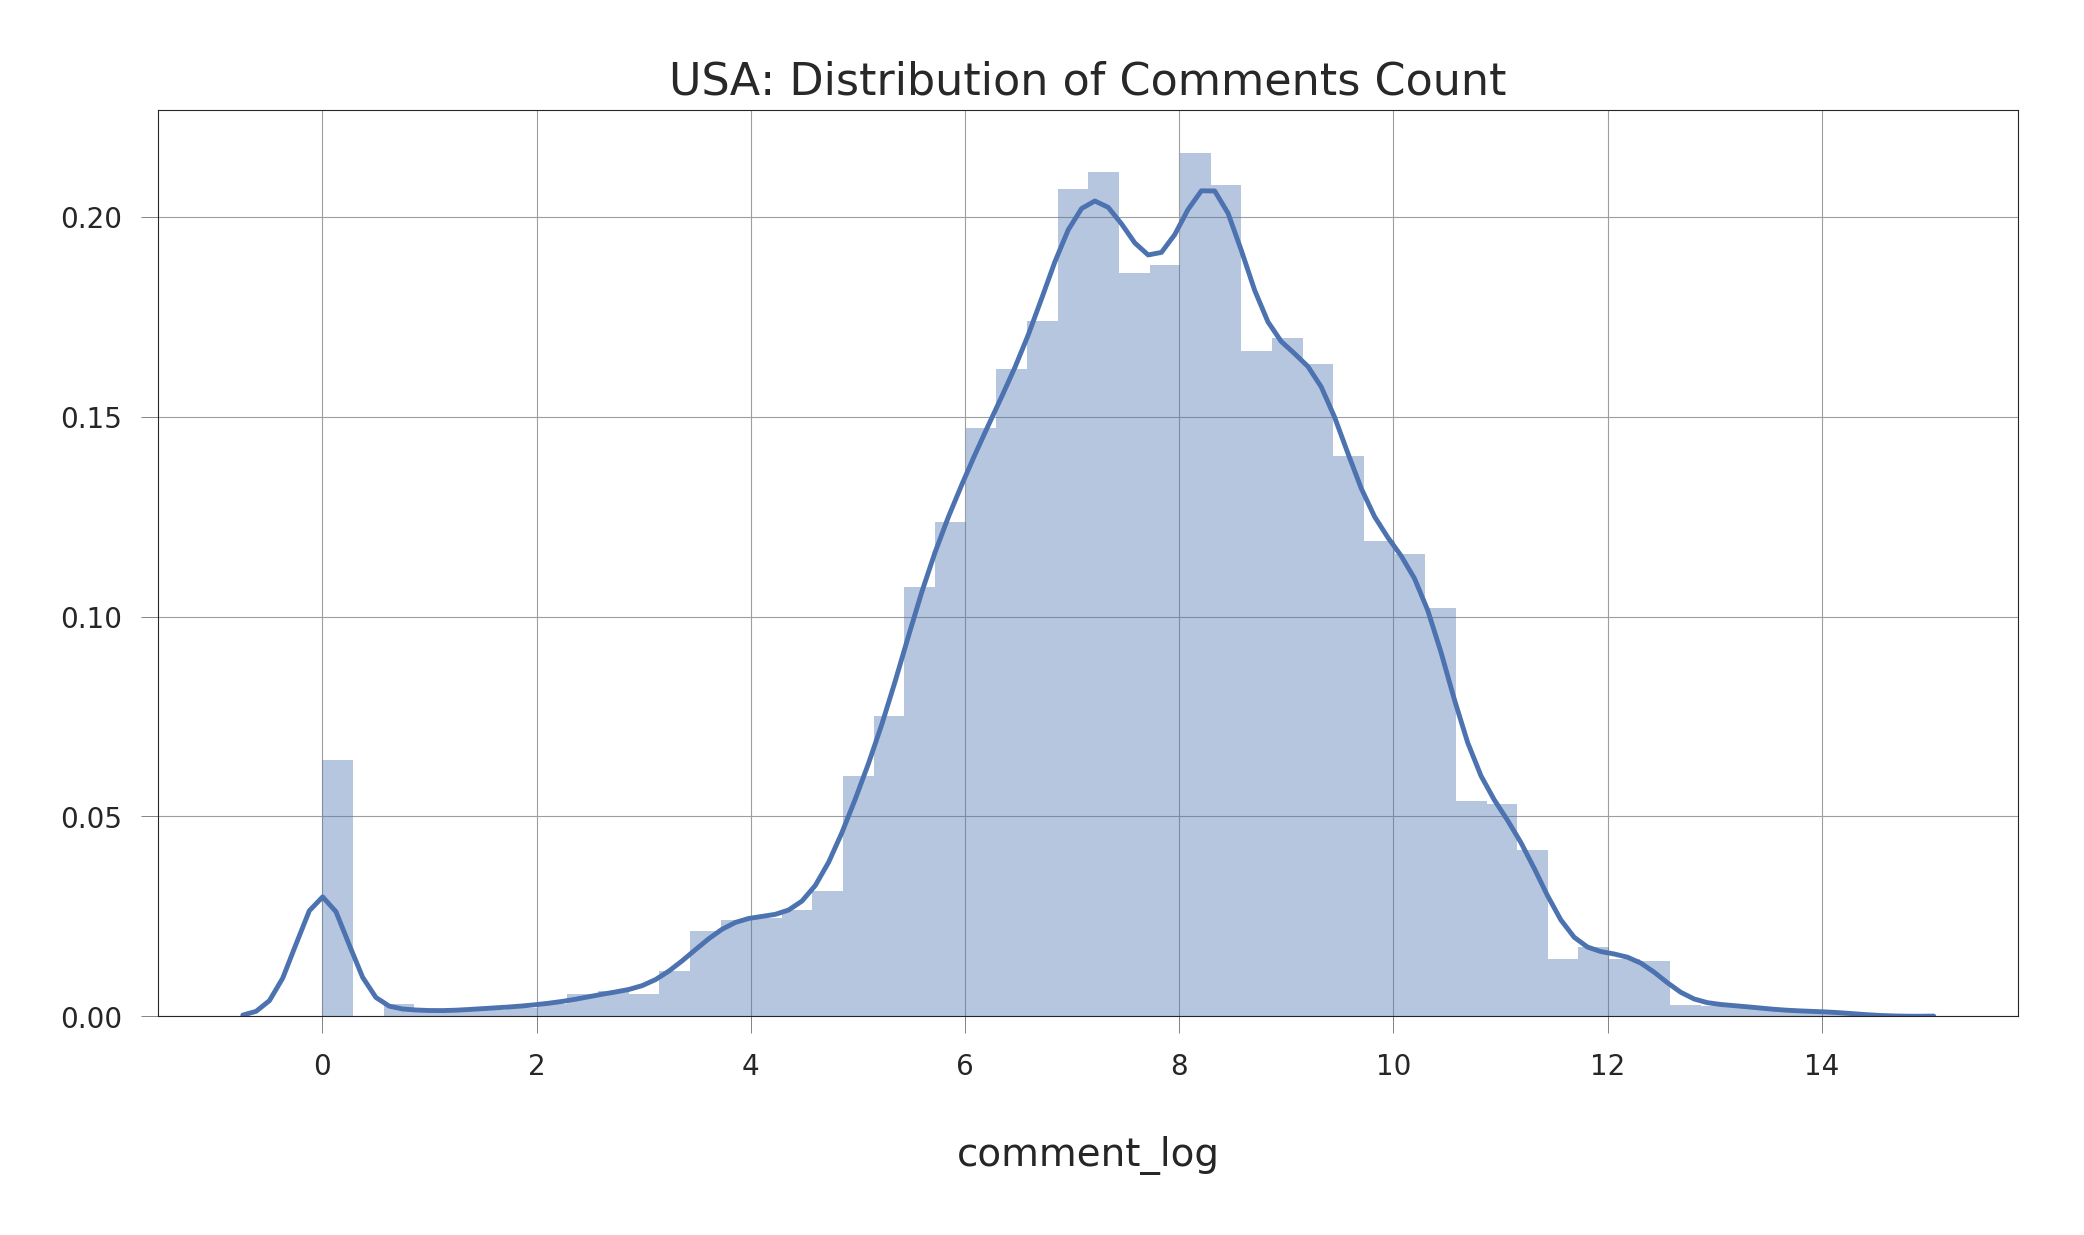

In [45]:
plt.figure(figsize = (12,6))
l4 = sns.distplot(df['comment_log'])
l4.set_title("USA: Distribution of Comments Count", fontsize=16);

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38916 entries, Jw1Y-zhQURU to 4YFo4bdMO8Q
Data columns (total 25 columns):
trending_date             38916 non-null object
title                     38916 non-null object
channel_title             38916 non-null object
category_id               38916 non-null object
publish_time              38916 non-null object
tags                      38916 non-null object
views                     38916 non-null int64
likes                     38916 non-null int64
dislikes                  38916 non-null int64
comment_count             38916 non-null int64
thumbnail_link            38916 non-null object
comments_disabled         38916 non-null bool
ratings_disabled          38916 non-null bool
video_error_or_removed    38916 non-null bool
description               38916 non-null object
category_name             38916 non-null object
publishing_day            38916 non-null object
publishing_hour           38916 non-null object
likes_log                 

In [47]:
df['comments_disabled'].value_counts(normalize=True)

False   0.98
True    0.02
Name: comments_disabled, dtype: float64

In [48]:
df['trending_date'] = pd.to_datetime(df['trending_date'], format='%y.%d.%m')
df['trending_date'].head()

video_id
Jw1Y-zhQURU   2017-11-14
3s1rvMFUweQ   2017-11-14
n1WpP7iowLc   2017-11-14
PUTEiSjKwJU   2017-11-14
rHwDegptbI4   2017-11-14
Name: trending_date, dtype: datetime64[ns]

In [49]:
df['publish_time'] = pd.to_datetime(df['publish_time'], format='%Y-%m-%dT%H:%M:%S.%fZ')
df['publish_time'].head()

video_id
Jw1Y-zhQURU   2017-11-10 07:38:29
3s1rvMFUweQ   2017-11-12 06:24:44
n1WpP7iowLc   2017-11-10 17:00:03
PUTEiSjKwJU   2017-11-13 02:30:38
rHwDegptbI4   2017-11-13 01:45:13
Name: publish_time, dtype: datetime64[ns]

In [50]:
df.insert(4, 'publish_date', df['publish_time'].dt.date)
df['publish_time'] = df['publish_time'].dt.time
df[['publish_date', 'publish_time']].head()

publish_date publish_time
video_id                             
Jw1Y-zhQURU   2017-11-10     07:38:29
3s1rvMFUweQ   2017-11-12     06:24:44
n1WpP7iowLc   2017-11-10     17:00:03
PUTEiSjKwJU   2017-11-13     02:30:38
rHwDegptbI4   2017-11-13     01:45:13

In [51]:
df[df["description"].apply(lambda x: pd.isnull(x))].head(1)

Empty DataFrame
Columns: [trending_date, title, channel_title, category_id, publish_date, publish_time, tags, views, likes, dislikes, comment_count, thumbnail_link, comments_disabled, ratings_disabled, video_error_or_removed, description, category_name, publishing_day, publishing_hour, likes_log, views_log, dislikes_log, comment_log, like_rate, dislike_rate, comment_rate]
Index: []

[0 rows x 26 columns]

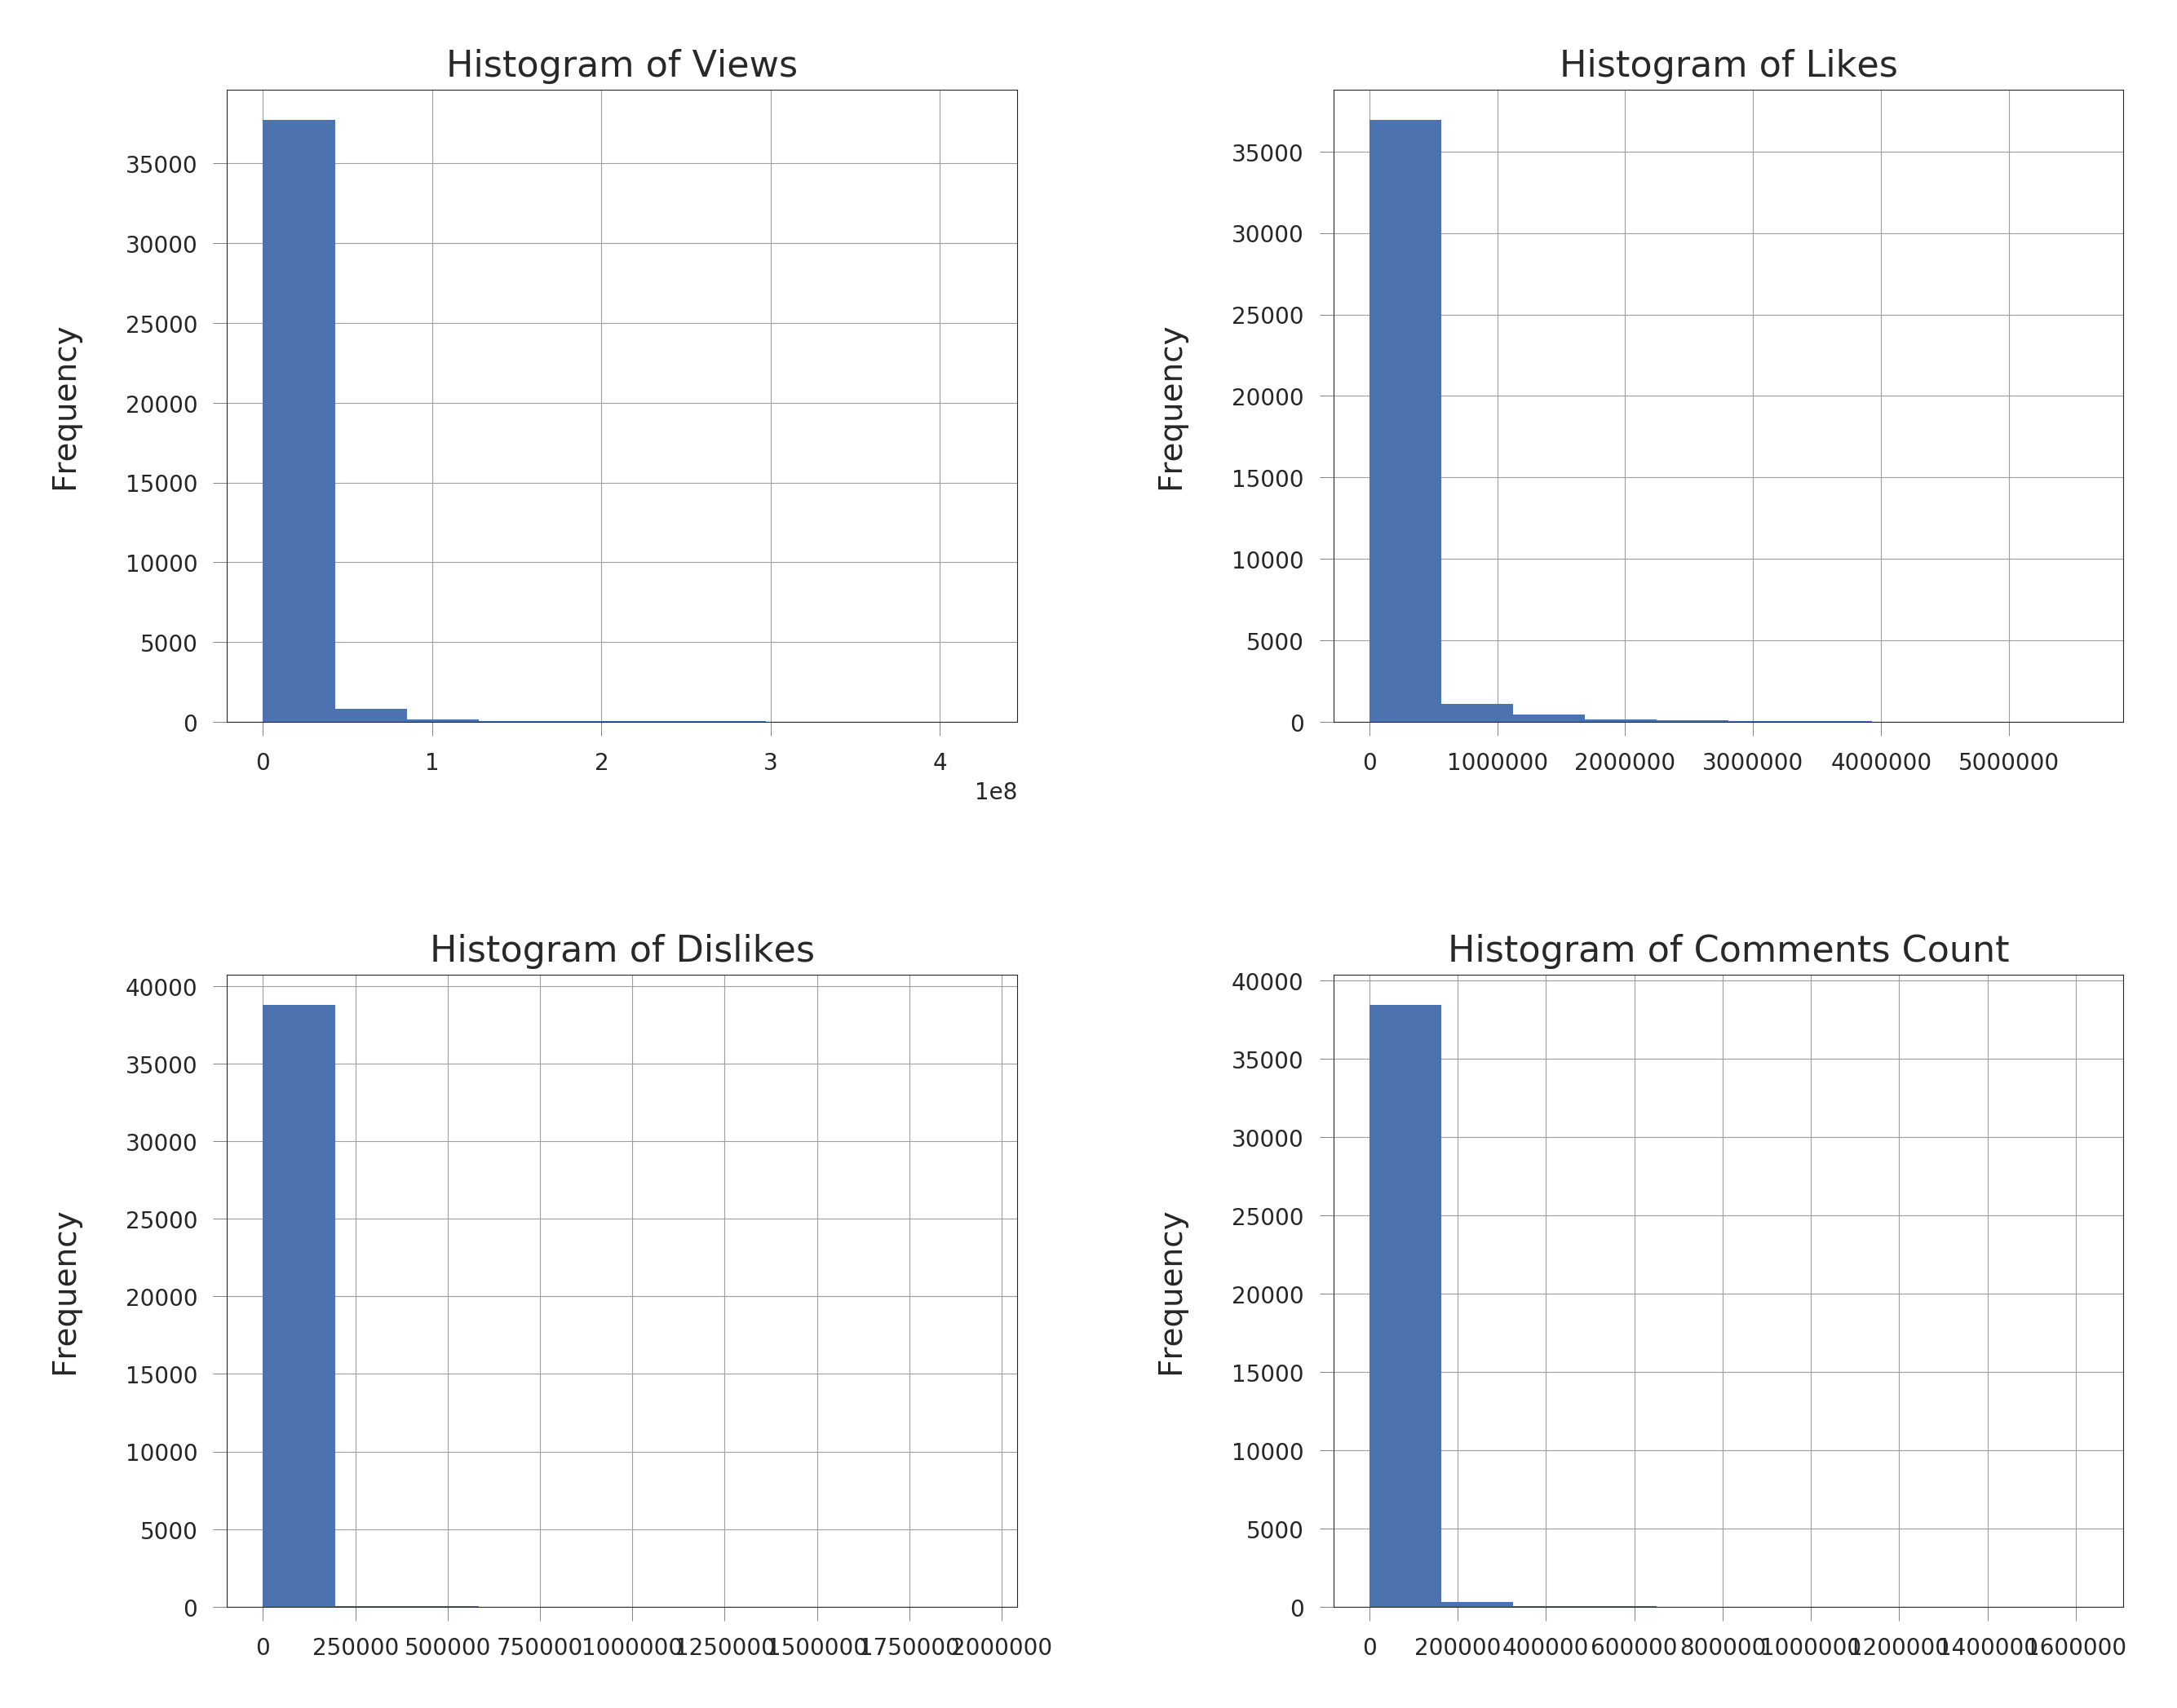

In [52]:
plt.figure(figsize = (15,12))

plt.subplot(221)
h1=df['views'].plot.hist()
h1.set_title("Histogram of Views", fontsize=16)

plt.subplot(222)
h2=df['likes'].plot.hist()
h2.set_title("Histogram of Likes", fontsize=16)

plt.subplot(223)
h3=df['dislikes'].plot.hist()
h3.set_title("Histogram of Dislikes", fontsize=16)

plt.subplot(224)
h4=df['comment_count'].plot.hist()
h4.set_title("Histogram of Comments Count", fontsize=16)


plt.subplots_adjust(wspace = 0.4, hspace = 0.4,top = 0.9)
plt.show();

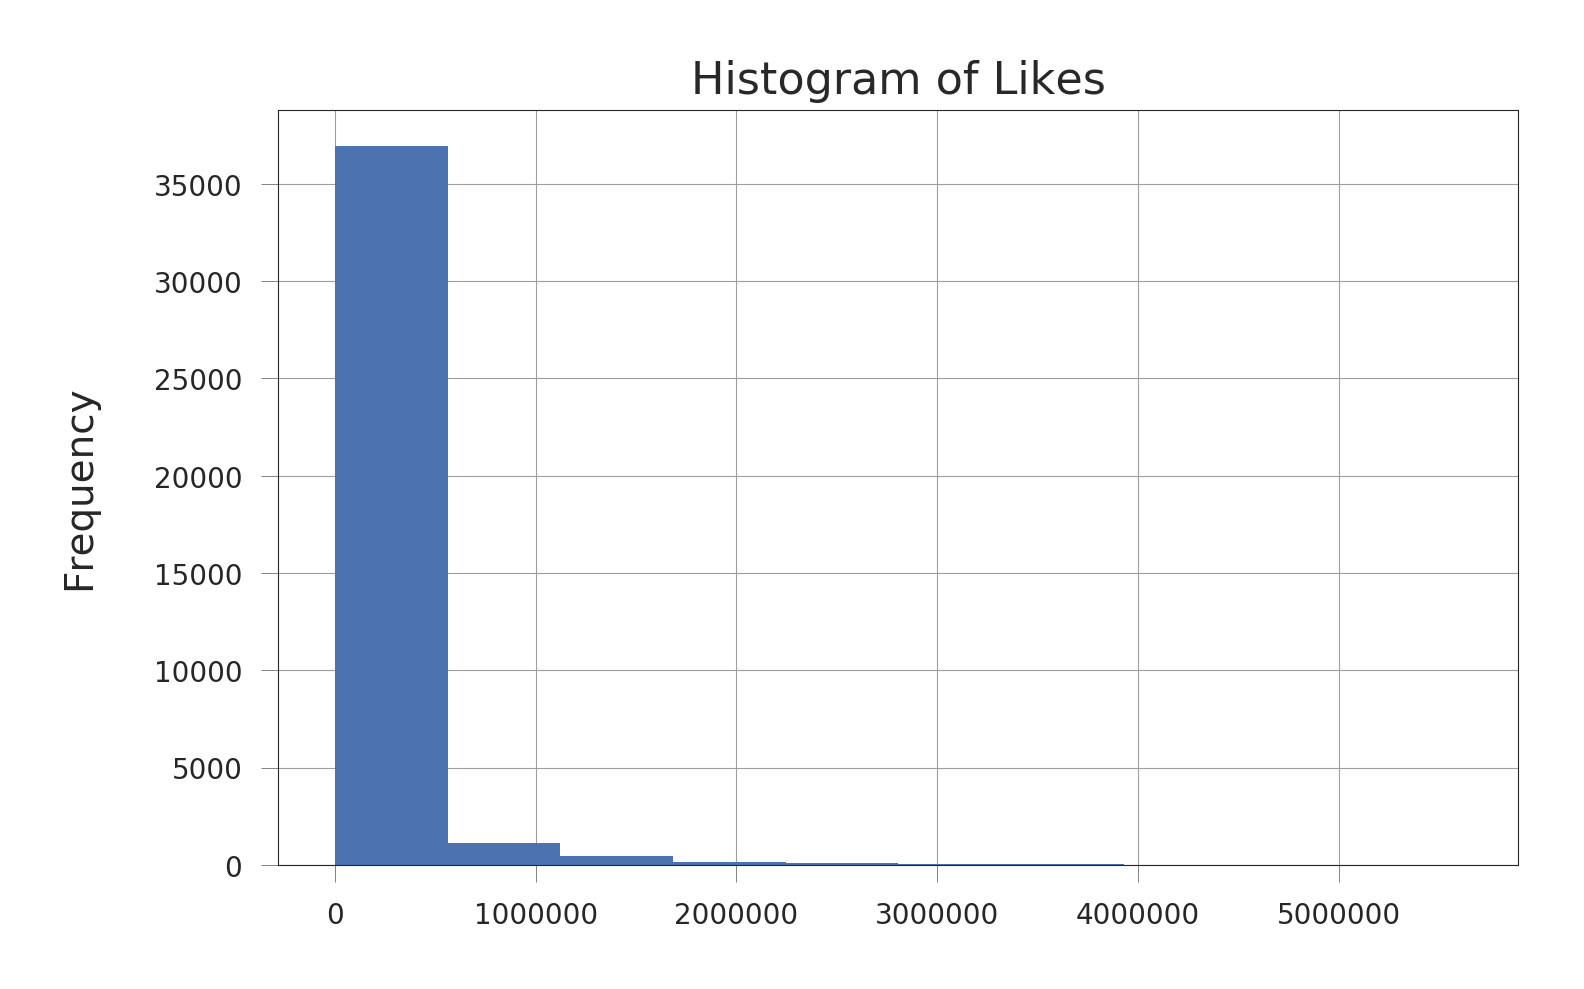

In [53]:
h2=df['likes'].plot.hist()
h2.set_title("Histogram of Likes", fontsize=16);

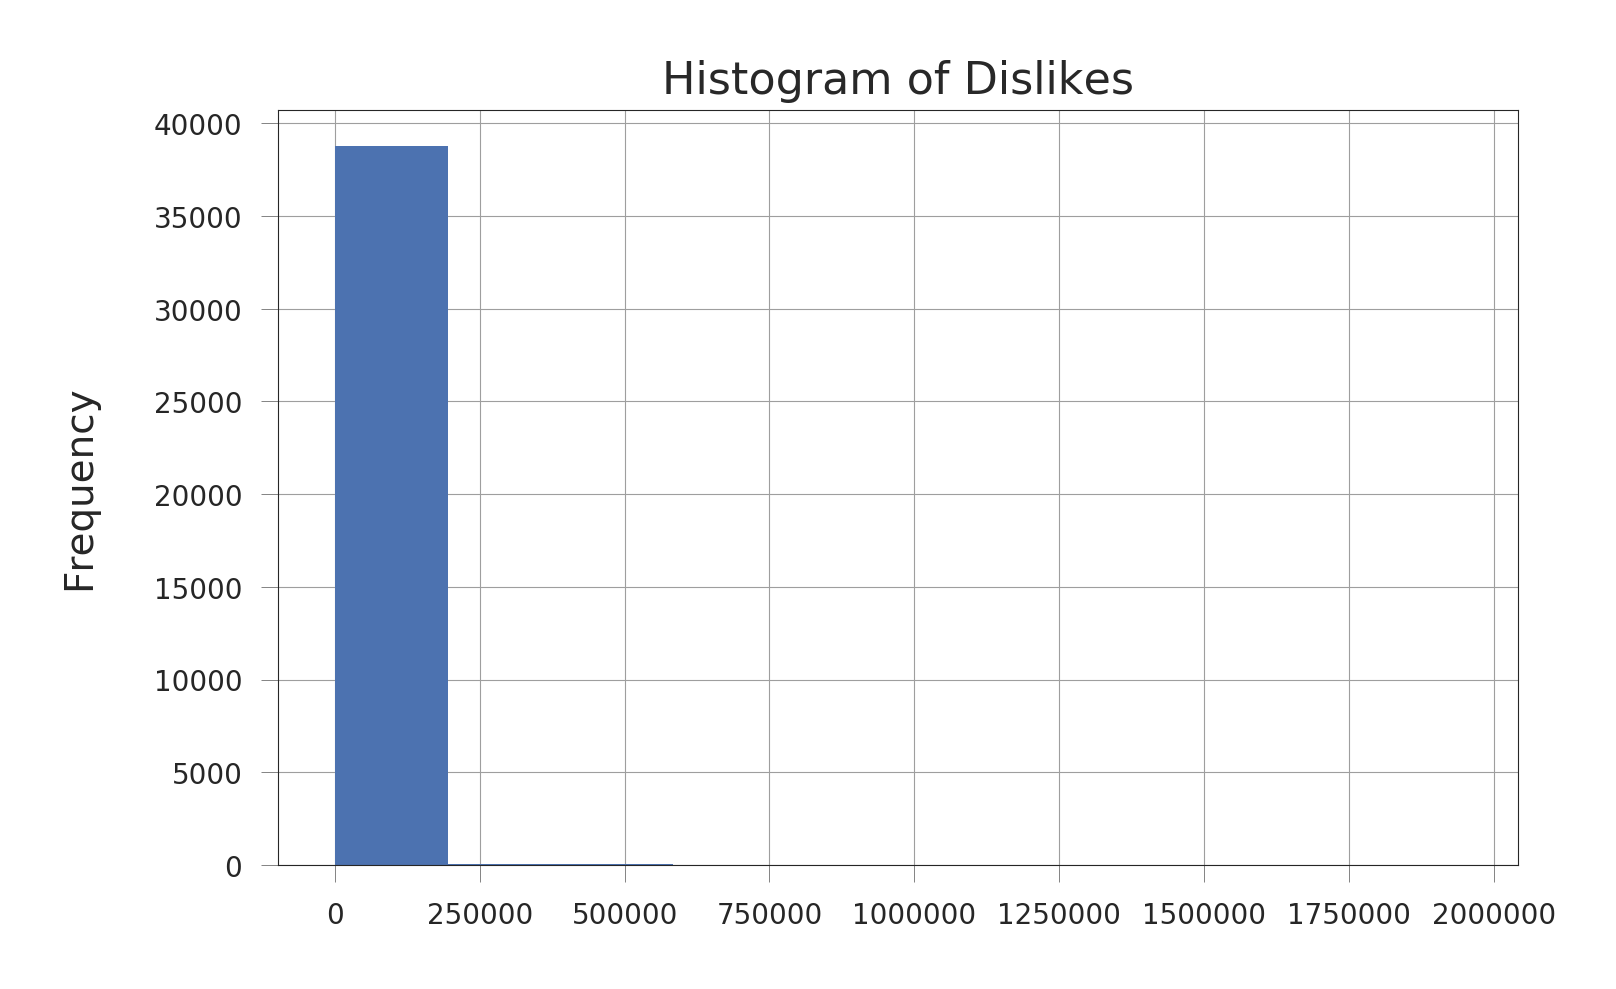

In [54]:
h3=df['dislikes'].plot.hist()
h3.set_title("Histogram of Dislikes", fontsize=16);

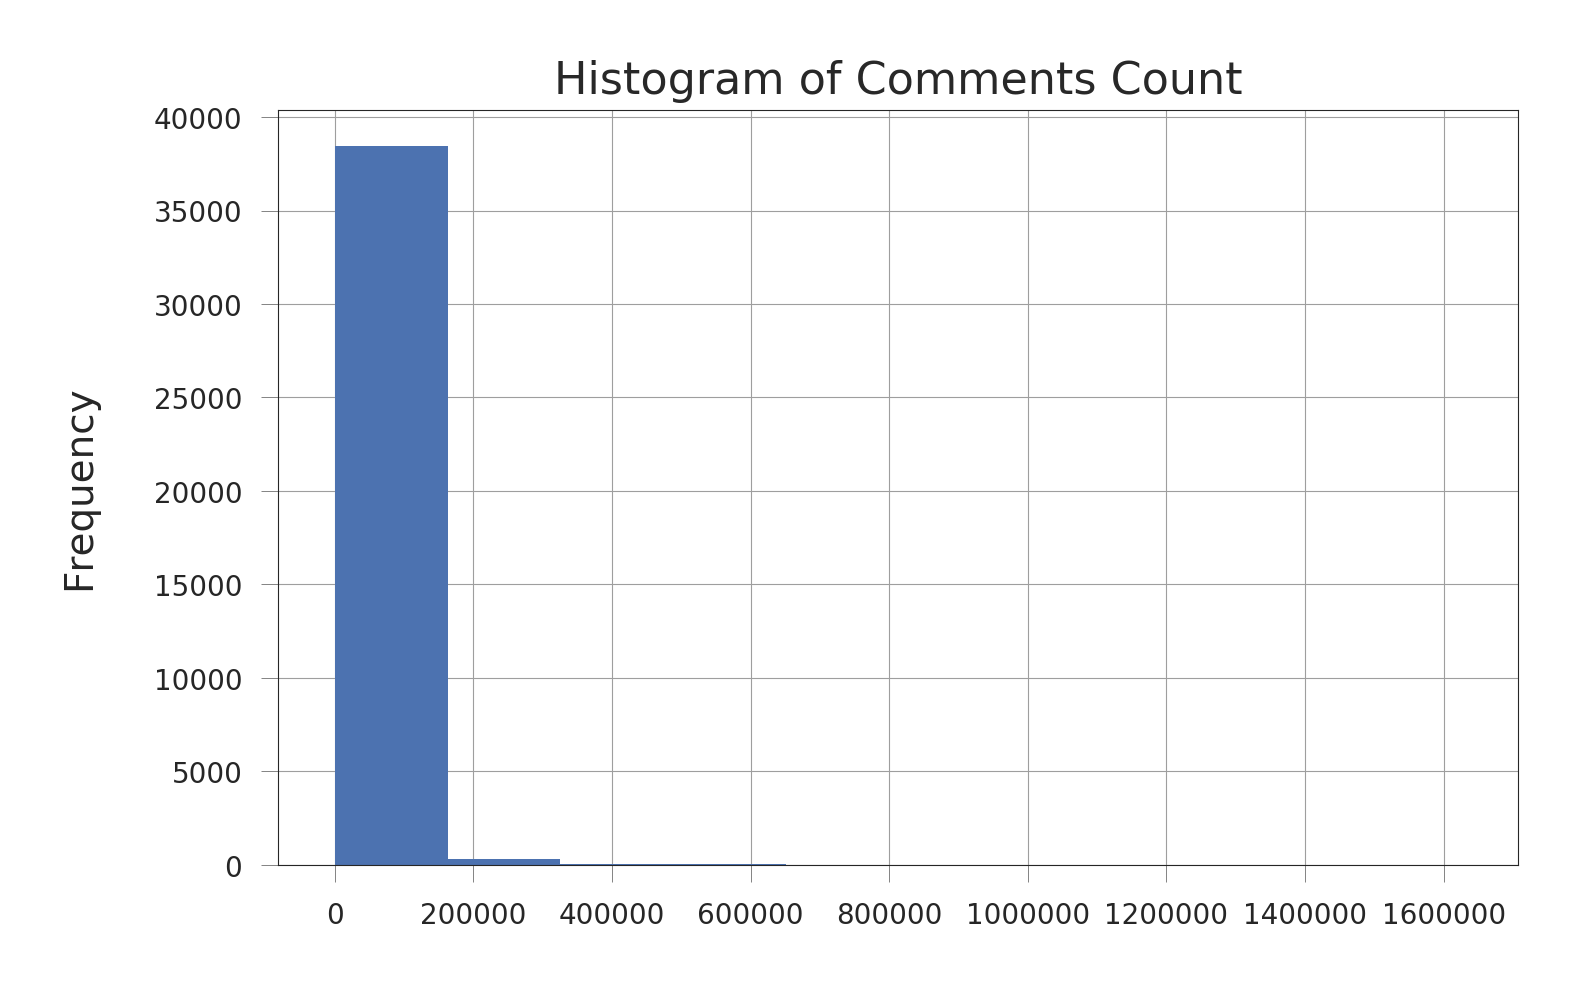

In [55]:
h=df['comment_count'].plot.hist()
h.set_title("Histogram of Comments Count", fontsize=16);

In [56]:
df['comments_disabled'].value_counts()

False    38233
True       683
Name: comments_disabled, dtype: int64

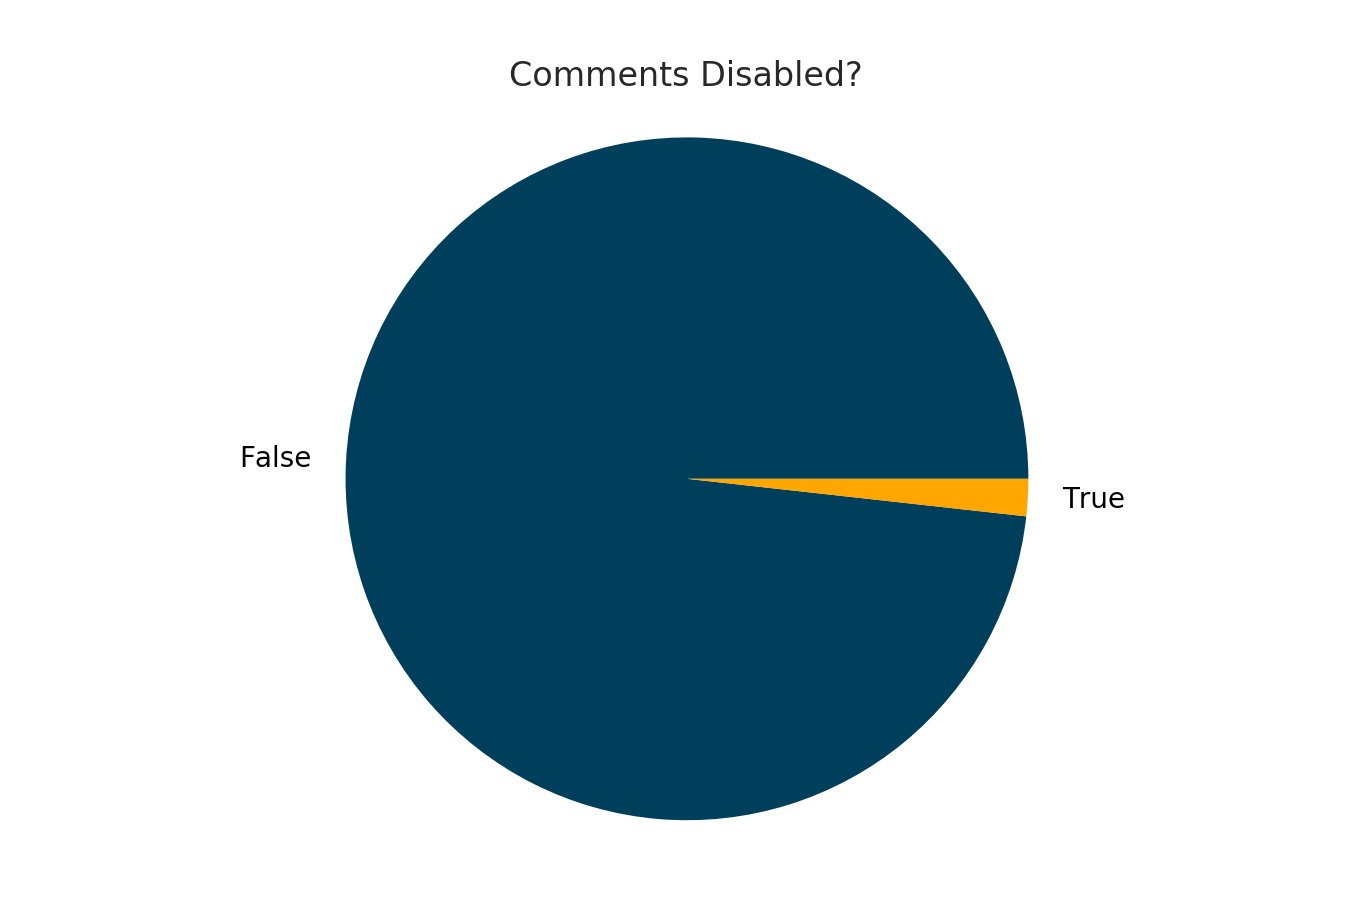

In [57]:
value_counts = df["comments_disabled"].value_counts().to_dict()
fig, ax = plt.subplots()
ax.pie(x=[value_counts[False], value_counts[True]], labels=['False', 'True'], colors=['#003f5c', '#ffa600'], textprops={'color': '#040204'})
ax.axis('equal')
ax.set_title('Comments Disabled?');

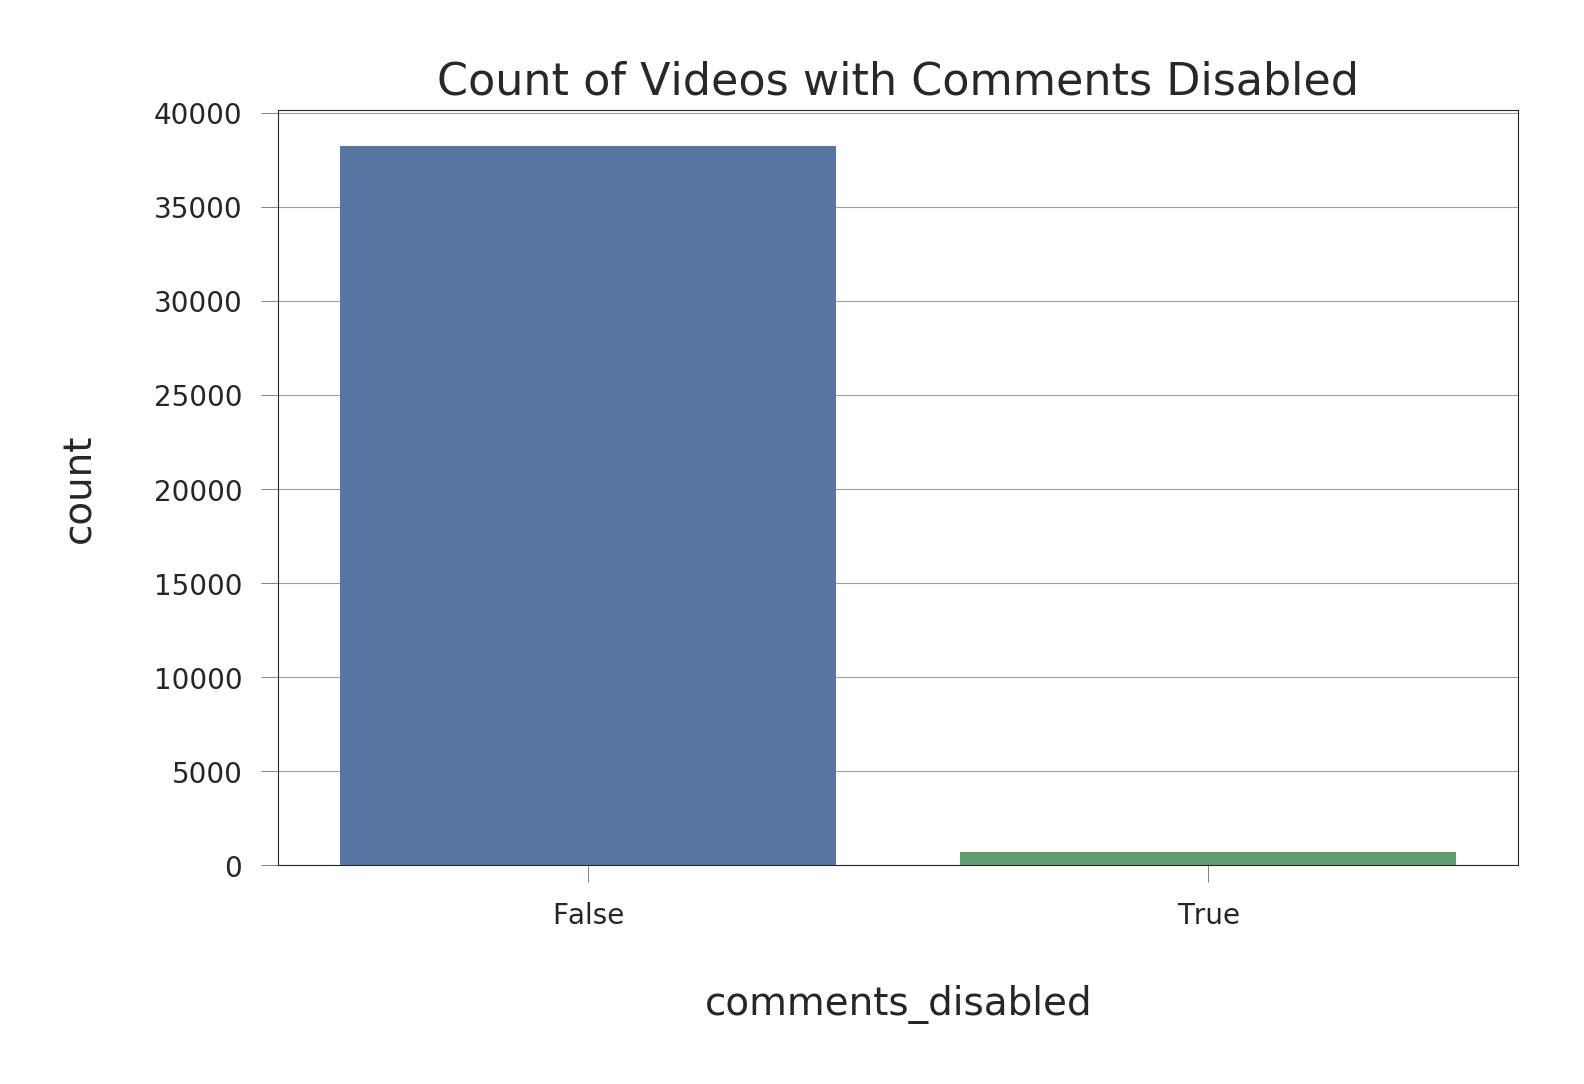

In [58]:
p1 = sns.countplot(x='comments_disabled', data=df)
p1.set_title("Count of Videos with Comments Disabled", fontsize=16);


In [59]:
df['ratings_disabled'].value_counts()

False    38644
True       272
Name: ratings_disabled, dtype: int64

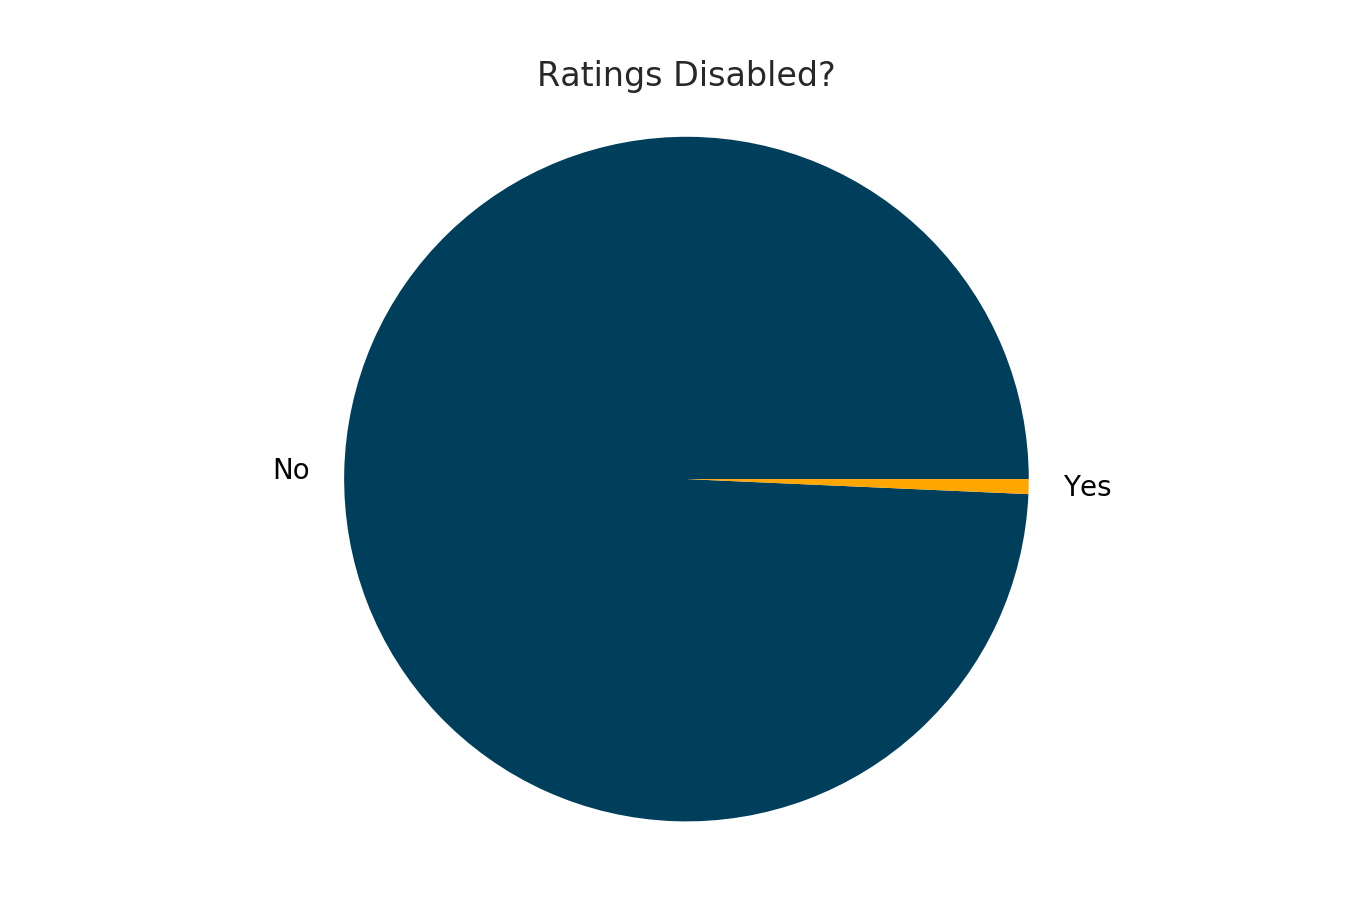

In [60]:
value_counts = df["ratings_disabled"].value_counts().to_dict()
fig, ax = plt.subplots()
ax.pie([value_counts[False], value_counts[True]], labels=['No', 'Yes'], colors=['#003f5c', '#ffa600'], textprops={'color': '#040204'})
ax.axis('equal')
ax.set_title('Ratings Disabled?');

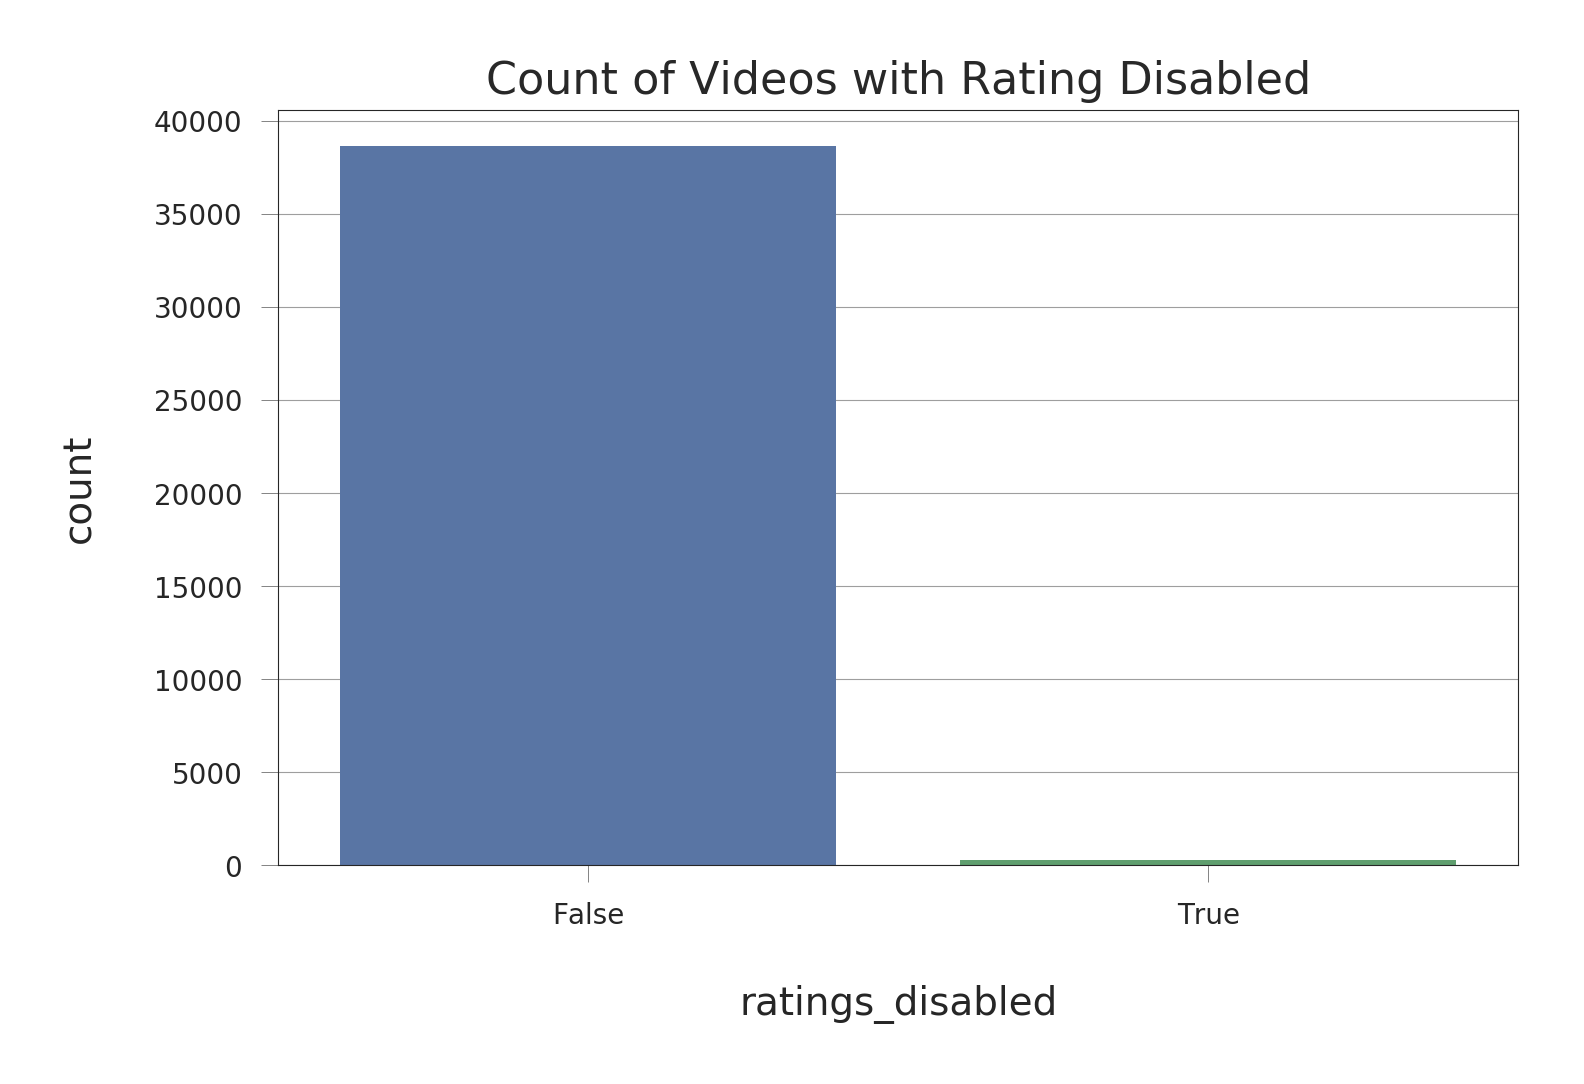

In [61]:
p2 = sns.countplot(x='ratings_disabled', data=df)
p2.set_title("Count of Videos with Rating Disabled", fontsize=16);

In [62]:
len(df[(df["comments_disabled"] == True) & (df["ratings_disabled"] == True)].index)

224

In [63]:
df['video_error_or_removed'].value_counts()

False    38847
True        69
Name: video_error_or_removed, dtype: int64

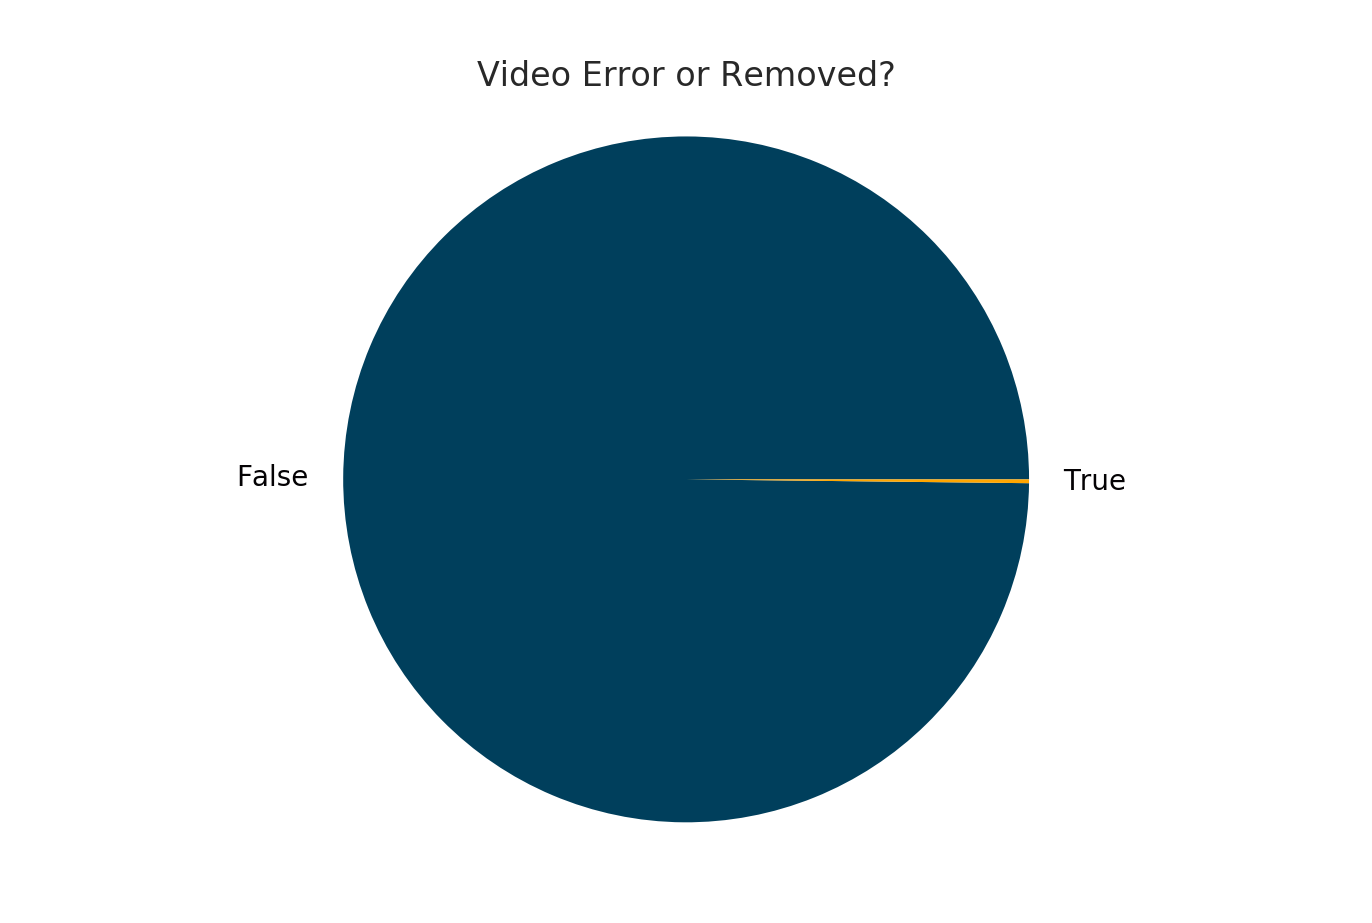

In [64]:
value_counts = df["video_error_or_removed"].value_counts().to_dict()
fig, ax = plt.subplots()
ax.pie([value_counts[False], value_counts[True]], labels=['False', 'True'], 
        colors=['#003f5c', '#ffa600'], textprops={'color': '#040204'})
ax.axis('equal')
ax.set_title('Video Error or Removed?');

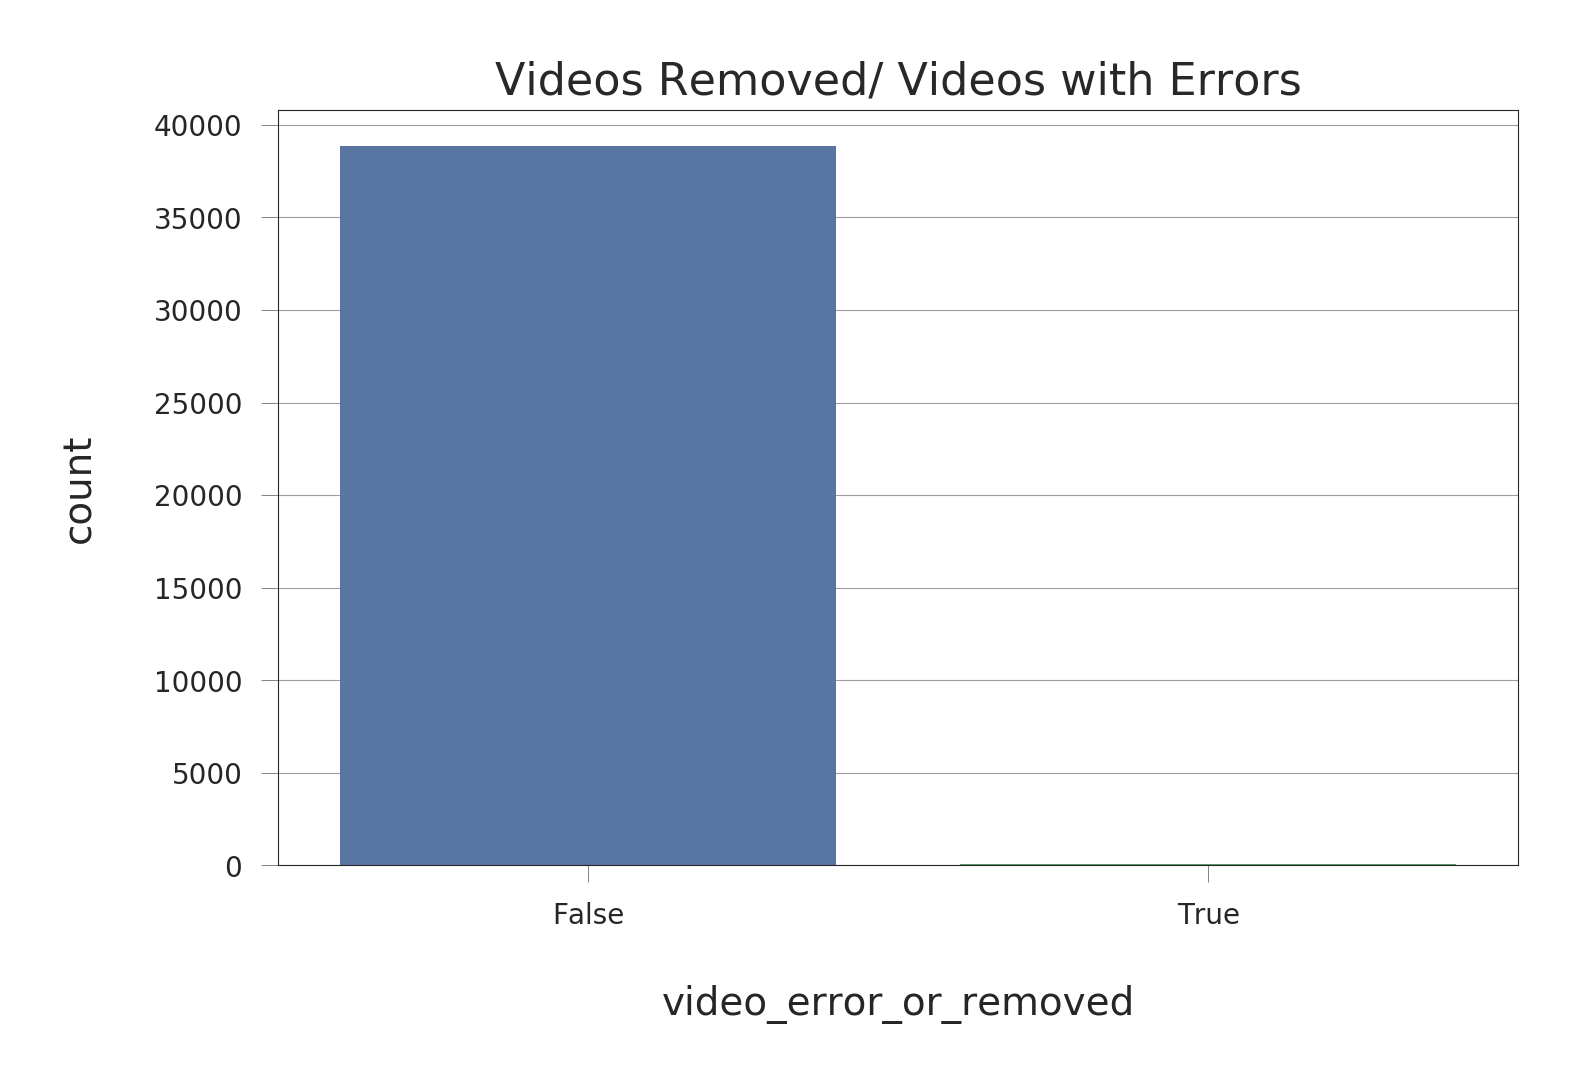

In [65]:
p3 = sns.countplot(x='video_error_or_removed', data=df)
p3.set_title("Videos Removed/ Videos with Errors", fontsize=16);


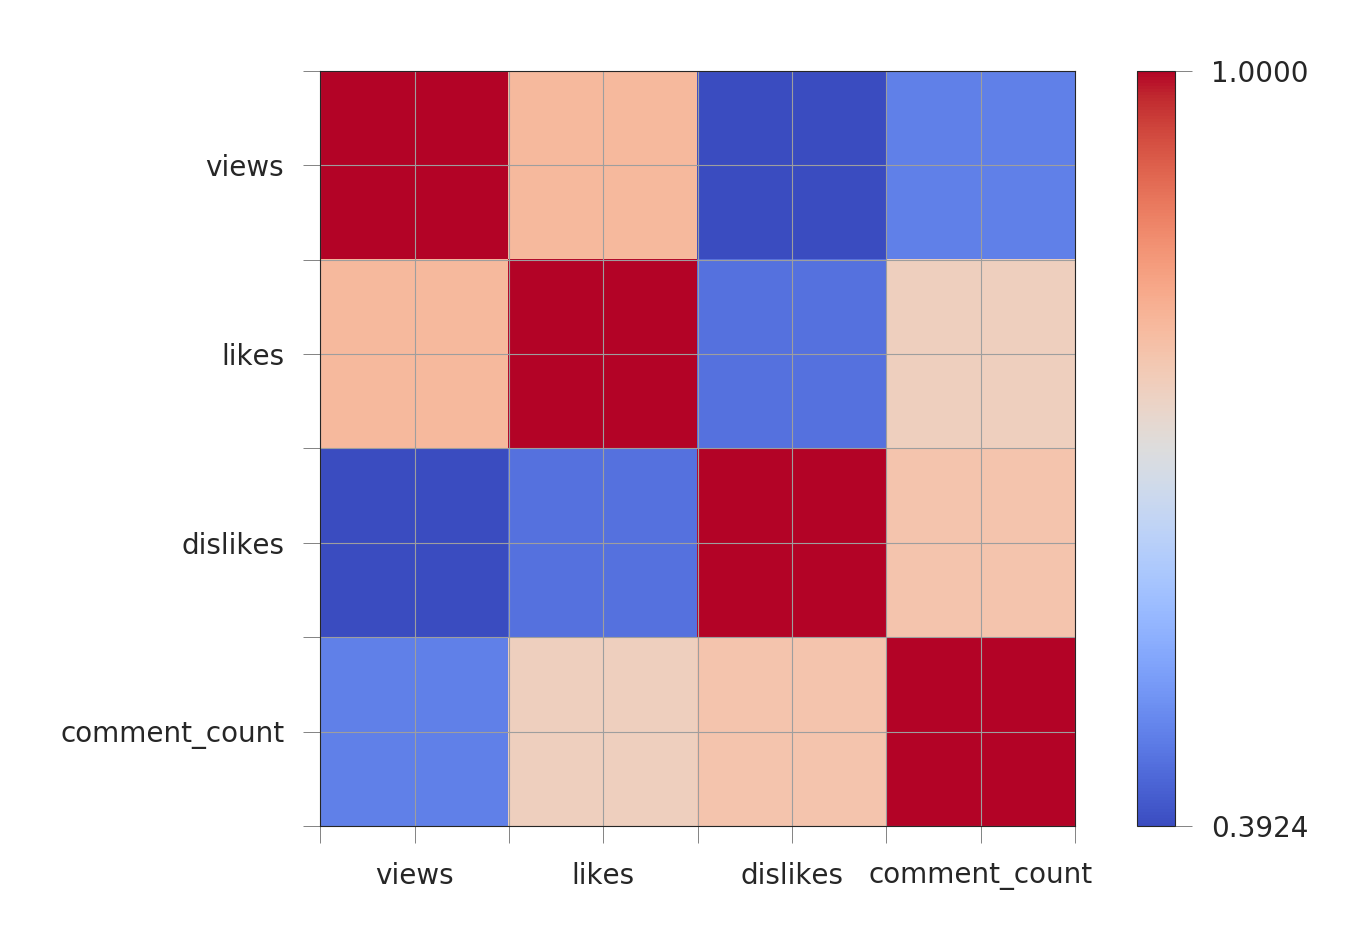

In [66]:
fig, ax = plt.subplots()
heatmap = ax.imshow(corr_matrix, interpolation='nearest', cmap=cm.coolwarm)

# making the colorbar on the side
cbar_min = corr_matrix.min().min()
cbar_max = corr_matrix.max().max()
cbar = fig.colorbar(heatmap, ticks=[cbar_min, cbar_max])

# making the labels
labels = ['']
for column in keep_columns:
    labels.append(column)
    labels.append('')
ax.set_yticklabels(labels, minor=False)
ax.set_xticklabels(labels, minor=False)

plt.show();

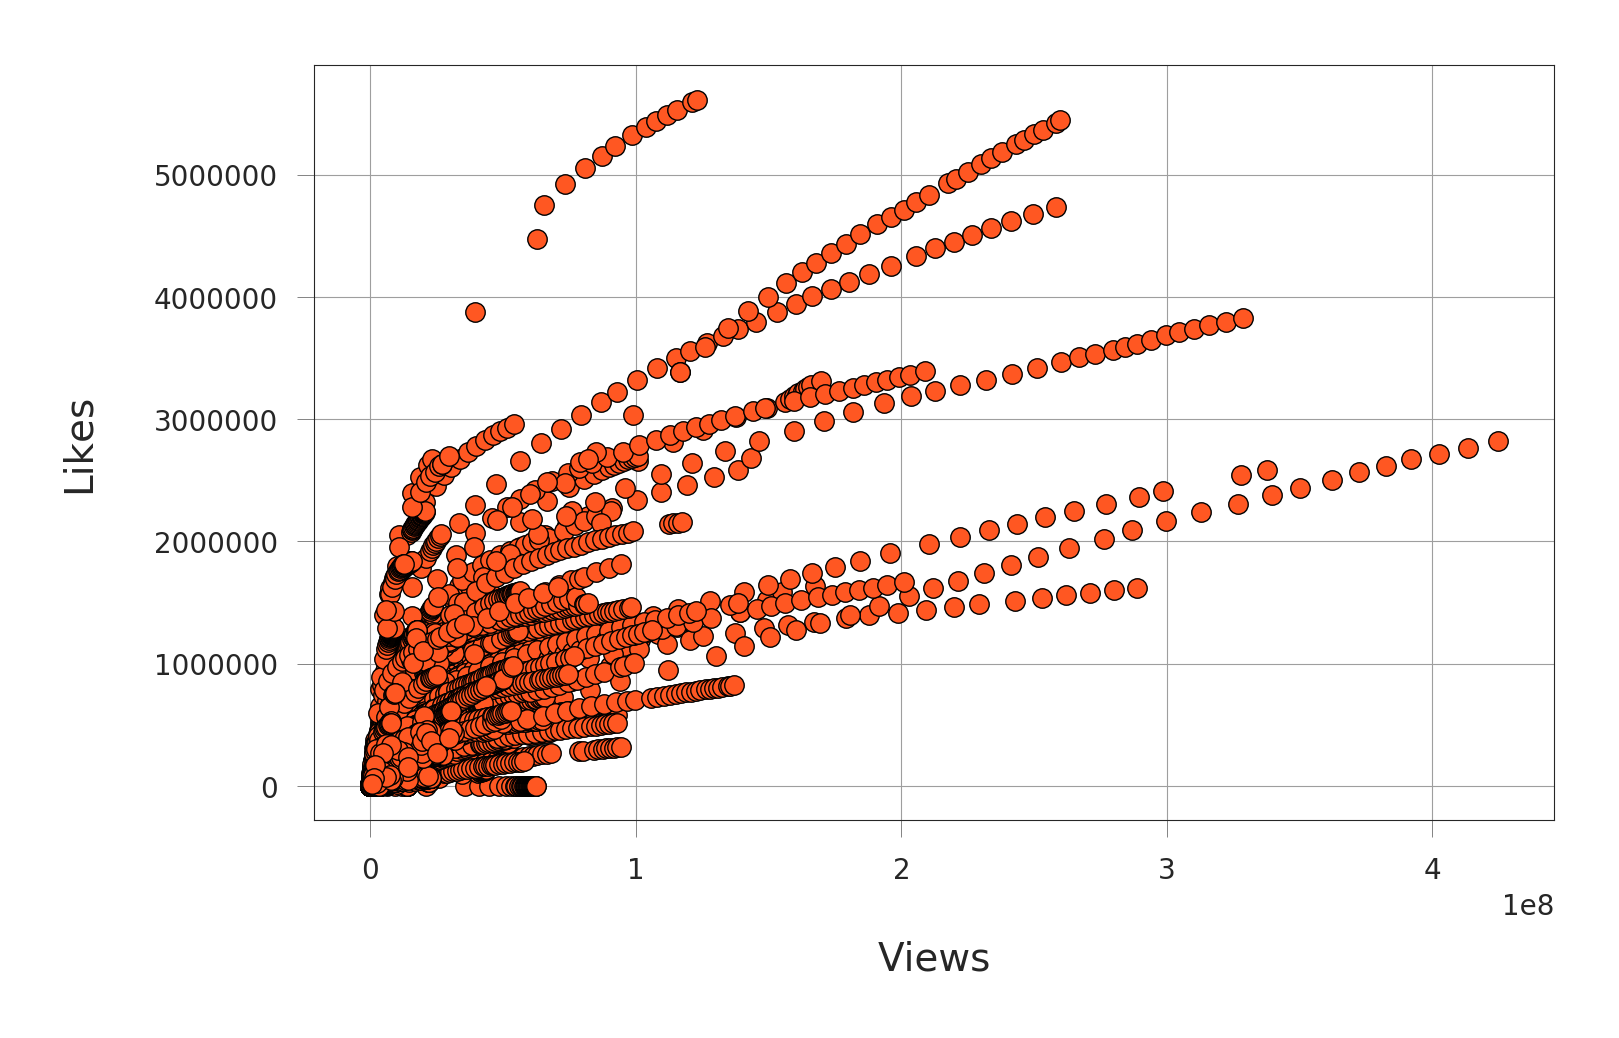

In [67]:
fig, ax = plt.subplots()
plt.scatter(x=df['views'], y=df['likes'], color=PLOT_COLORS[2], edgecolors="#000000", linewidths=0.5)
ax.set(xlabel="Views", ylabel="Likes");

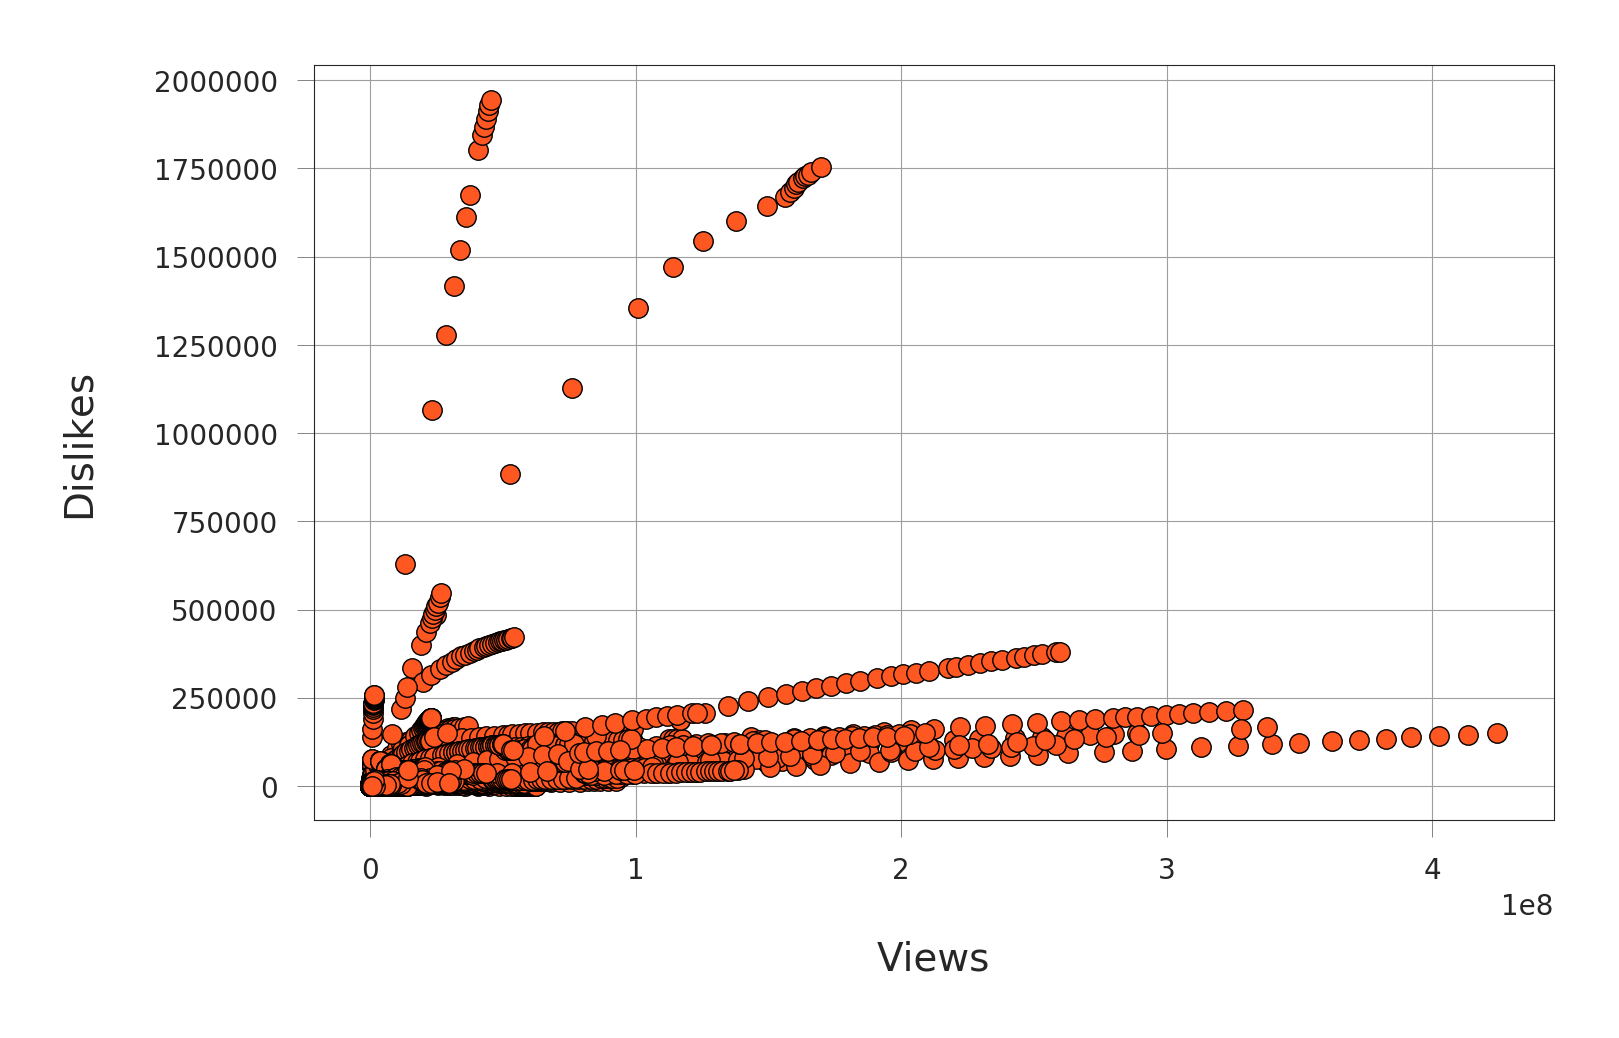

In [68]:
fig, ax = plt.subplots()
plt.scatter(x=df['views'], y=df['dislikes'], color=PLOT_COLORS[2], edgecolors="#000000", linewidths=0.5)
ax.set(xlabel="Views", ylabel="Dislikes");

In [69]:
df['likes_log'] = np.log(df['likes'] + 1)
df['views_log'] = np.log(df['views'] + 1)
df['dislikes_log'] = np.log(df['dislikes'] + 1)
df['comment_log'] = np.log(df['comment_count'] + 1)

df['like_rate'] =  df['likes'] / df['views'] * 100
df['dislike_rate'] =  df['dislikes'] / df['views'] * 100
df['comment_rate'] =  df['comment_count'] / df['views'] * 100


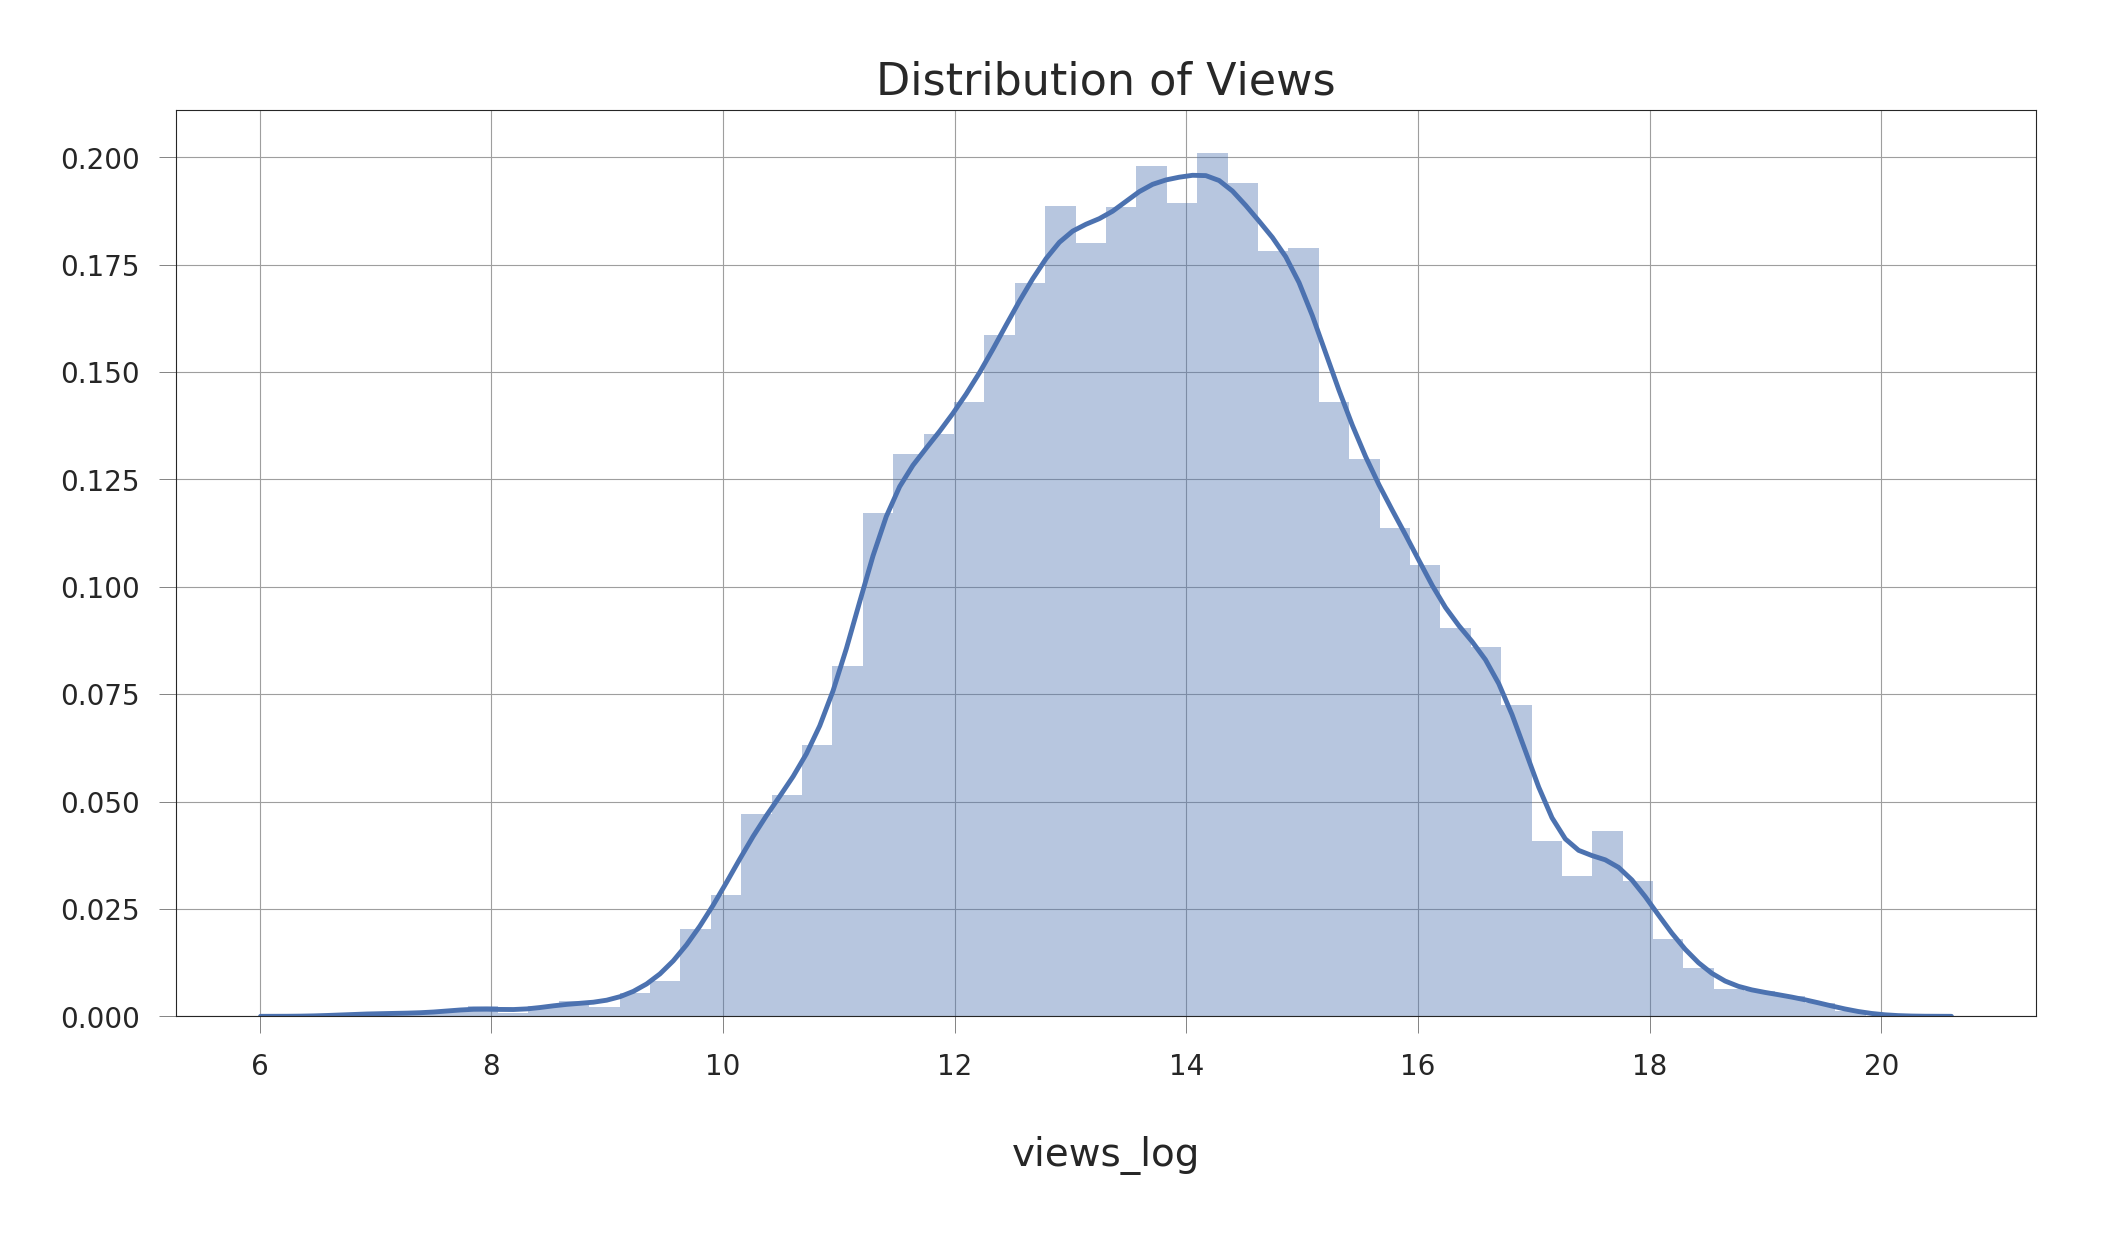

In [70]:
plt.figure(figsize = (12,6))
l1 = sns.distplot(df['views_log'])
l1.set_title("Distribution of Views", fontsize=16);

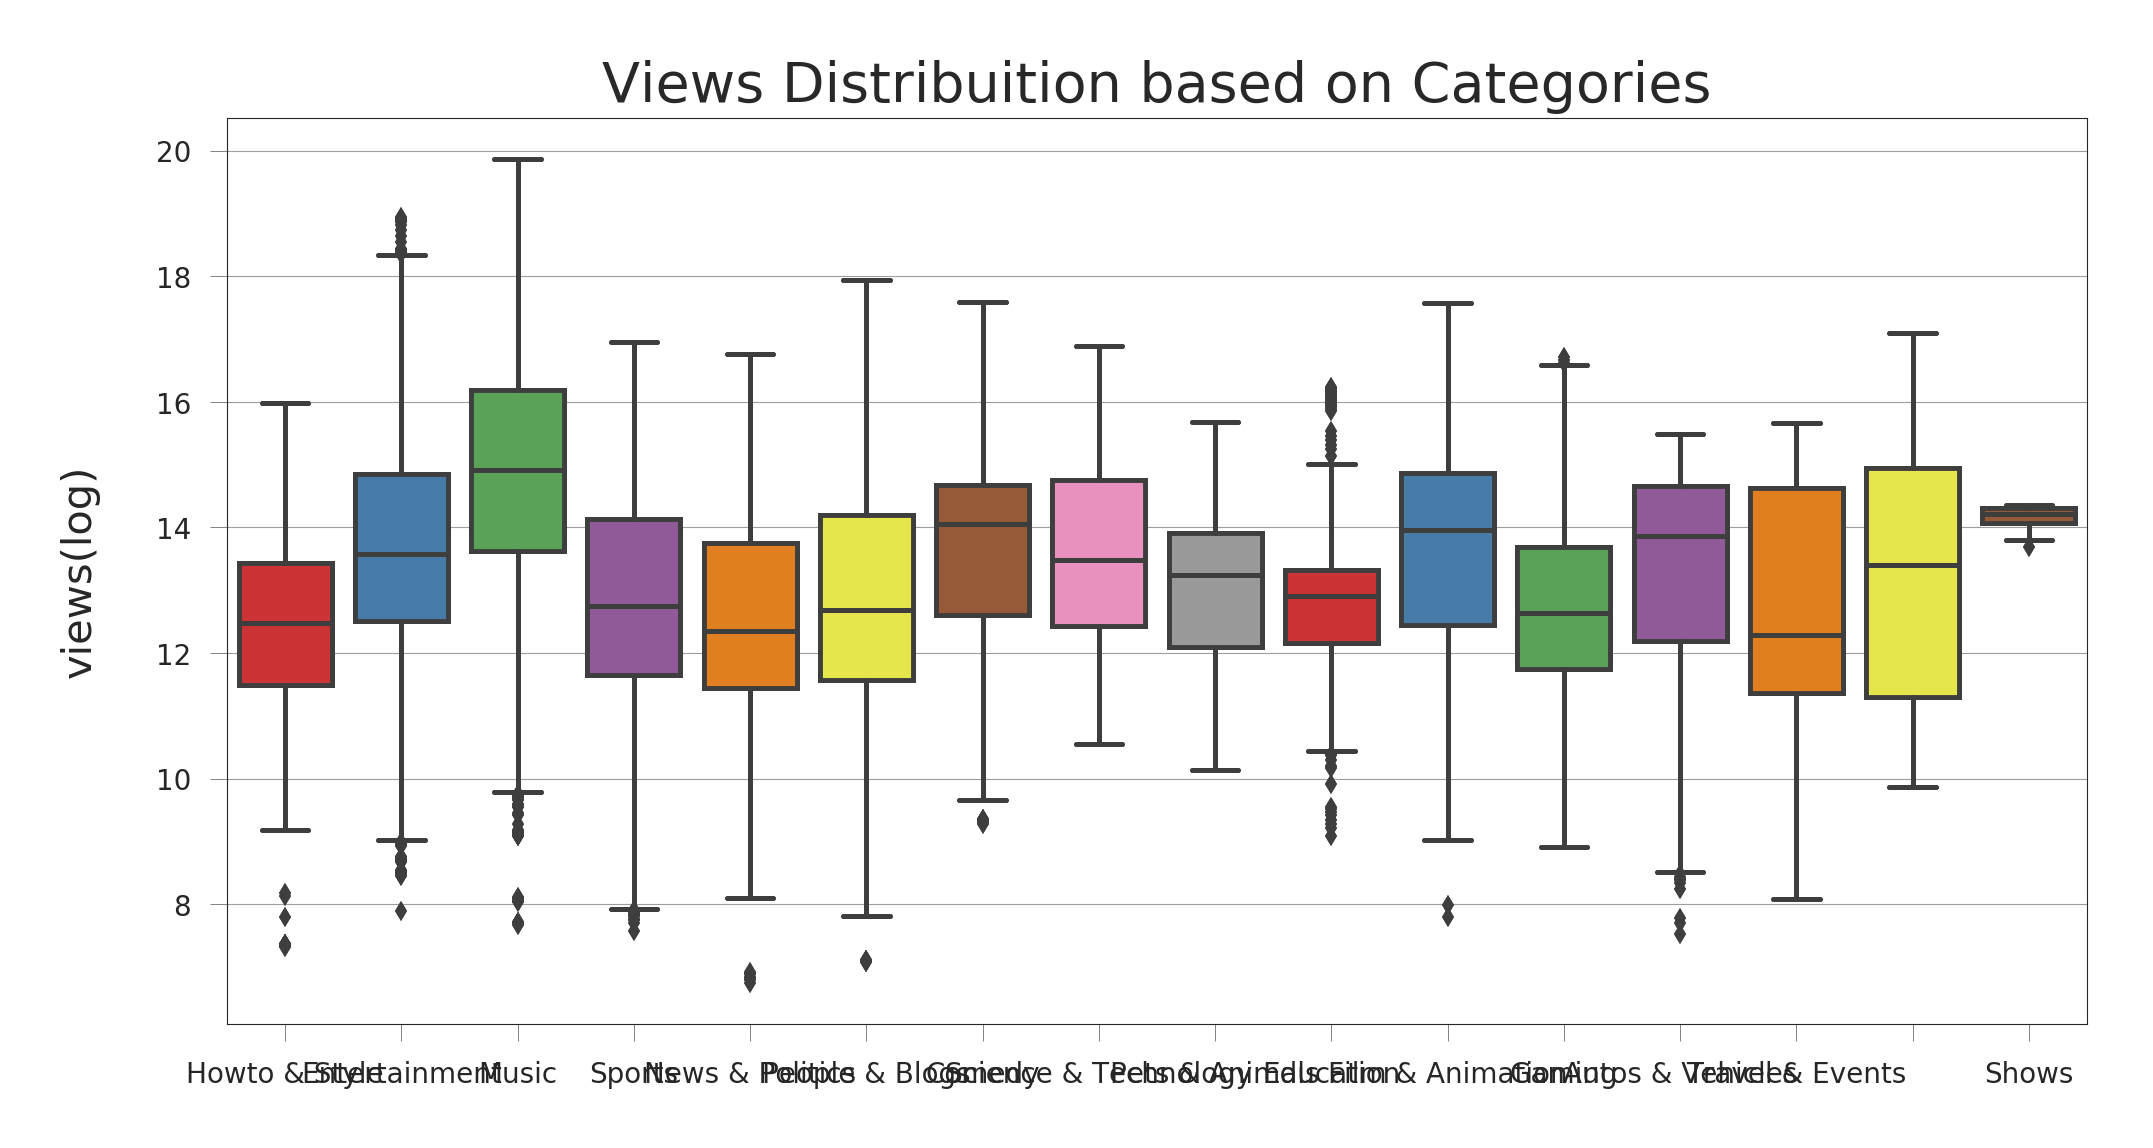

In [71]:
plt.figure(figsize = (12,6))
g1 = sns.boxplot(x='category_name', y='views_log', data=df, palette="Set1")
g1 = sns.boxplot(x='category_name', y='views_log', data=df, palette="Set1")
g1.set_title("Views Distribuition based on Categories", fontsize=20)
g1.set_xlabel("", fontsize=15)
g1.set_ylabel("views(log)", fontsize=15);

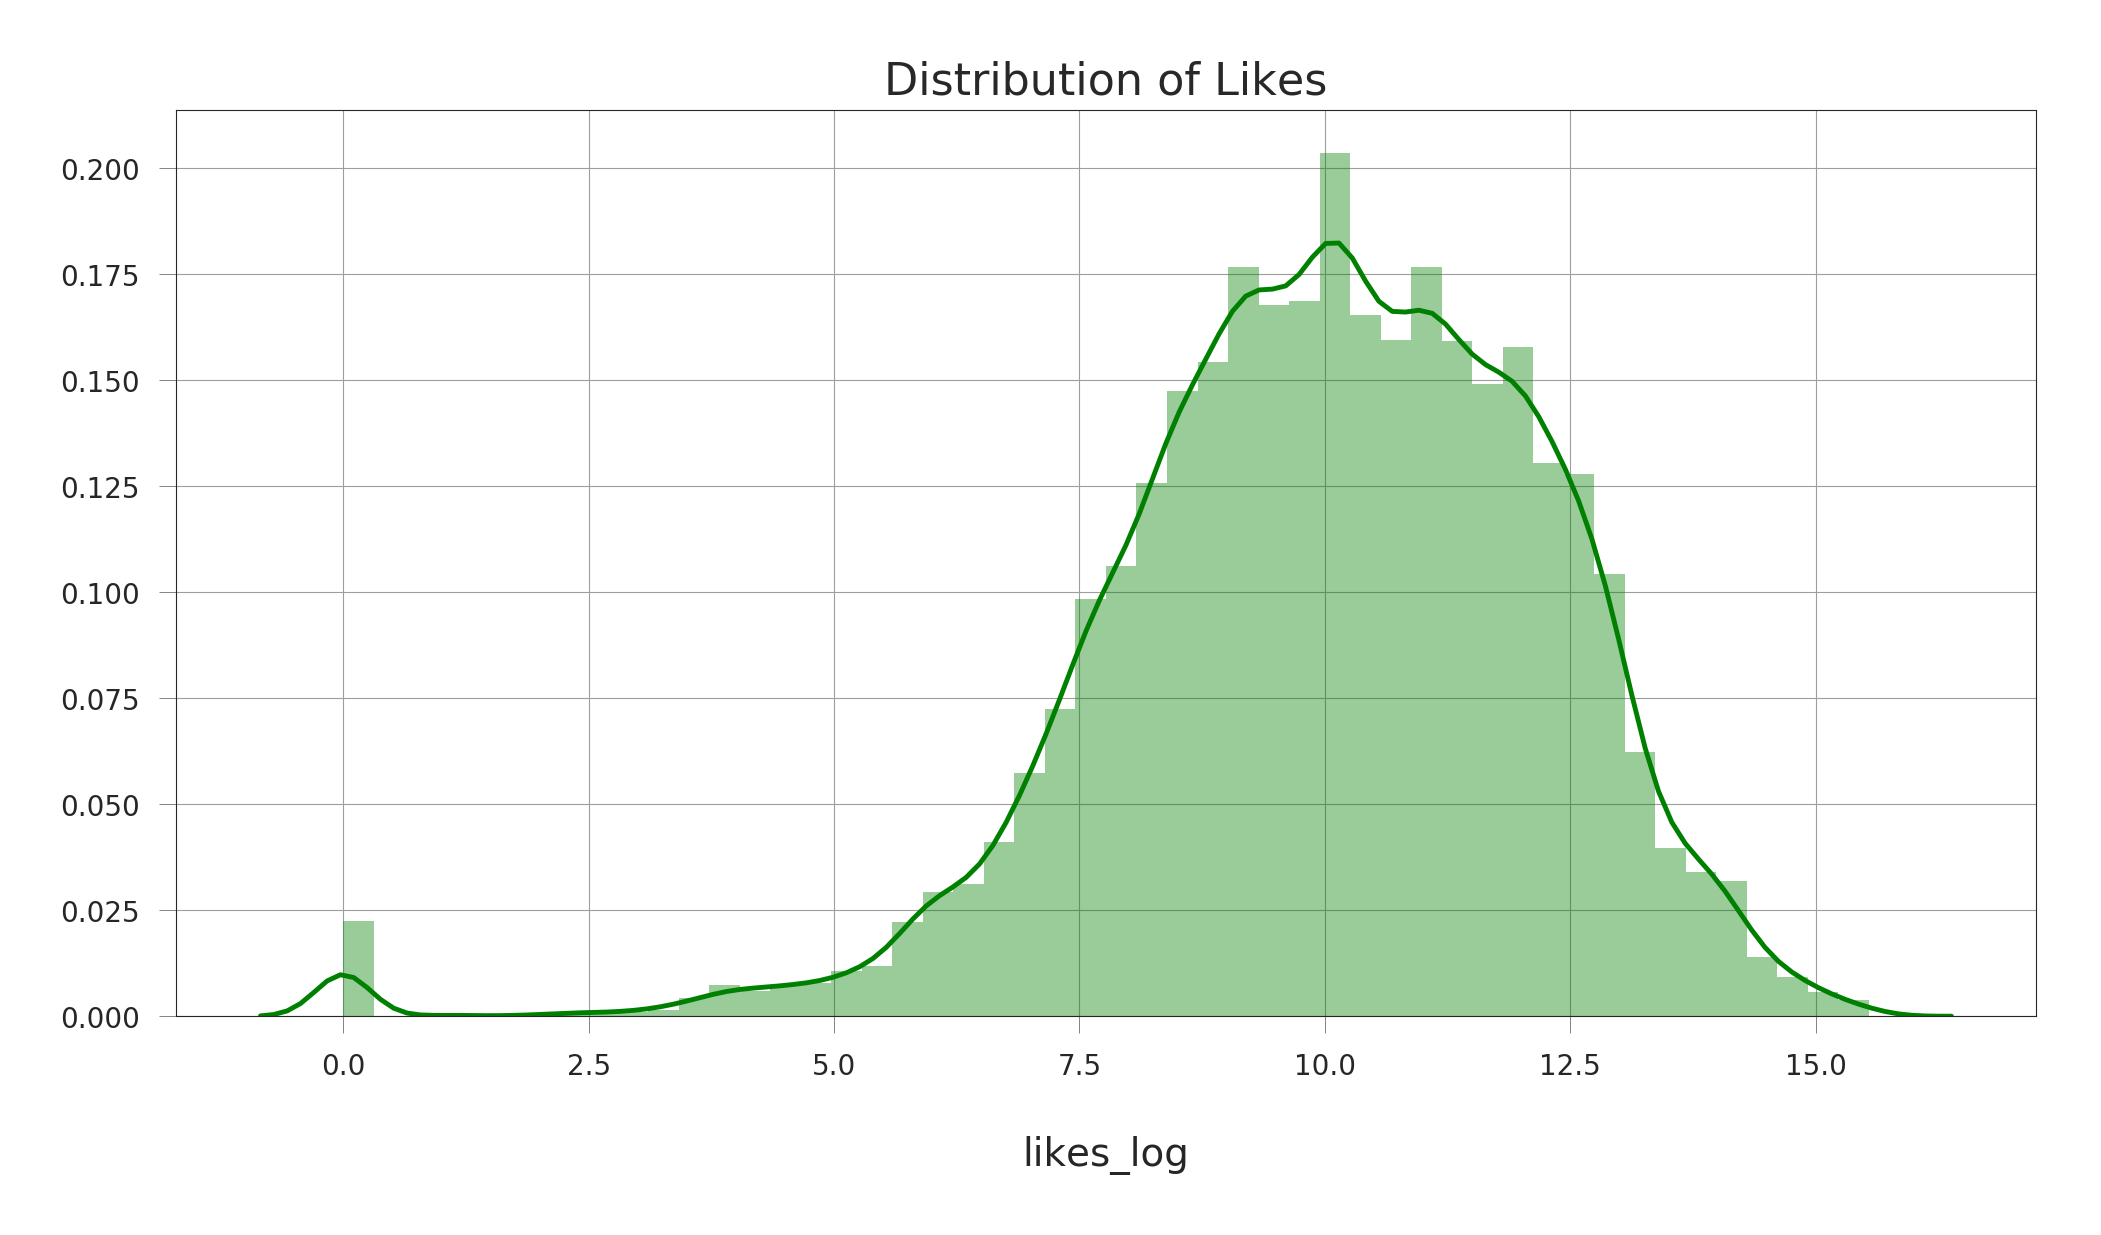

In [72]:
plt.figure(figsize = (12,6))
l2 = sns.distplot(df['likes_log'],color='green')
l2.set_title('Distribution of Likes', fontsize=16);

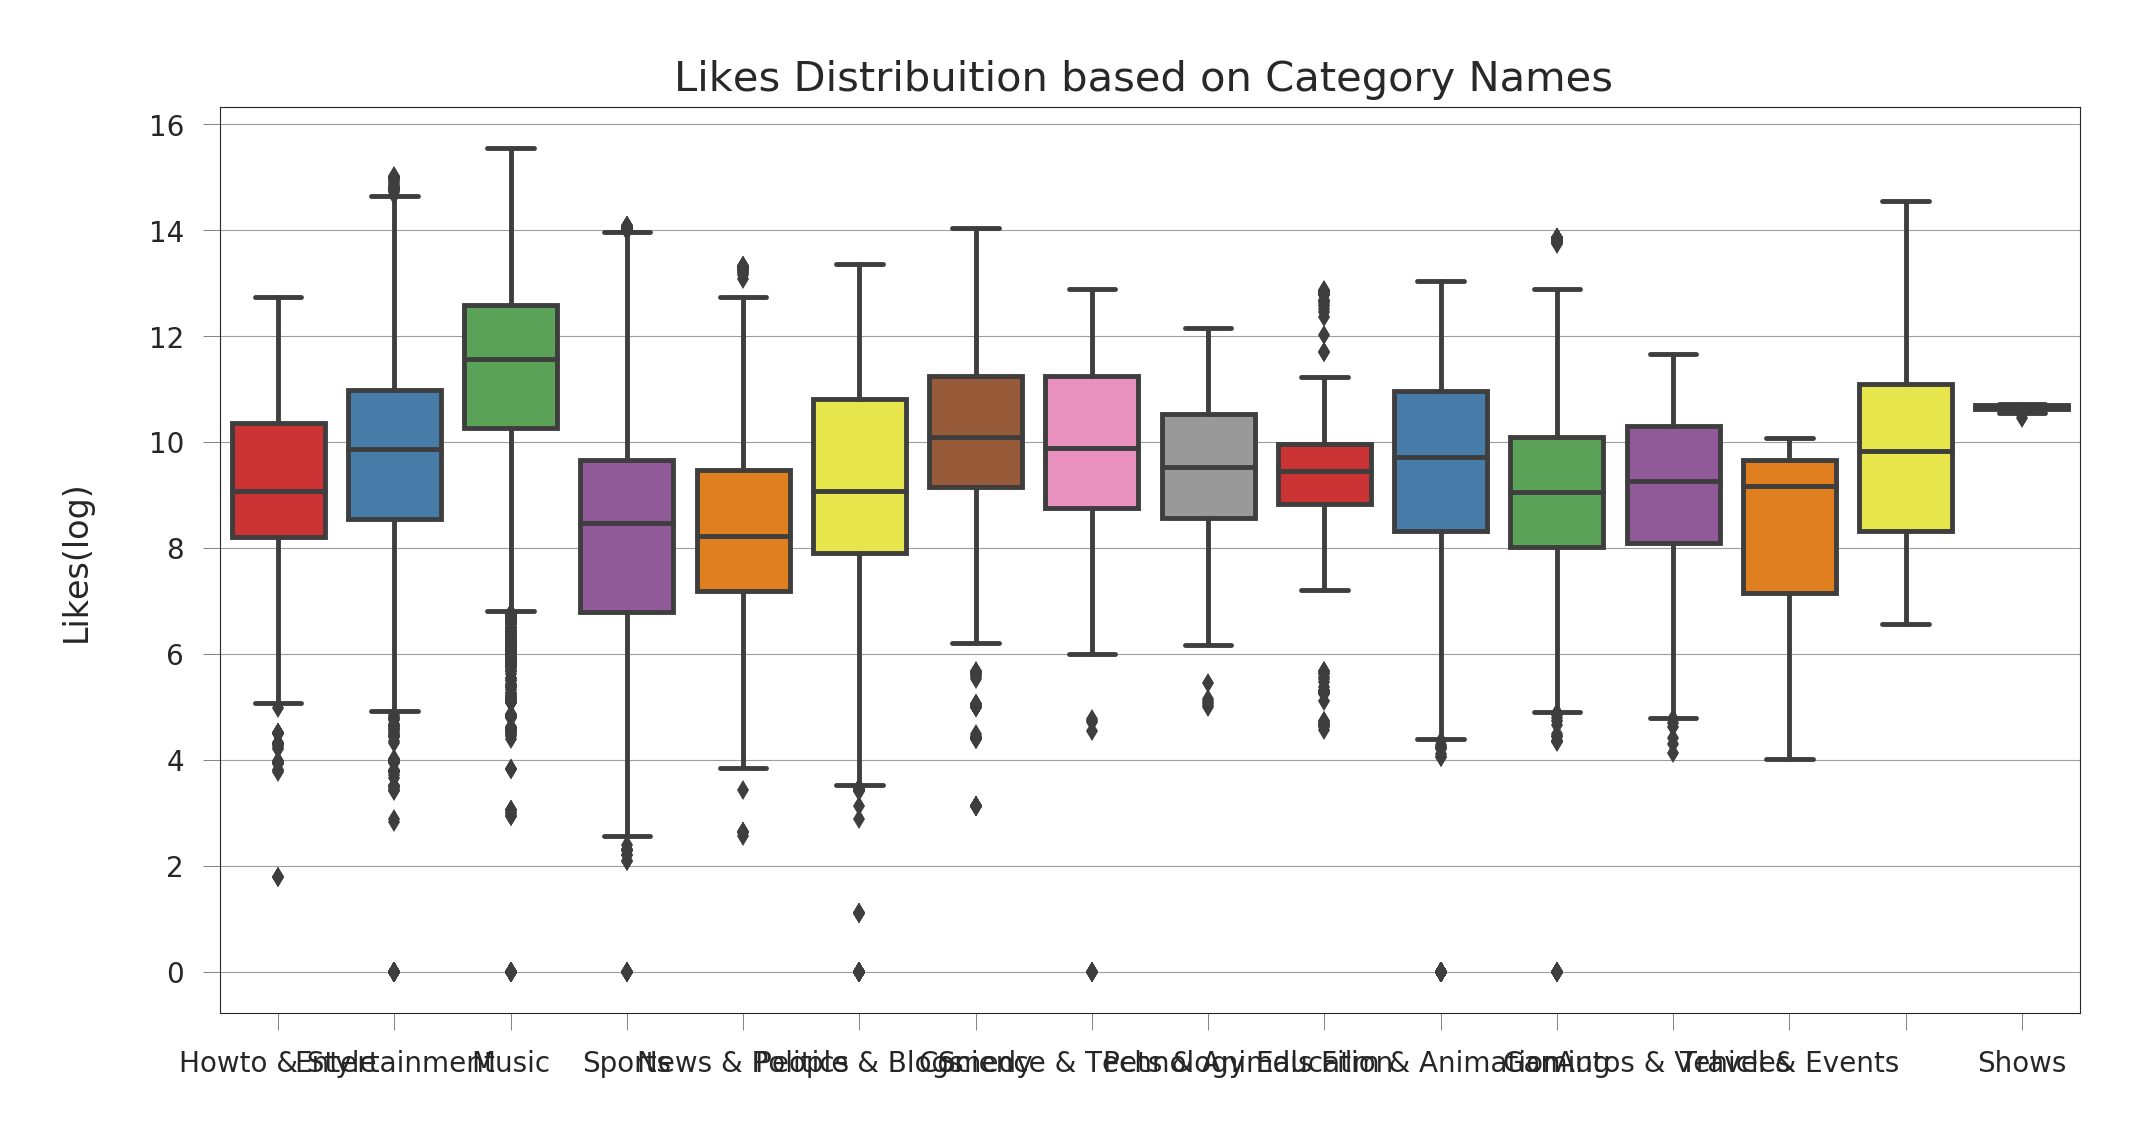

In [73]:
plt.figure(figsize = (12,6))
g2 = sns.boxplot(x='category_name', y='likes_log', data=df, palette="Set1")
g2.set_title("Likes Distribuition based on Category Names ", fontsize=15)
g2.set_xlabel("", fontsize=12)
g2.set_ylabel("Likes(log)", fontsize=12)
plt.show();

In [74]:
df['category_name']

video_id
Jw1Y-zhQURU           Howto & Style
3s1rvMFUweQ           Entertainment
n1WpP7iowLc                   Music
PUTEiSjKwJU                  Sports
rHwDegptbI4         News & Politics
AumaWl0TNBo           Entertainment
2Vv-BfVoq4g                   Music
-N5eucPMTTc          People & Blogs
LMCuKltaY3M                   Music
9t9u_yPEidY                   Music
ONQ-fAp5X64                  Sports
Dlwf5u2BLAg         News & Politics
NVCqz2BDfcQ                   Music
MyEqfBkzESU           Howto & Style
b4vTZx_AtHk           Howto & Style
BsfhHKx6ajA           Entertainment
DIU3xPdhCBI                   Music
pz95u3UVpaM                   Music
jp9hK-jY6yY                  Comedy
gEHCXl4J9Qo           Entertainment
OWvCCu2t6Ts           Howto & Style
6p-QzY5bxJ0           Entertainment
fiusxyygqGk                   Music
QOksZ8VogRw                   Music
lo5ERI5nPbM                   Music
Ja_GMU7-sjs    Science & Technology
_6ViZ13mN9I                  Sports
F62QpaPWXDI        

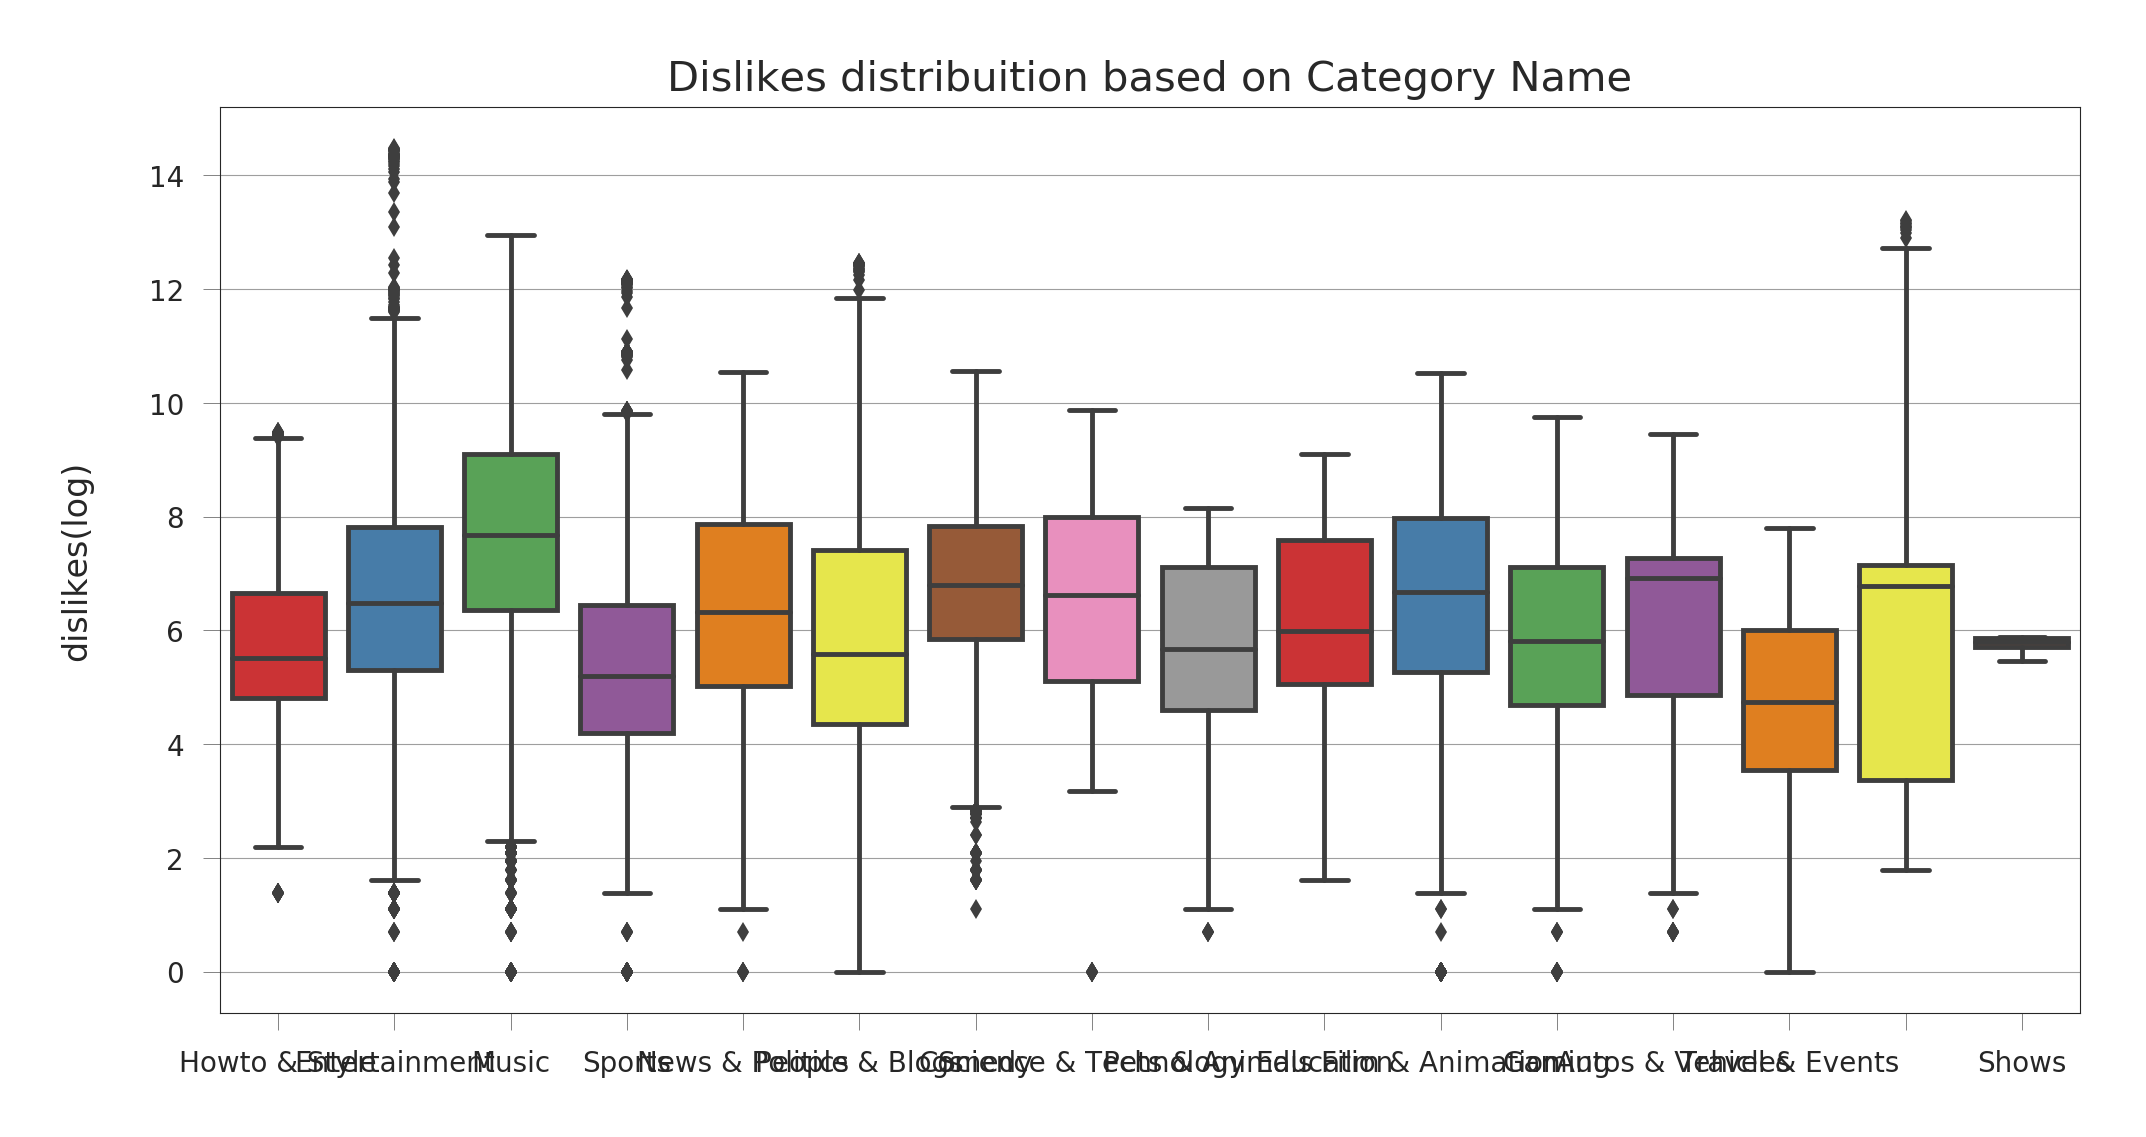

In [75]:
plt.figure(figsize = (12,6))
g3 = sns.boxplot(x='category_name', y='dislikes_log', data=df, palette="Set1")
g3.set_title("Dislikes distribuition based on Category Name", fontsize=15)
g3.set_xlabel("", fontsize=12)
g3.set_ylabel("dislikes(log)", fontsize=12)
plt.show();

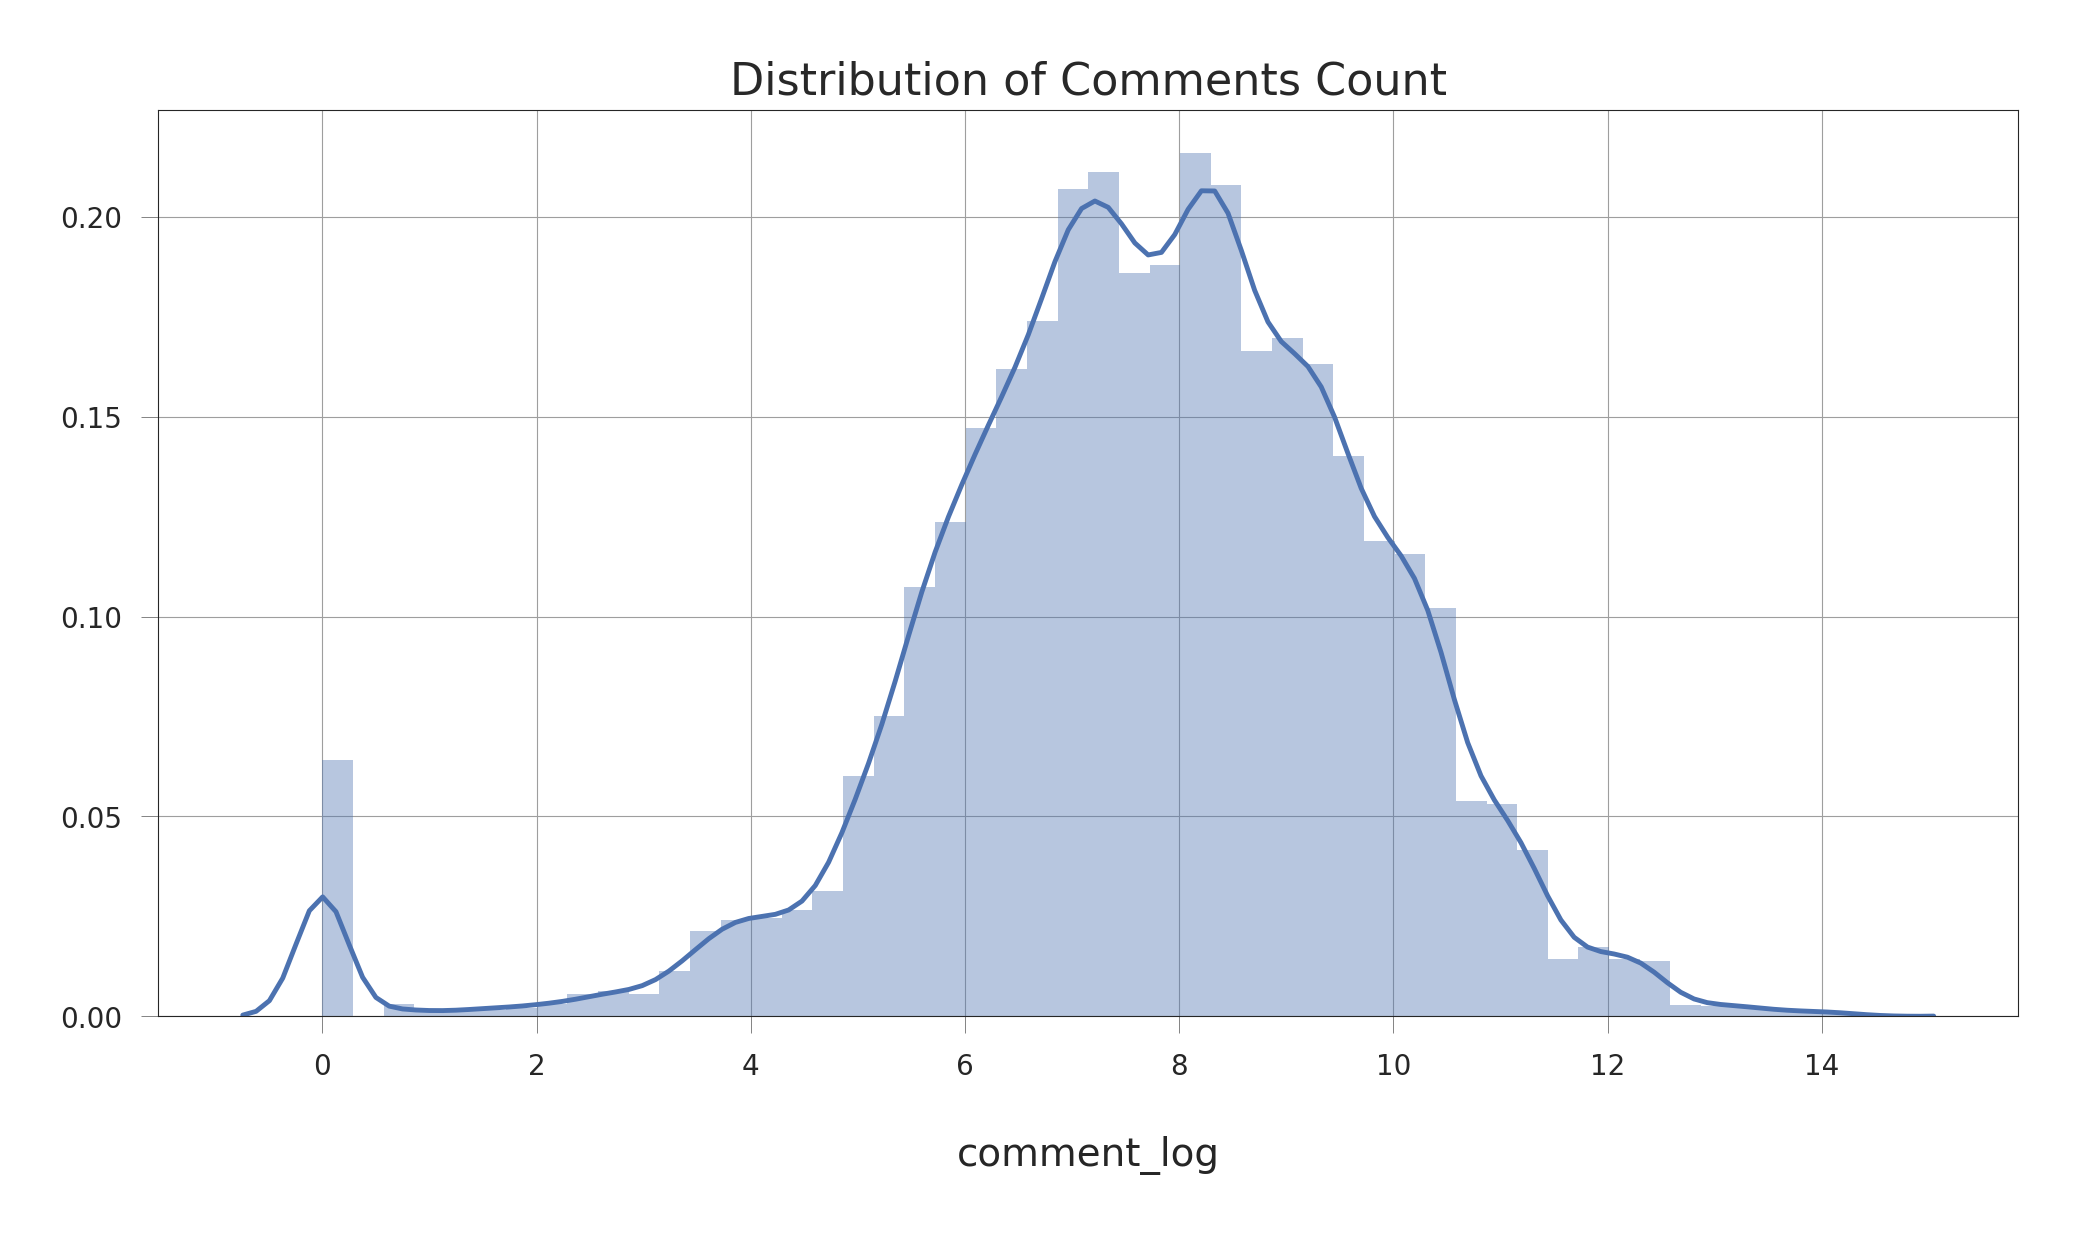

In [76]:
plt.figure(figsize = (12,6))
l4 = sns.distplot(df['comment_log'])
l4.set_title("Distribution of Comments Count", fontsize=16);

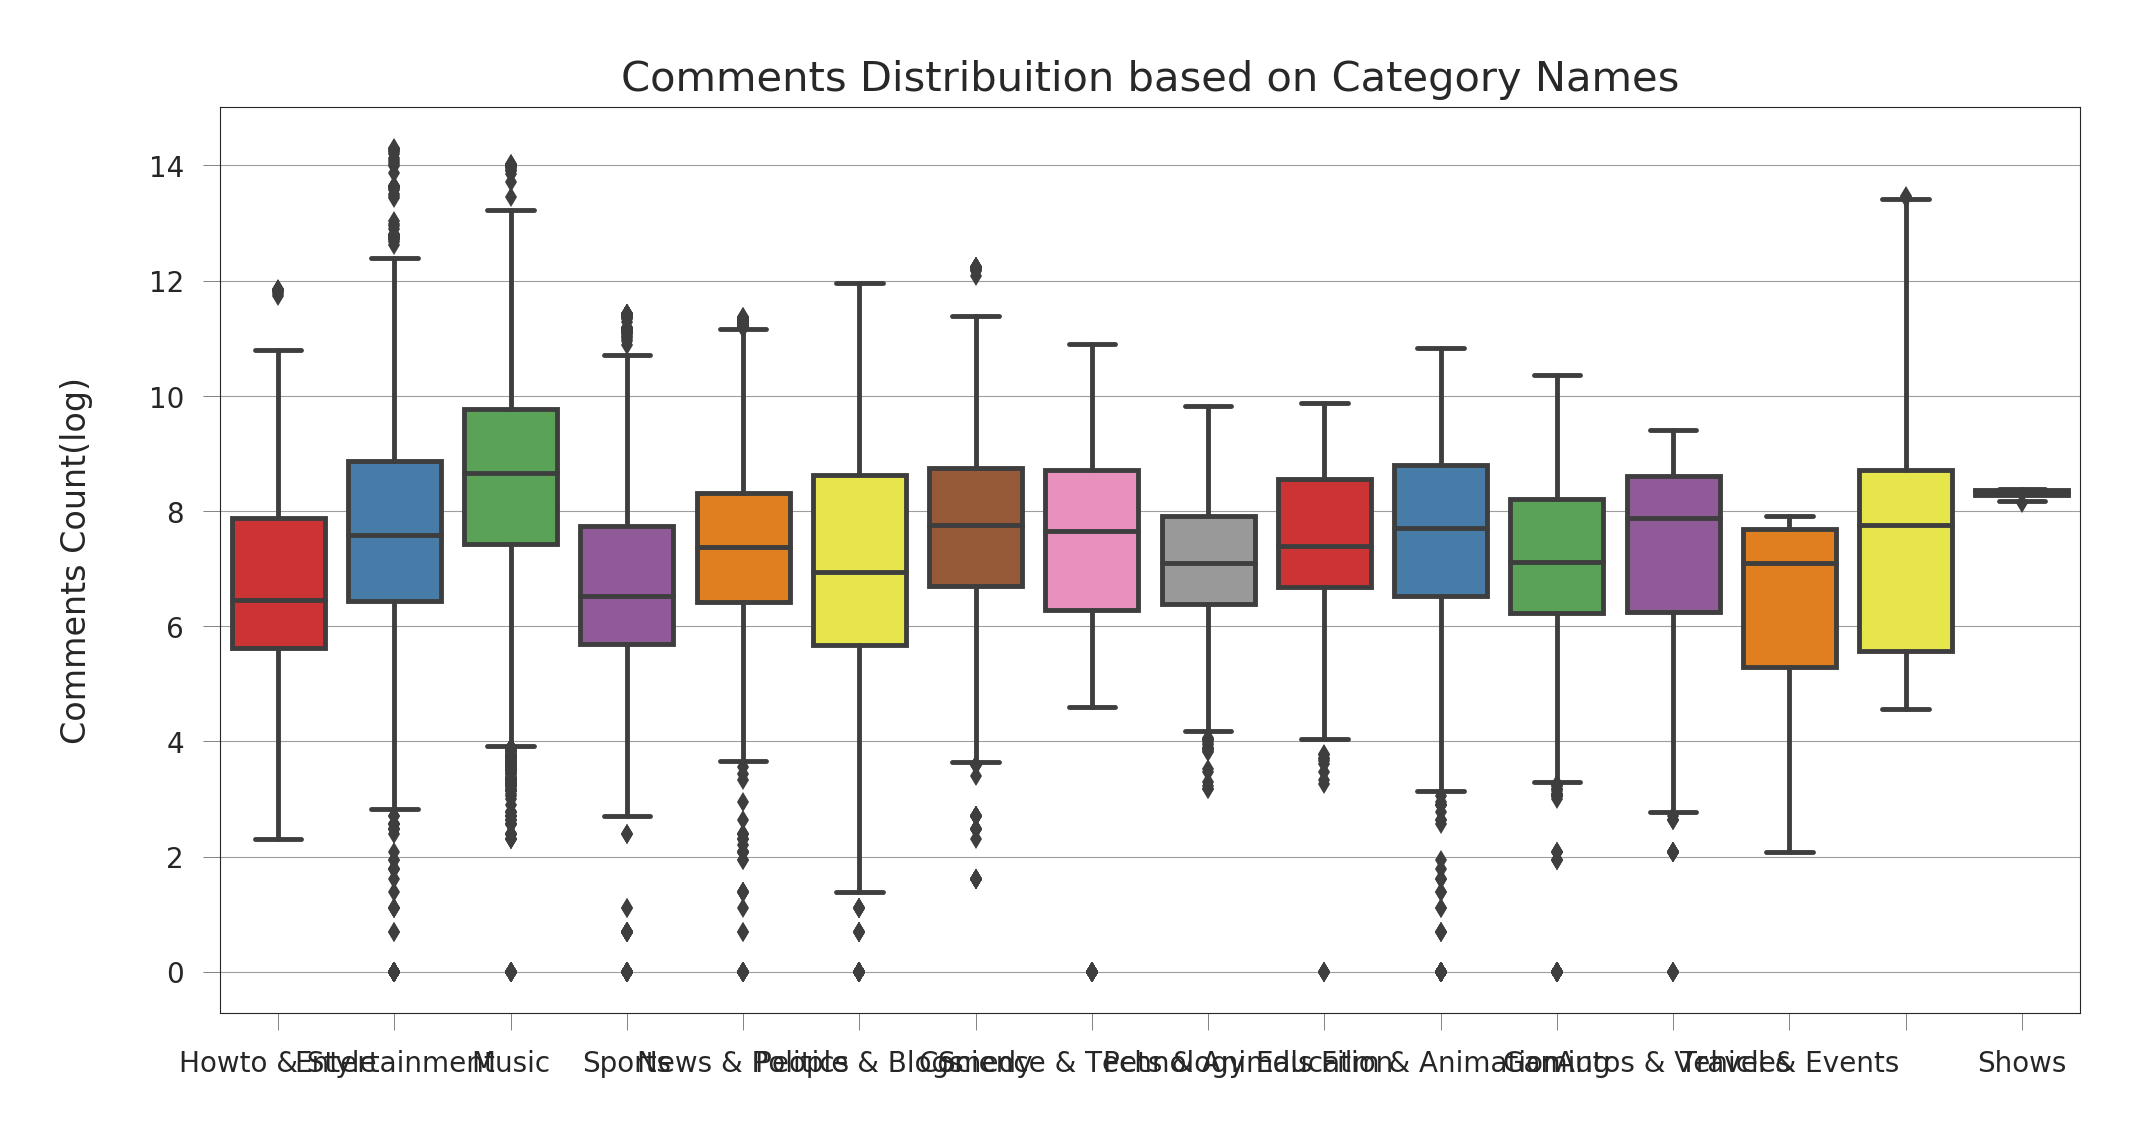

In [77]:
plt.figure(figsize = (12,6))
g4 = sns.boxplot(x='category_name', y='comment_log', data=df, palette="Set1")
g4.set_title("Comments Distribuition based on Category Names", fontsize=15)
g4.set_xlabel("", fontsize=12)
g4.set_ylabel("Comments Count(log)", fontsize=12)
plt.show();

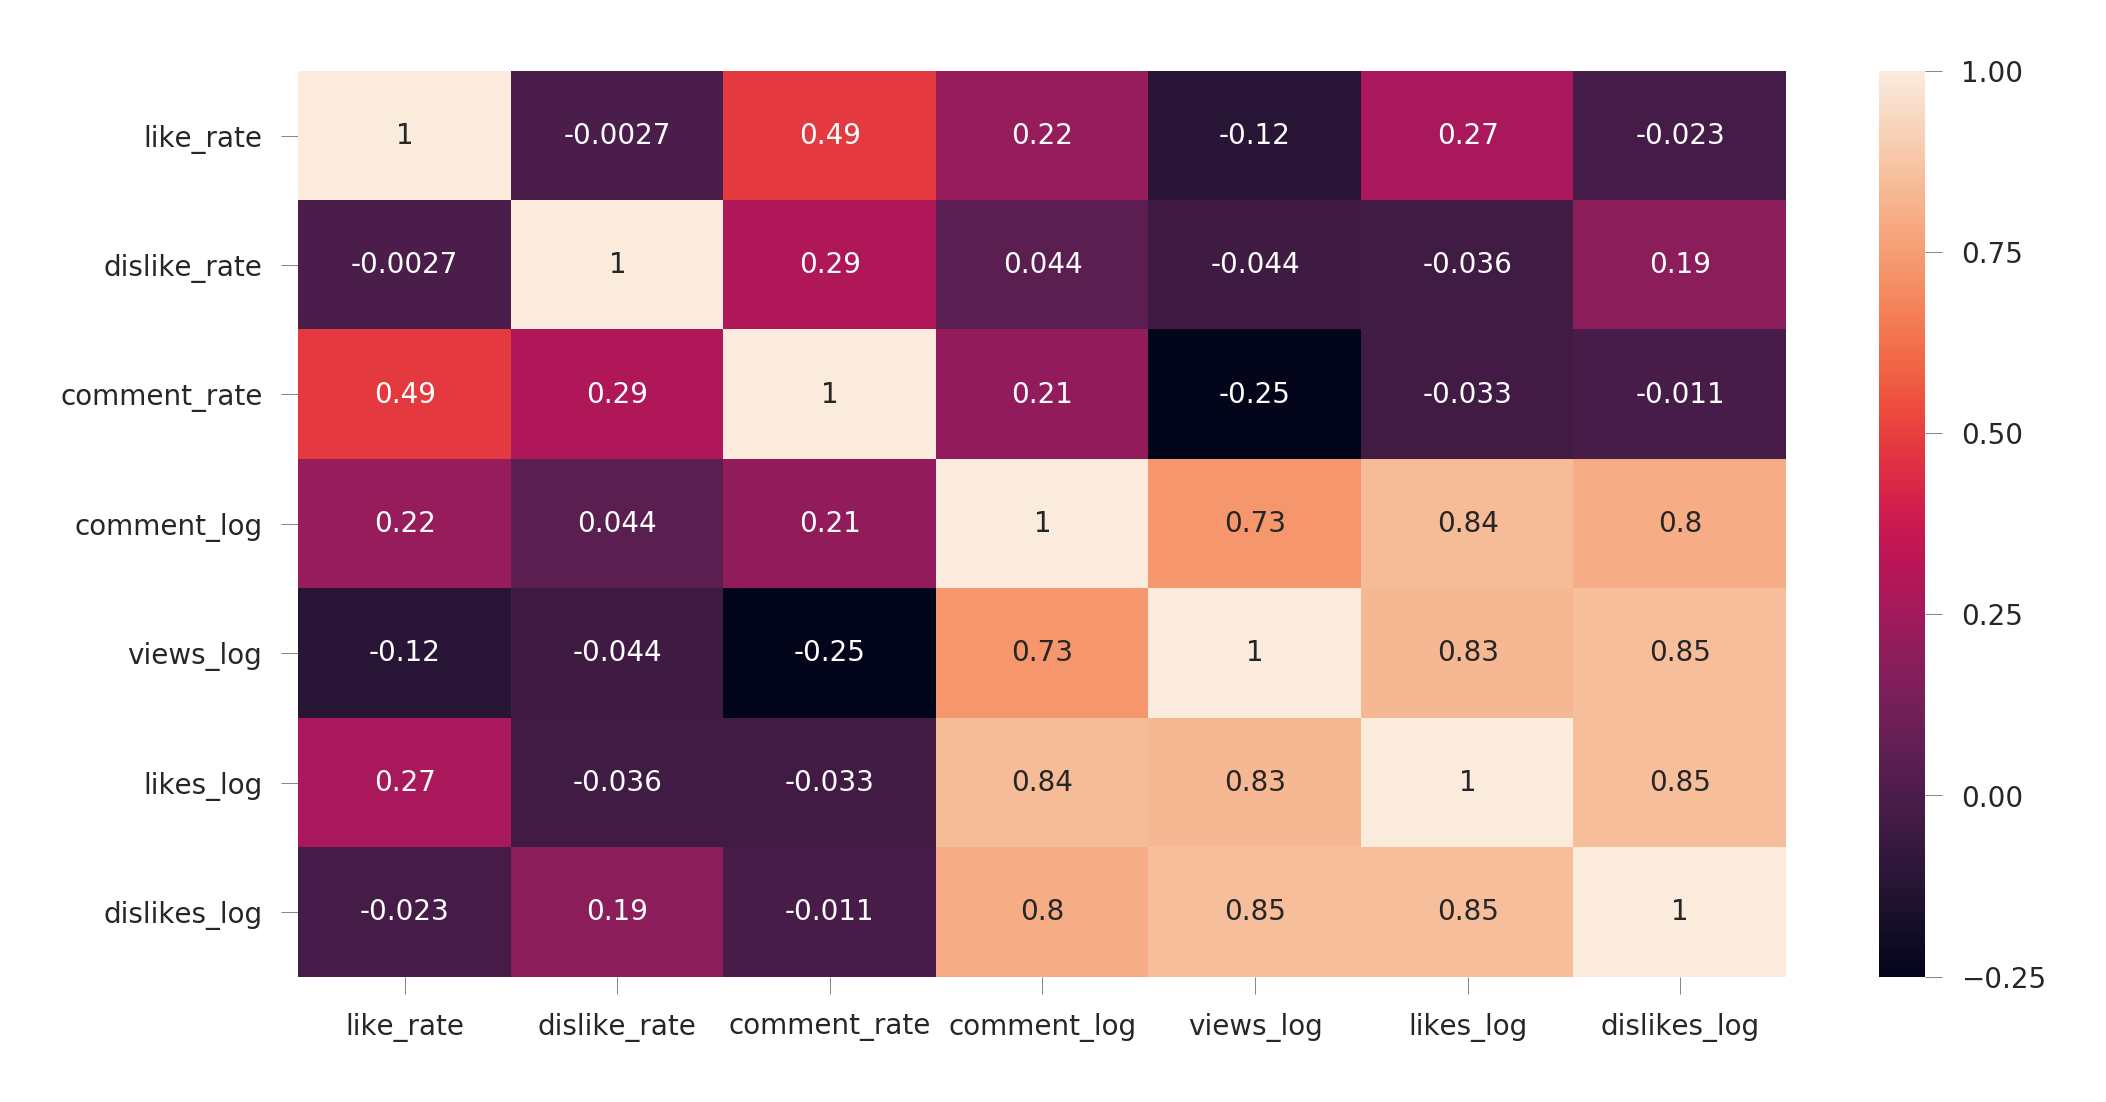

In [78]:
plt.figure(figsize = (12,6))

sns.heatmap(df[['like_rate', 'dislike_rate', 'comment_rate', 'comment_log','views_log','likes_log','dislikes_log', "category_name"]].corr(), annot=True)
plt.show();

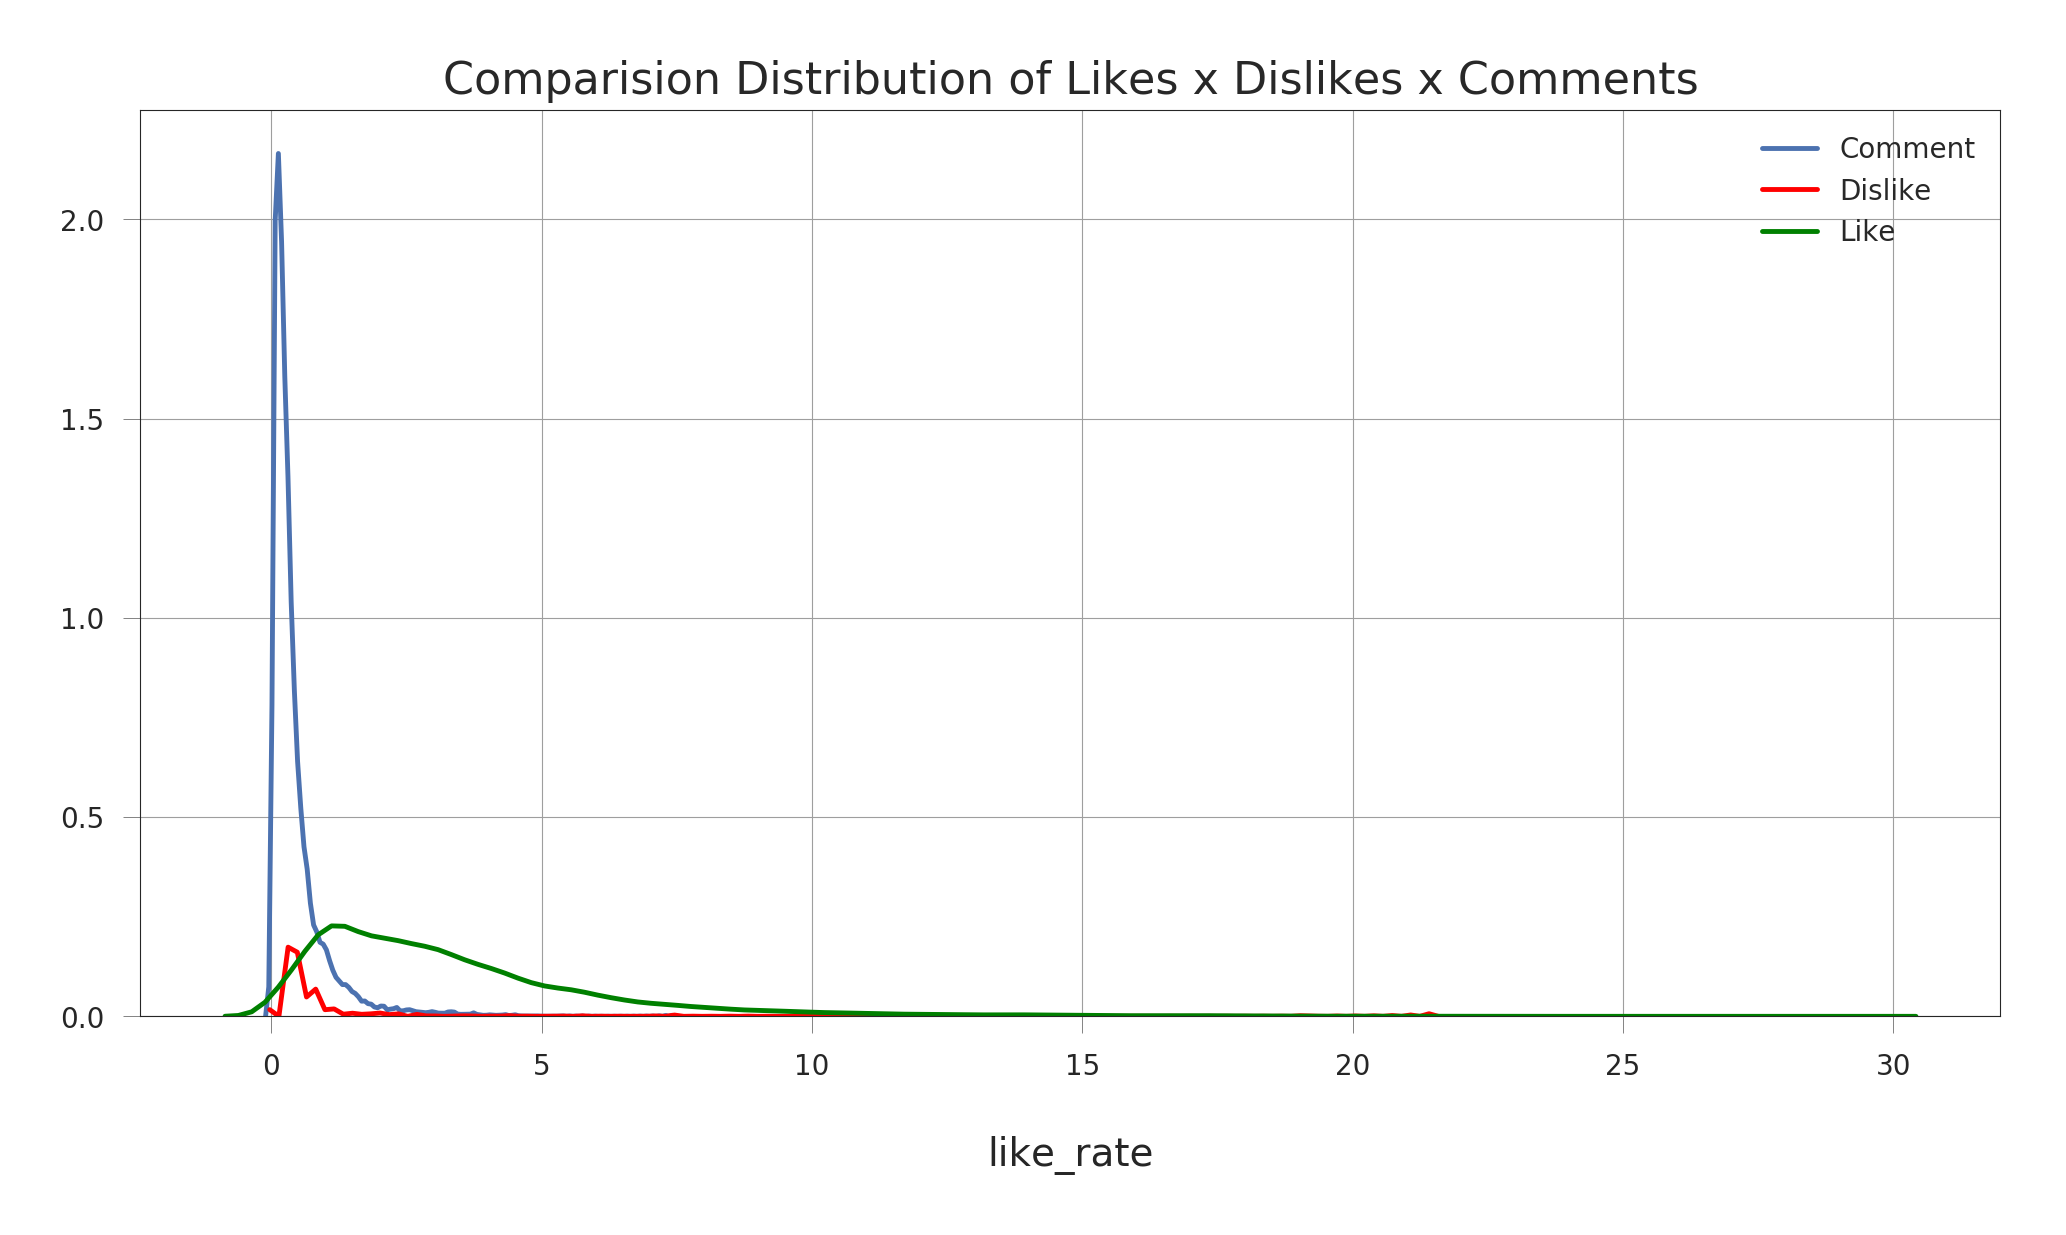

In [79]:
plt.figure(figsize=(12,6))
c1 = sns.distplot(df['comment_rate'],hist=False,label="Comment")
c1 = sns.distplot(df['dislike_rate'], color='red',hist=False, label="Dislike")
c1 = sns.distplot(df['like_rate'], color='green',hist=False, label="Like")

c1.set_title('Comparision Distribution of Likes x Dislikes x Comments', fontsize=16)
plt.legend()
plt.show();

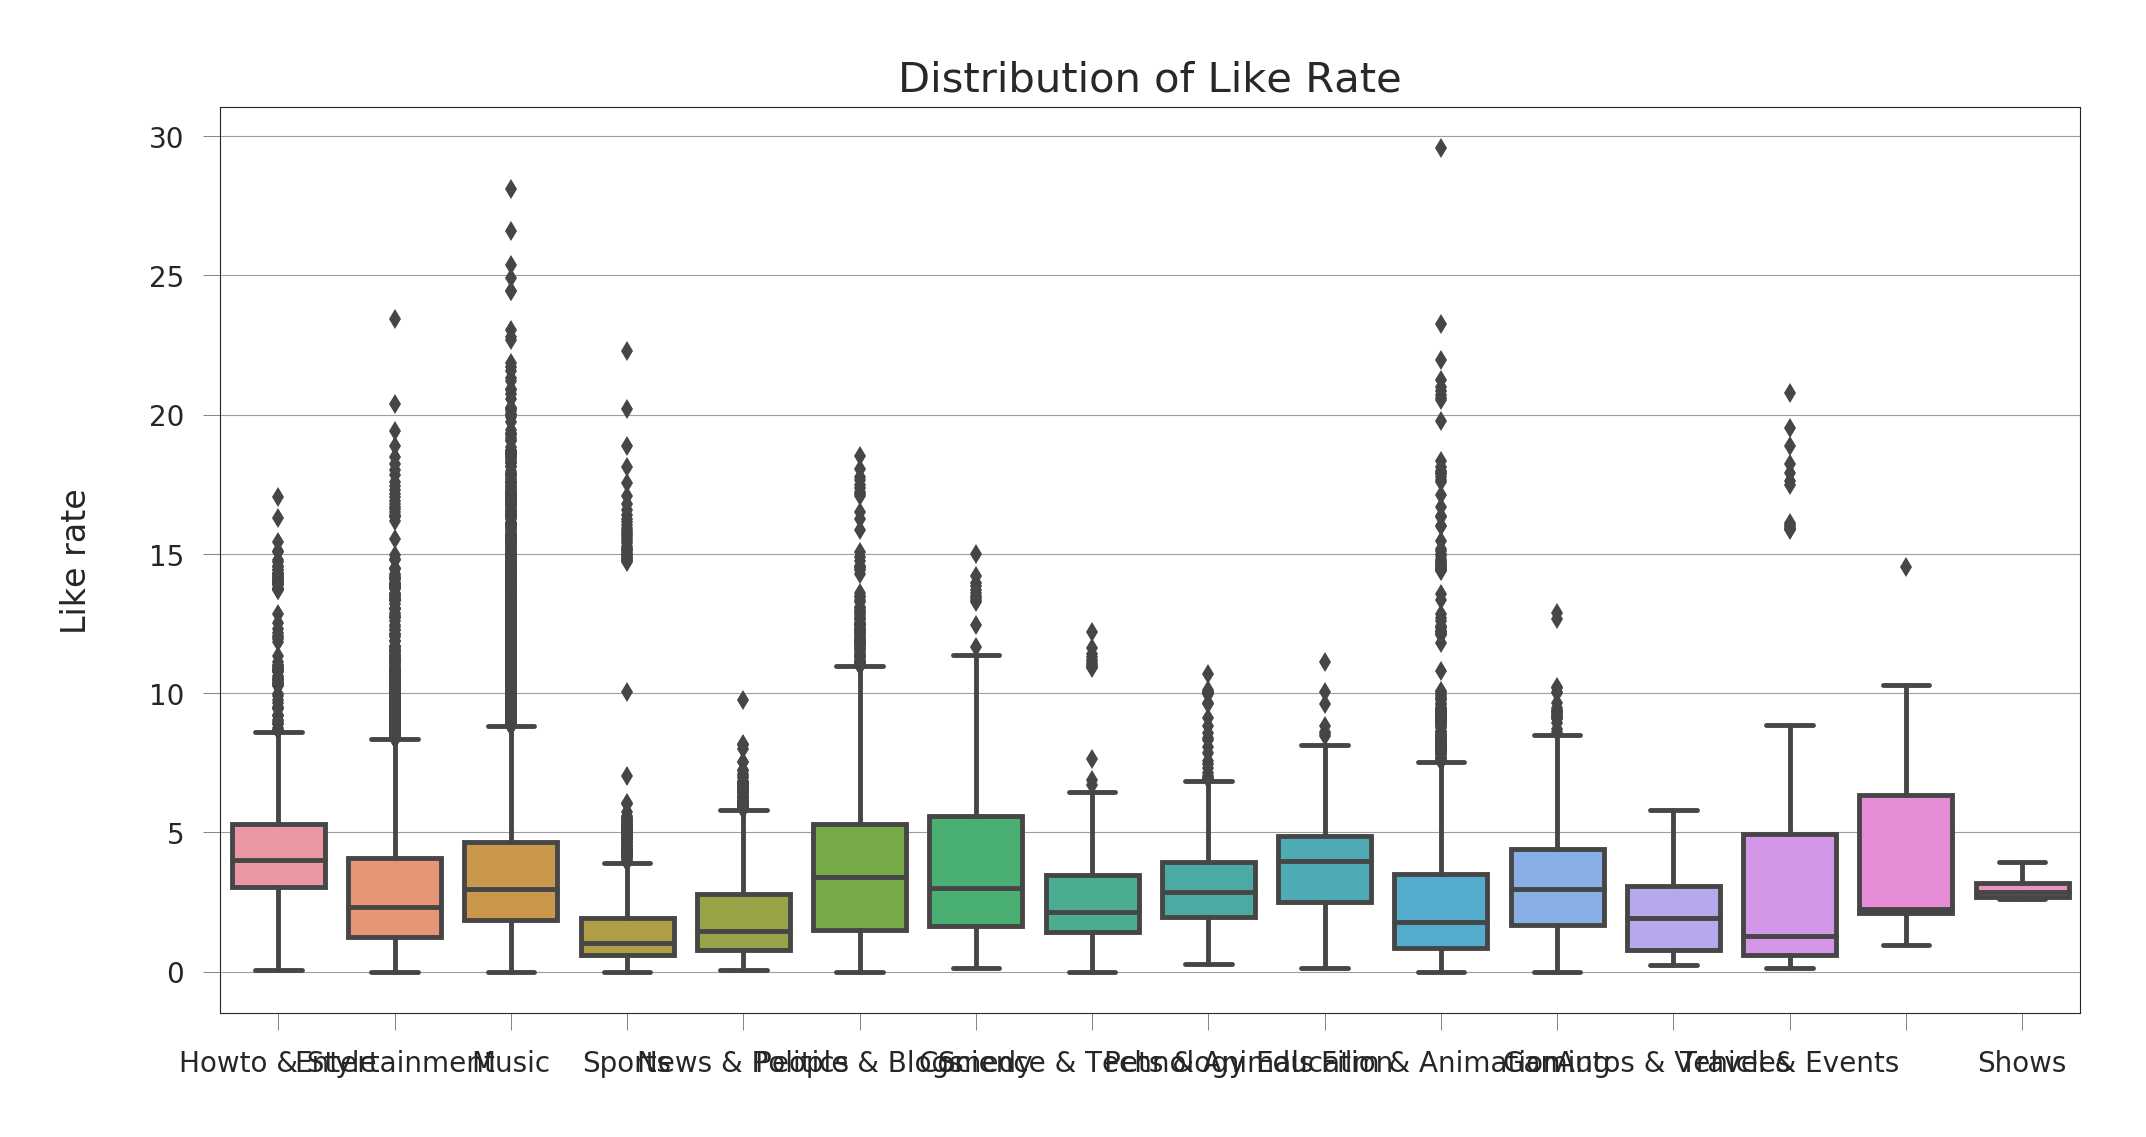

In [80]:
plt.figure(figsize = (12,6))

r1= sns.boxplot(x='category_name',y='like_rate',  data=df)
r1.set_title("Distribution of Like Rate", fontsize=15)
r1.set_xlabel("", fontsize=12)
r1.set_ylabel("Like rate", fontsize=12);


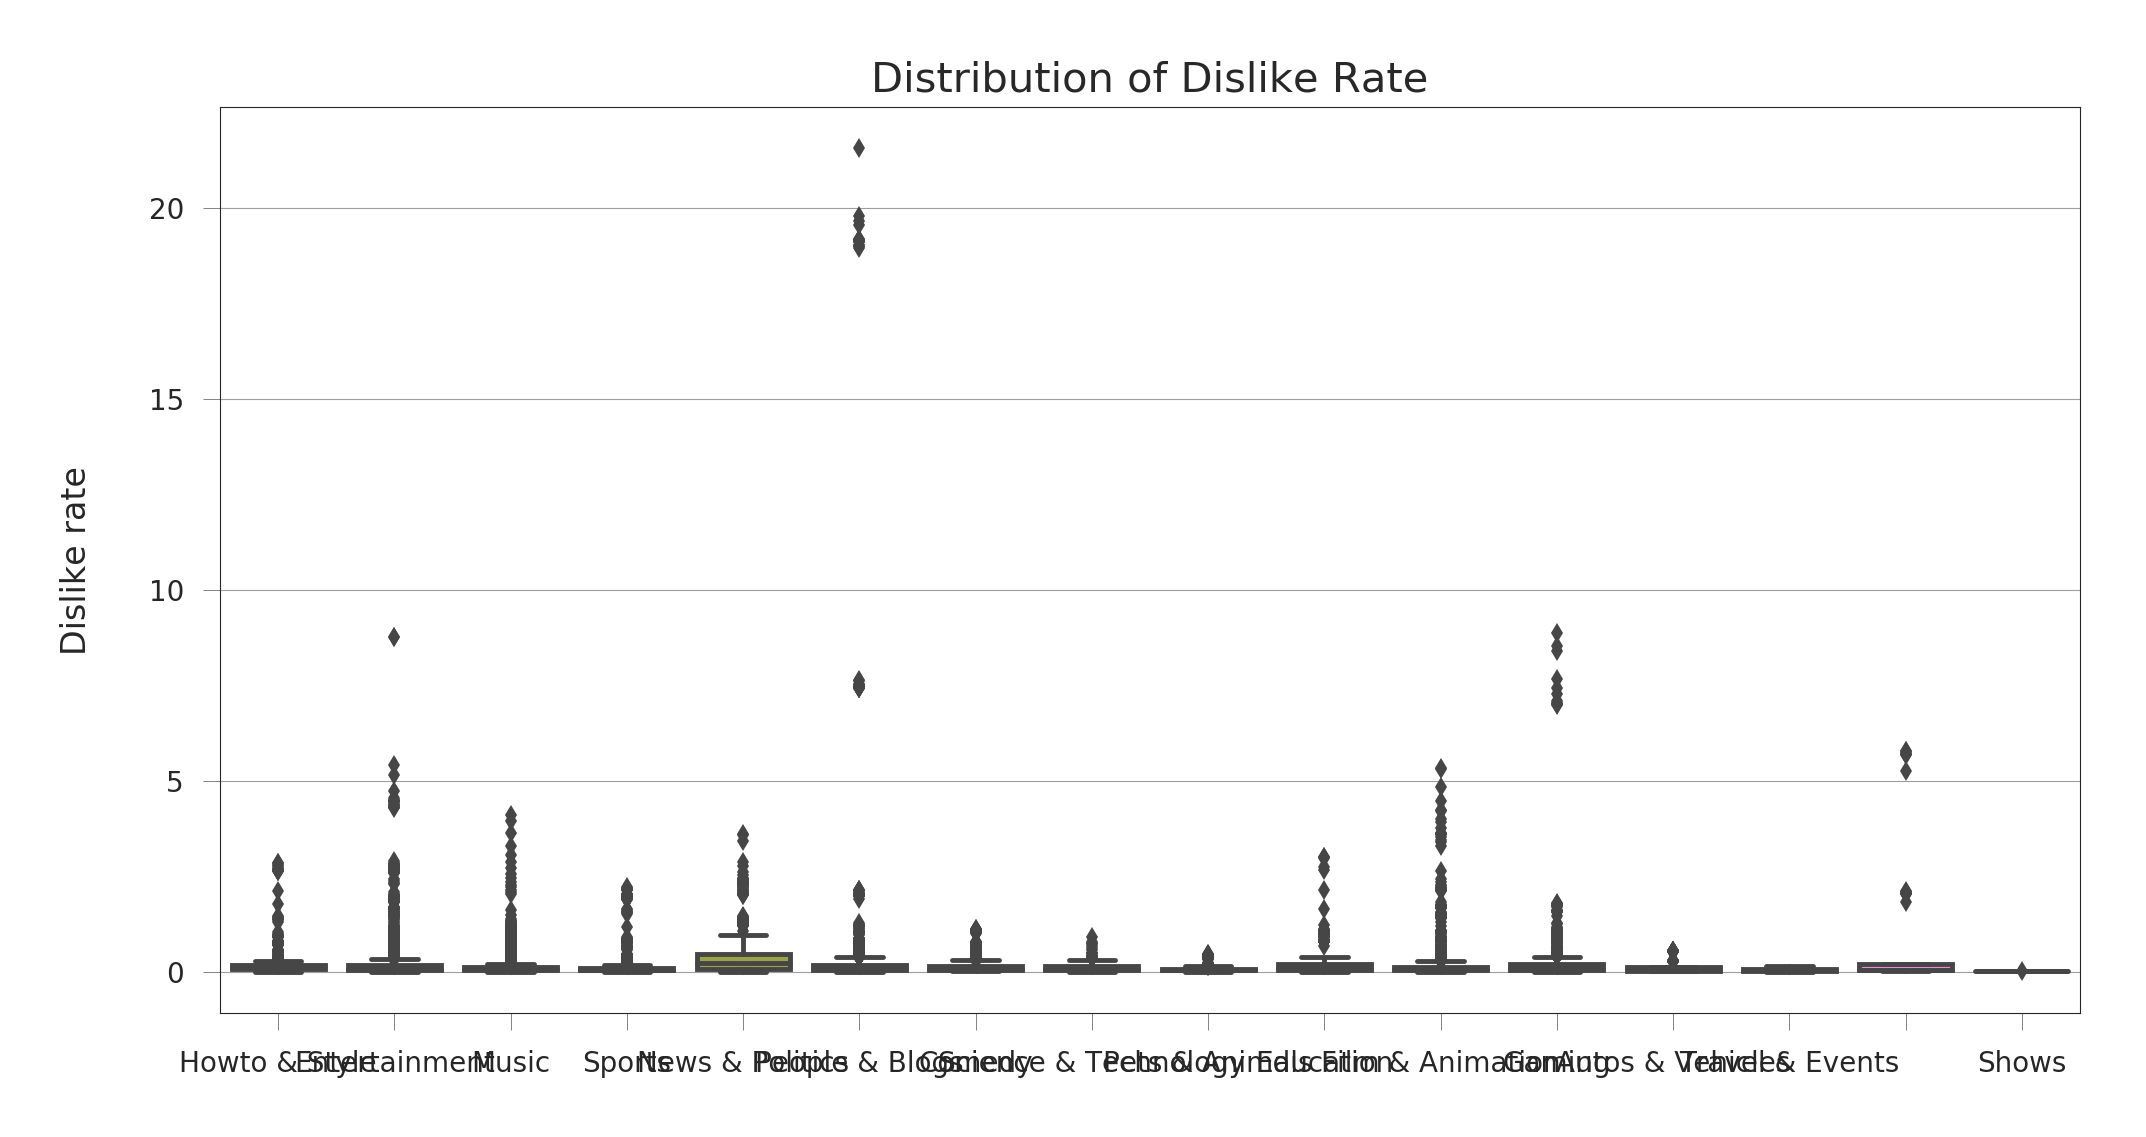

In [81]:
plt.figure(figsize=(12,6))

r2= sns.boxplot(y='dislike_rate', x='category_name', data=df)
r2.set_title("Distribution of Dislike Rate", fontsize=15)
r2.set_xlabel("", fontsize=12)
r2.set_ylabel("Dislike rate", fontsize=12);

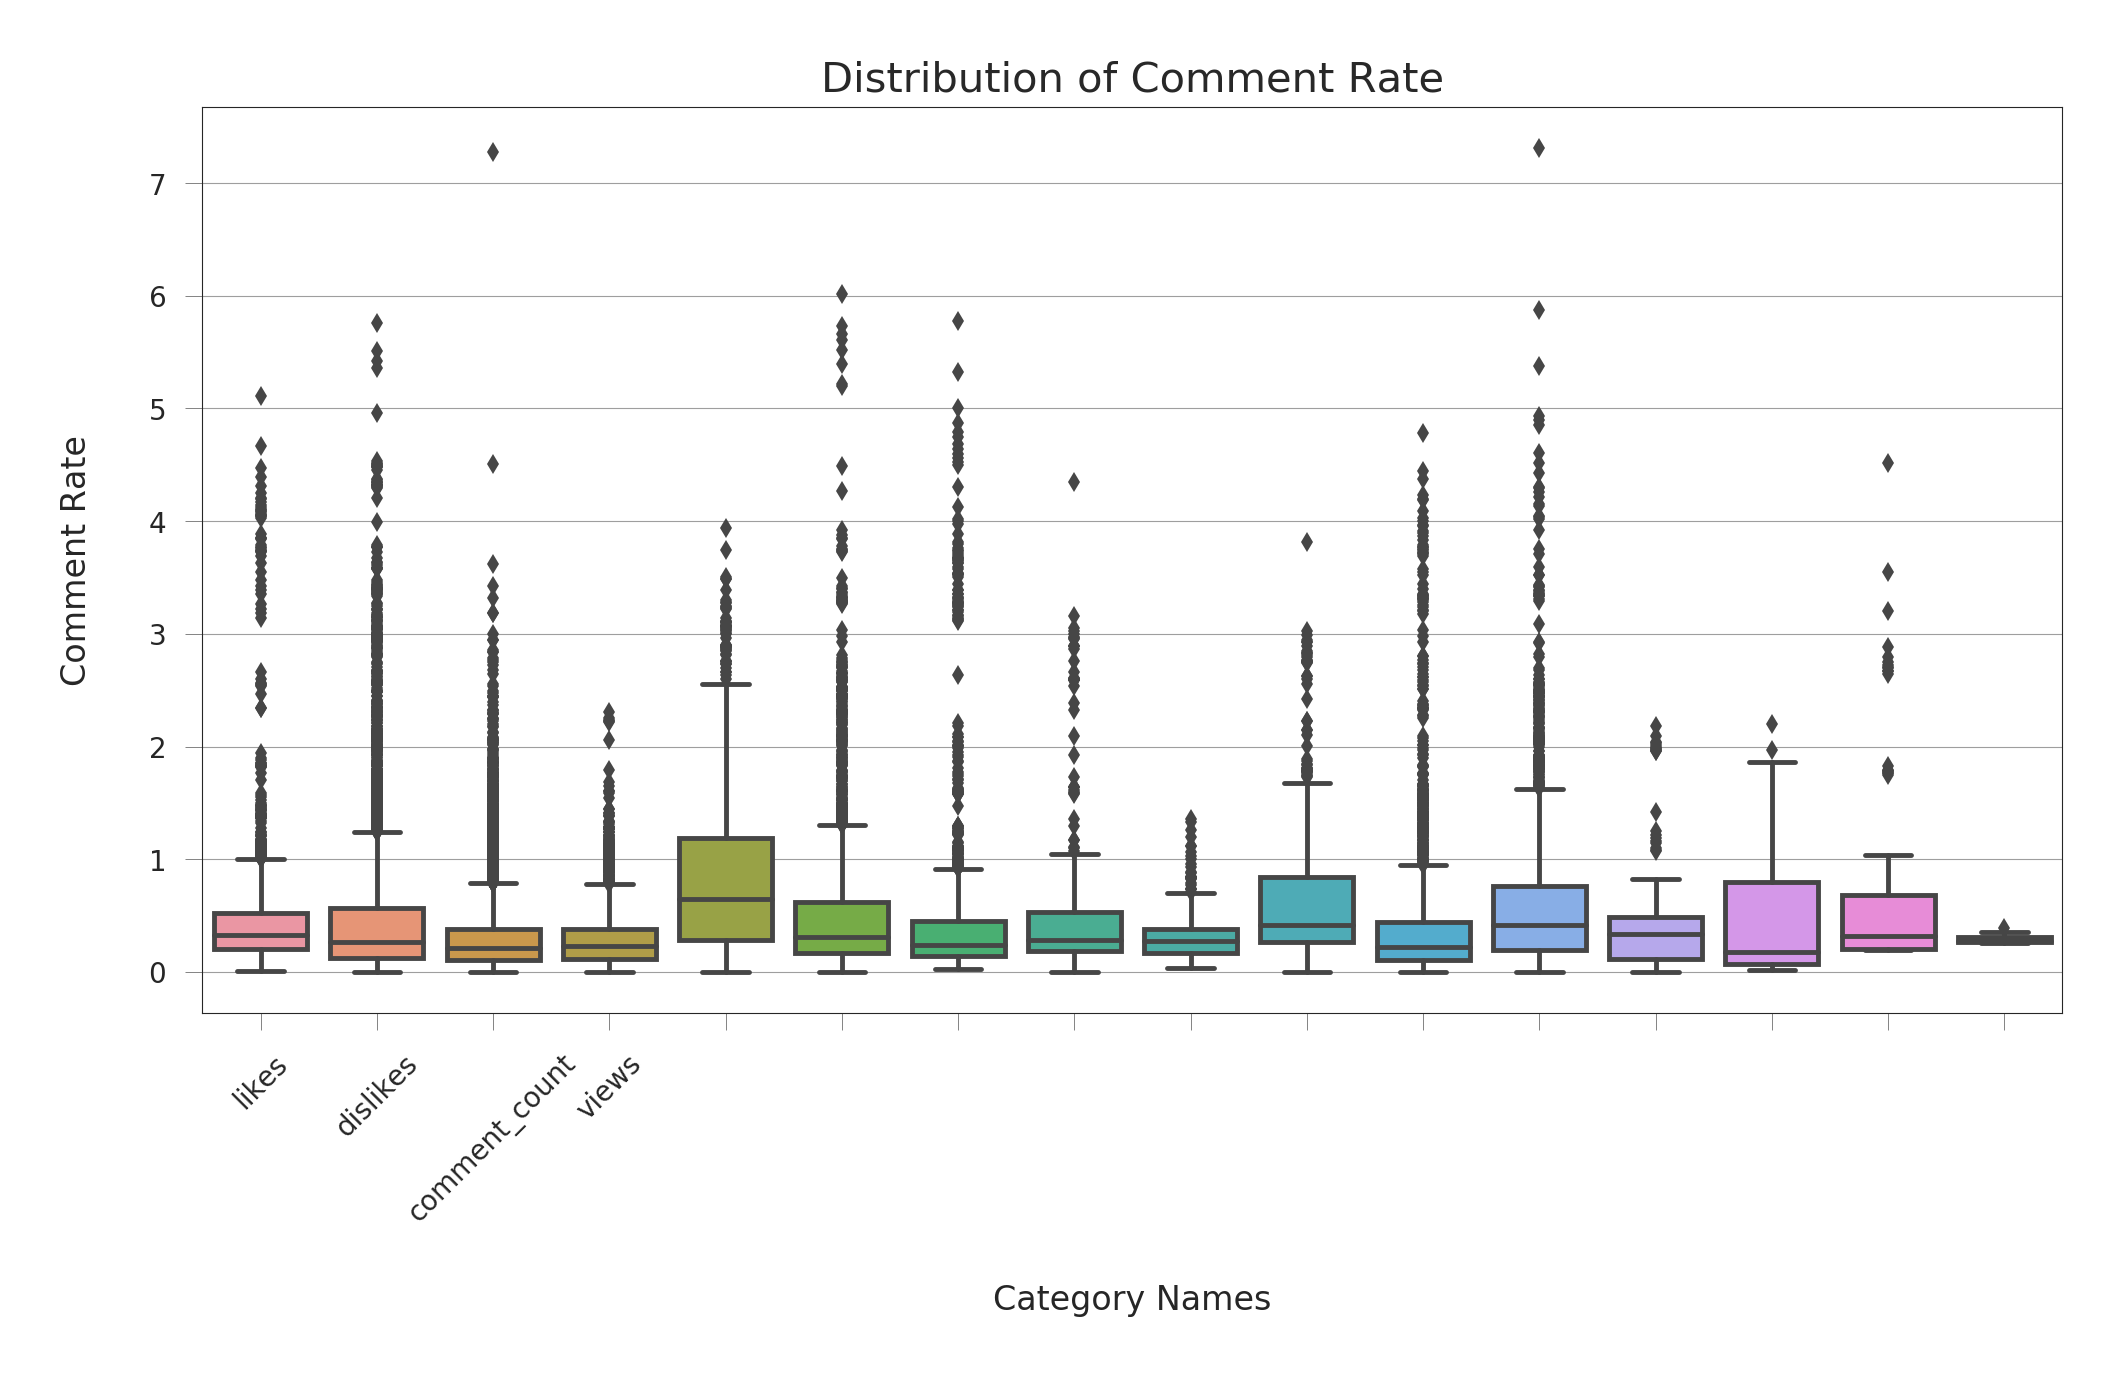

In [82]:
plt.figure(figsize=(12,6))

r3= sns.boxplot(y='comment_rate', x='category_name', data=df)
r3.set_xticklabels(g.get_xticklabels(),rotation=45)
r3.set_title("Distribution of Comment Rate", fontsize=15)
r3.set_xlabel("Category Names", fontsize=12)
r3.set_ylabel("Comment Rate", fontsize=12);

In [83]:
df.corr()

views  likes  dislikes  comment_count  \
views                    1.00   0.80      0.39           0.47   
likes                    0.80   1.00      0.45           0.74   
dislikes                 0.39   0.45      1.00           0.77   
comment_count            0.47   0.74      0.77           1.00   
comments_disabled       -0.01  -0.04     -0.01          -0.03   
ratings_disabled         0.01  -0.03     -0.01          -0.02   
video_error_or_removed   0.01   0.01      0.01           0.00   
likes_log                0.41   0.53      0.21           0.36   
views_log                0.53   0.56      0.24           0.36   
dislikes_log             0.45   0.52      0.31           0.40   
comment_log              0.37   0.51      0.24           0.41   
like_rate               -0.12   0.08     -0.03           0.09   
dislike_rate            -0.02  -0.00      0.23           0.12   
comment_rate            -0.12  -0.00      0.08           0.17   

                        comments_disabled  ratings_disabled  \
views                               -0.01              0.01   
likes                               -0.04             -0.03   
dislikes                            -0.01             -0.01   
comment_count                       -0.03             -0.02   
comments_disabled                    1.00              0.51   
ratings_disabled                     0.51              1.00   
video_error_or_removed              -0.01             -0.00   
likes_log                           -0.23             -0.38   
views_log                            0.00              0.01   
dislikes_log                        -0.12             -0.26   
comment_log                         -0.48             -0.27   
like_rate                           -0.11             -0.10   
dislike_rate                         0.06             -0.02   
comment_rate                        -0.10             -0.06   

                        video_error_or_removed  likes_log  views_log  \
views                                     0.01       0.41       0.53   
likes                                     0.01       0.53       0.56   
dislikes                                  0.01       0.21       0.24   
comment_count                             0.00       0.36       0.36   
comments_disabled                        -0.01      -0.23       0.00   
ratings_disabled                         -0.00      -0.38       0.01   
video_error_or_removed                    1.00       0.02       0.03   
likes_log                                 0.02       1.00       0.83   
views_log                                 0.03       0.83       1.00   
dislikes_log                              0.02       0.85       0.85   
comment_log                               0.00       0.84       0.73   
like_rate                                -0.01       0.27      -0.12   
dislike_rate                             -0.00      -0.04      -0.04   
comment_rate                             -0.02      -0.03      -0.25   

                        dislikes_log  comment_log  like_rate  dislike_rate  \
views                           0.45         0.37      -0.12         -0.02   
likes                           0.52         0.51       0.08         -0.00   
dislikes                        0.31         0.24      -0.03          0.23   
comment_count                   0.40         0.41       0.09          0.12   
comments_disabled              -0.12        -0.48      -0.11          0.06   
ratings_disabled               -0.26        -0.27      -0.10         -0.02   
video_error_or_removed          0.02         0.00      -0.01         -0.00   
likes_log                       0.85         0.84       0.27         -0.04   
views_log                       0.85         0.73      -0.12         -0.04   
dislikes_log                    1.00         0.80      -0.02          0.19   
comment_log                     0.80         1.00       0.22          0.04   
like_rate                      -0.02         0.22       1.00         -0.00   
dislike

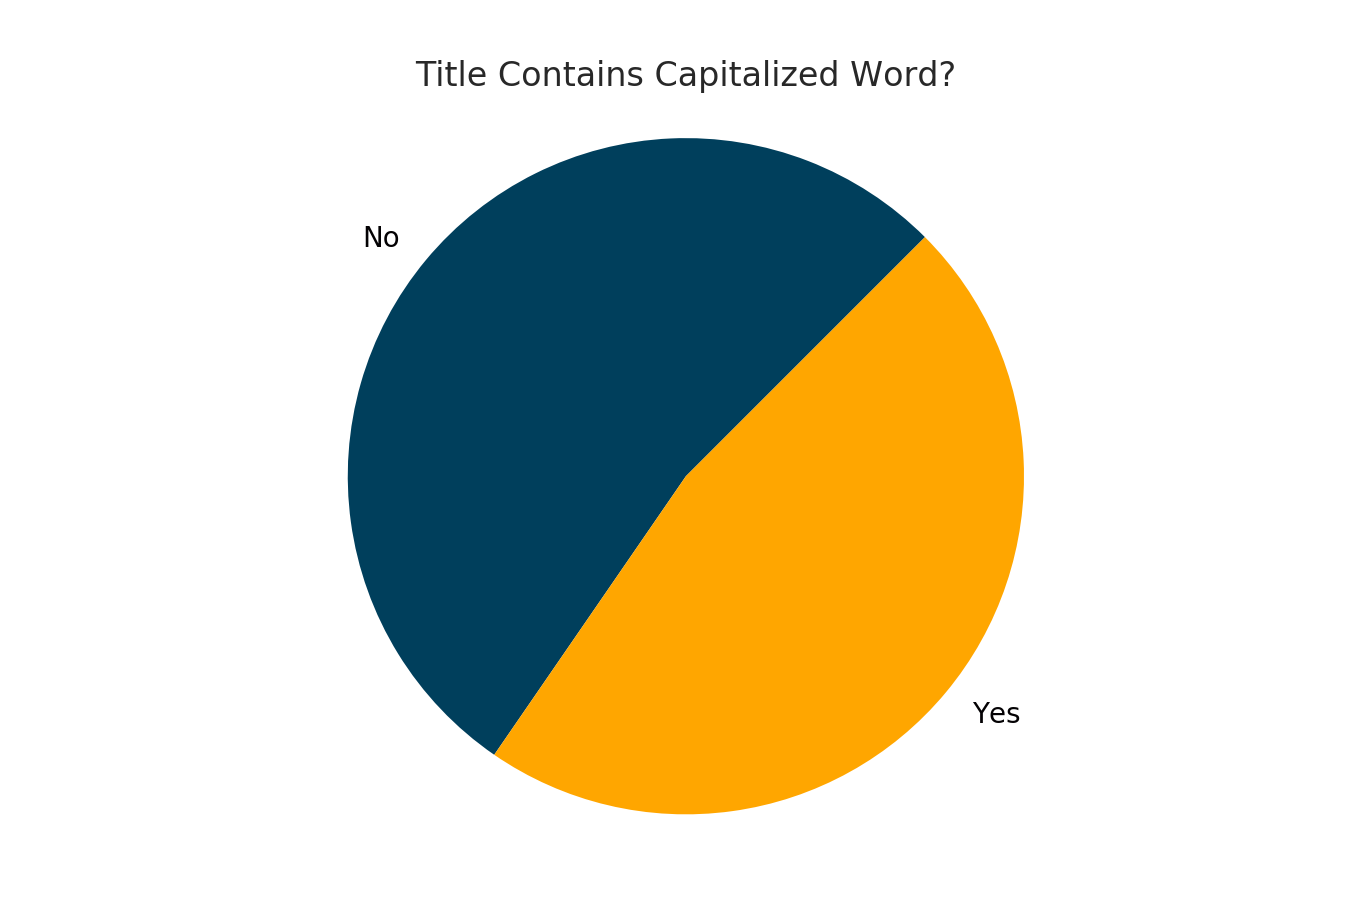

In [84]:
def contains_capitalized_word(s):
    for w in s.split():
        if w.isupper():
            return True
    return False


df["contains_capitalized"] = df["title"].apply(contains_capitalized_word)

value_counts = df["contains_capitalized"].value_counts().to_dict()
fig, ax = plt.subplots()
ax.pie([value_counts[False], value_counts[True]], labels=['No', 'Yes'], colors=['#003f5c', '#ffa600'], textprops={'color': '#040204'}, startangle=45)
ax.axis('equal')
ax.set_title('Title Contains Capitalized Word?');

In [85]:
df["contains_capitalized"].value_counts(normalize=True)

False   0.53
True    0.47
Name: contains_capitalized, dtype: float64

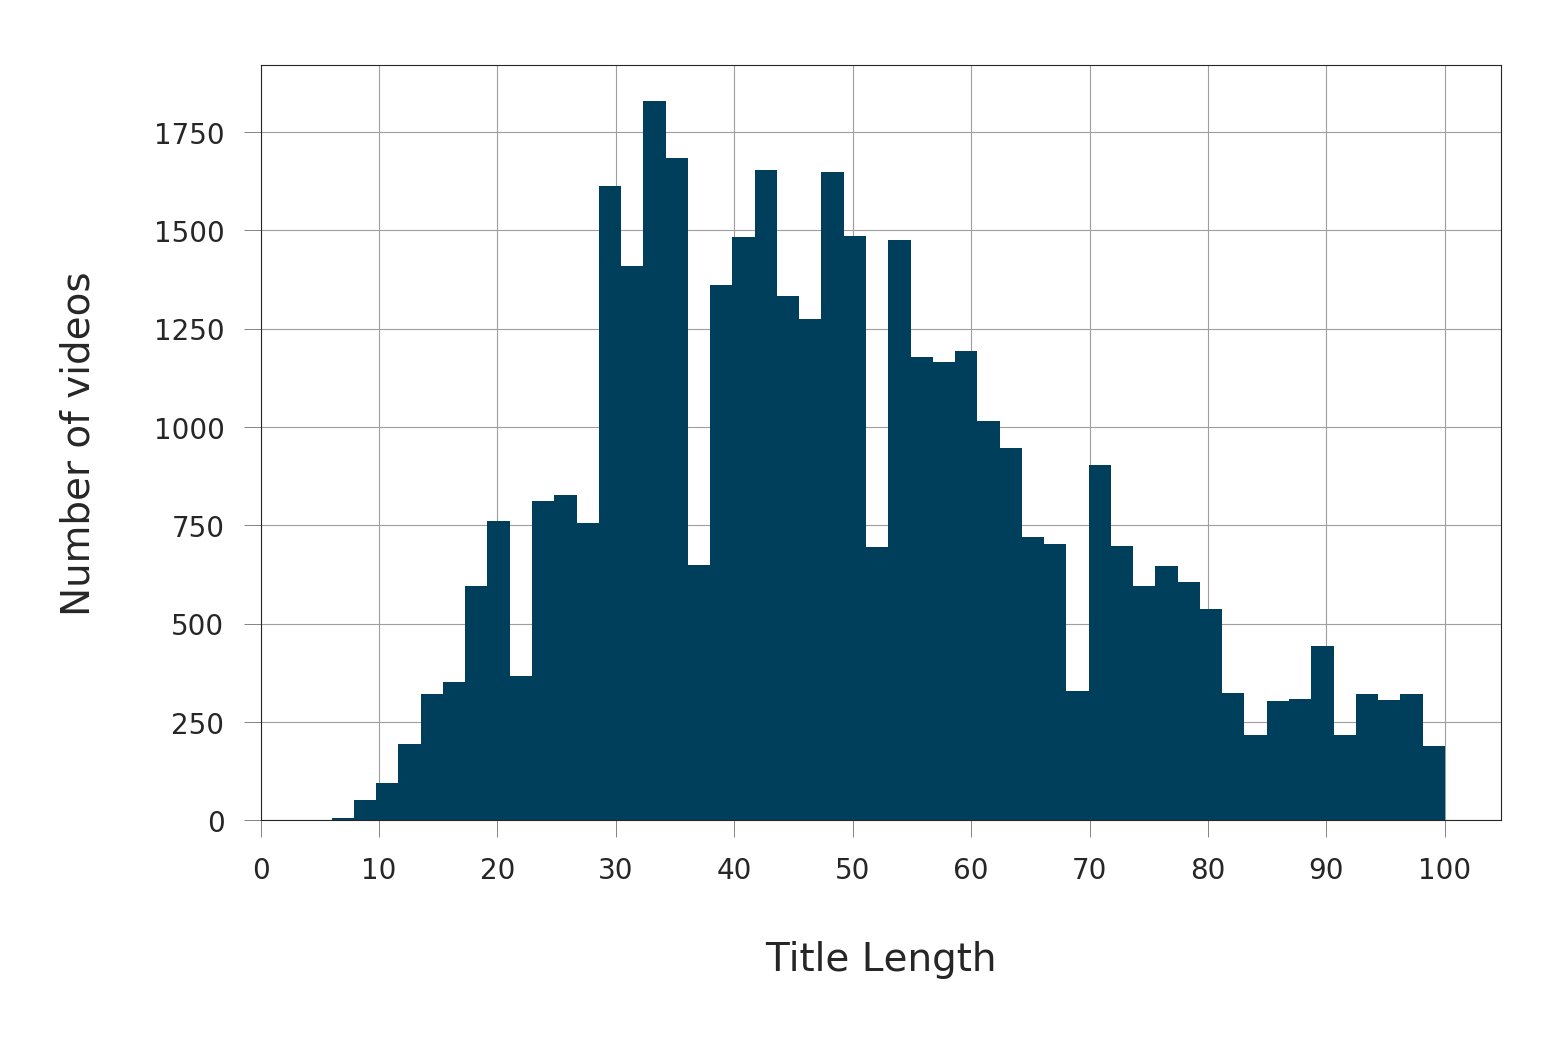

In [86]:
df["title_length"] = df["title"].apply(lambda x: len(x))

fig, ax = plt.subplots()
sns.distplot(df["title_length"], kde=False, rug=False, color=PLOT_COLORS[4], hist_kws={'alpha': 1}, ax=ax)
ax.set(xlabel="Title Length", ylabel="Number of videos", xticks=range(0, 110, 10));

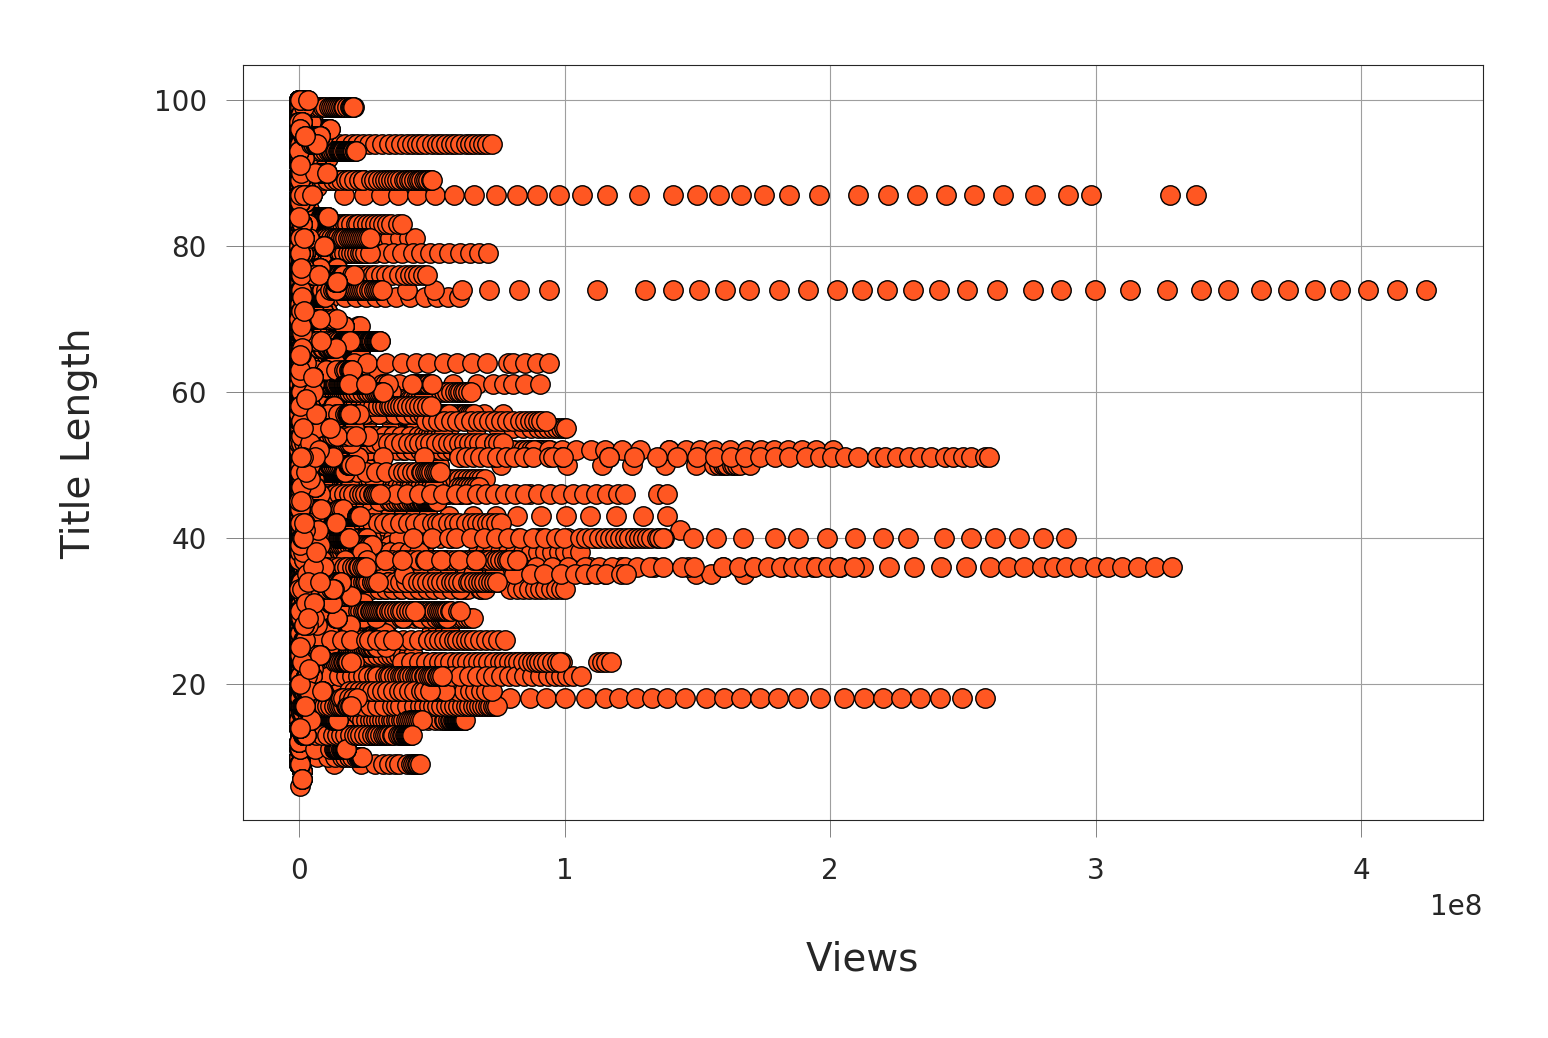

In [87]:
fig, ax = plt.subplots()
ax.scatter(x=df['views'], y=df['title_length'], color=PLOT_COLORS[2], edgecolors="#000000", linewidths=0.5)
ax.set(xlabel="Views", ylabel="Title Length");

In [88]:
df['title'].value_counts()

Maroon 5 - Wait                                                                                   40
Justin Timberlake’s FULL Pepsi Super Bowl LII Halftime Show! | NFL Highlights                     38
Anne-Marie - 2002 [Official Video]                                                                38
Jurassic World: Fallen Kingdom - Official Trailer #2 [HD]                                         38
To Our Daughter                                                                                   38
Royce da 5'9 - Caterpillar ft. Eminem, King Green                                                 37
BHAD BHABIE feat. Lil Yachty - Gucci Flip Flops (Official Music Video) | Danielle Bregoli         37
Enrique Iglesias - MOVE TO MIAMI (Official Video) ft. Pitbull                                     37
VENOM - Official Teaser Trailer (HD)                                                              37
Florence + The Machine - Hunger                                                            

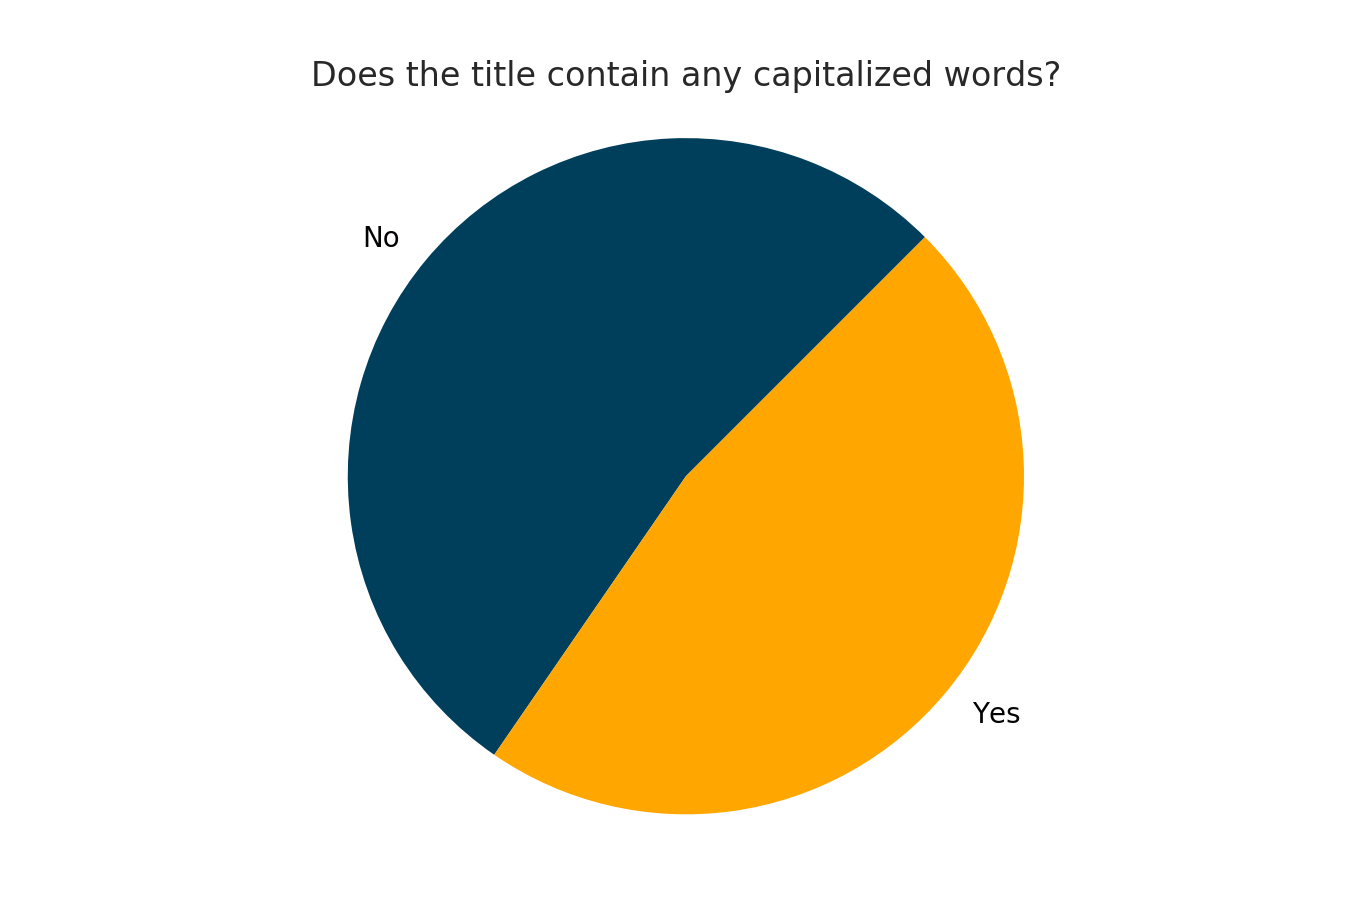

In [89]:
def contains_capitalized_word(s):
    for w in s.split():
        if w.isupper():
            return True
    return False


df["contains_capitalized"] = df["title"].apply(contains_capitalized_word)

value_counts = df["contains_capitalized"].value_counts().to_dict()
fig, ax = plt.subplots()

ax.pie([value_counts[False], value_counts[True]], labels=['No', 'Yes'], colors=['#003f5c', '#ffa600'], textprops={'color': '#040204'}, startangle=45)
ax.axis('equal')

ax.set_title('Does the title contain any capitalized words?');

In [90]:
df["contains_capitalized"].value_counts(normalize=True)

False   0.53
True    0.47
Name: contains_capitalized, dtype: float64

In [91]:
title_words = list(df["title"].apply(lambda x: x.split()))
title_words = [x for y in title_words for x in y]
Counter(title_words).most_common(5)

[('-', 17845),
 ('|', 8728),
 ('The', 6012),
 ('Video)', 3757),
 ('(Official', 3526)]

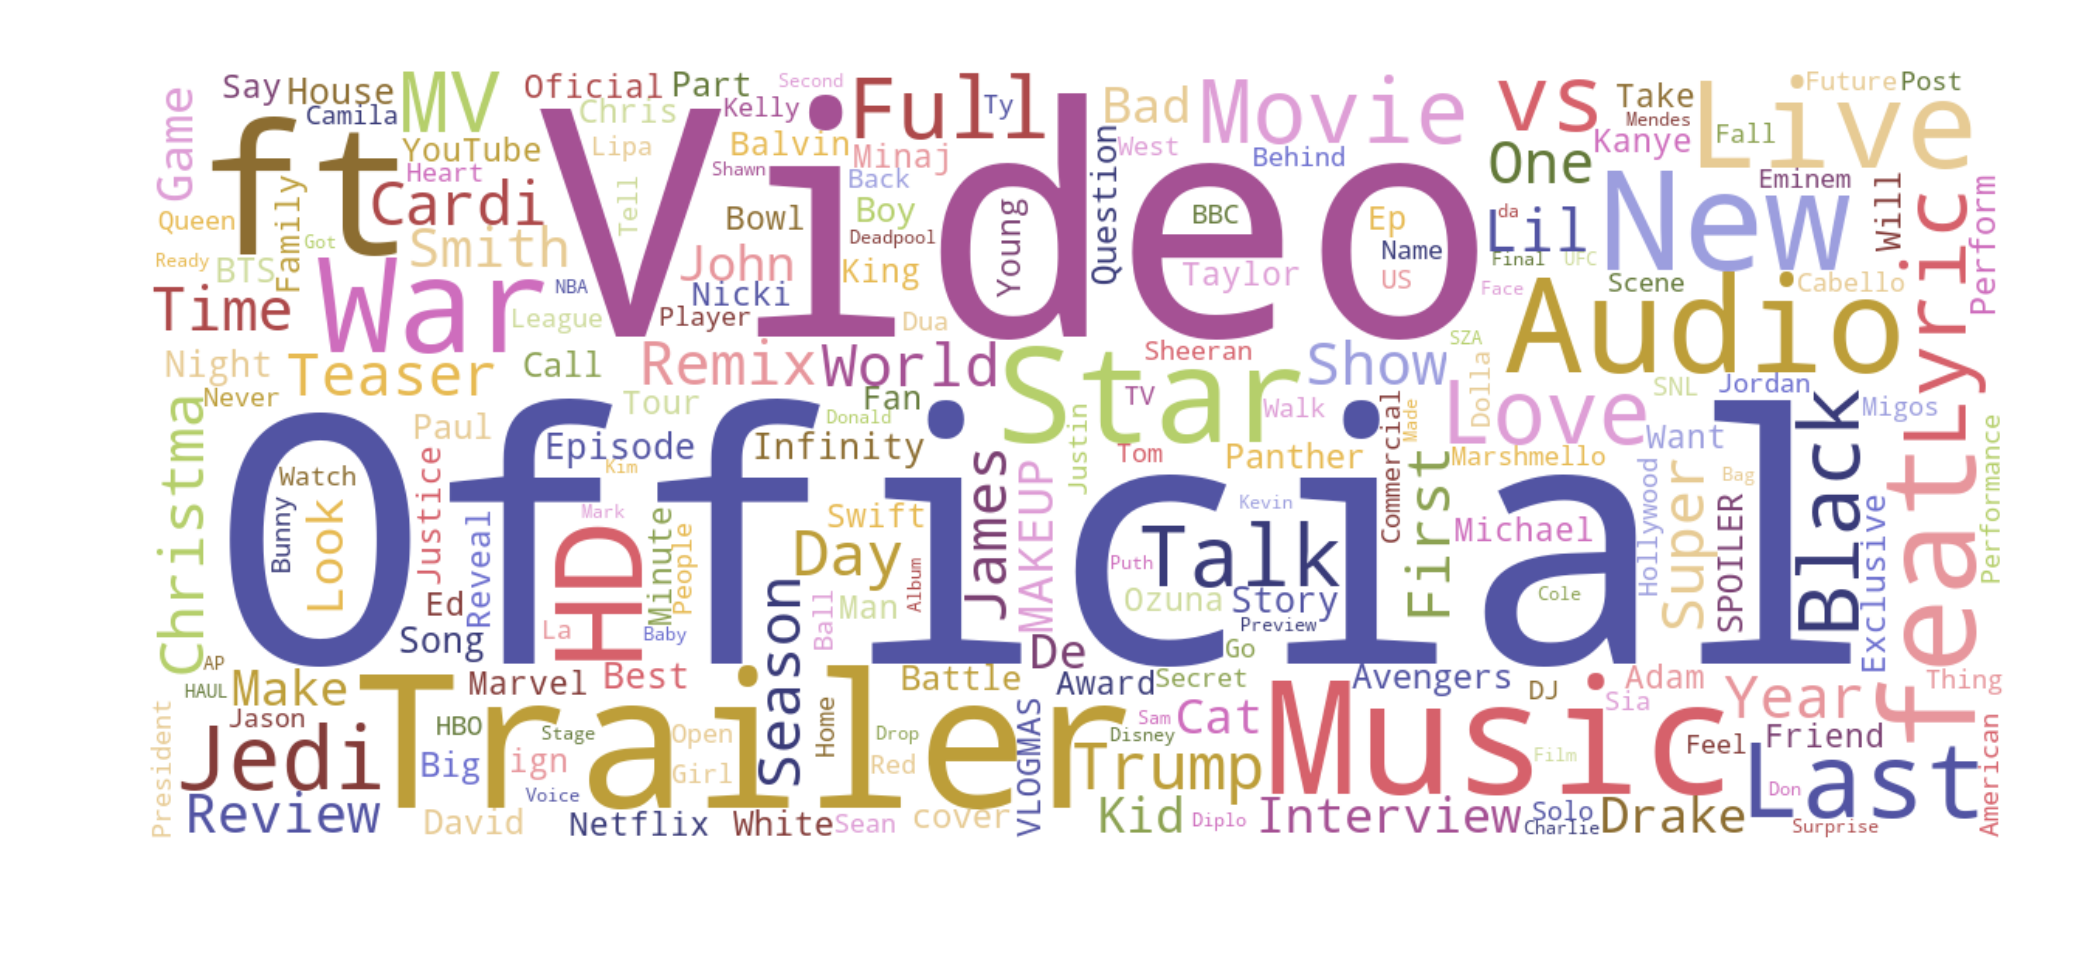

In [92]:
wc = wordcloud.WordCloud(width=1200, height=500, 
                         collocations=False, background_color="white", 
                         colormap="tab20b").generate(" ".join(title_words))
plt.figure(figsize=(12,6))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off");

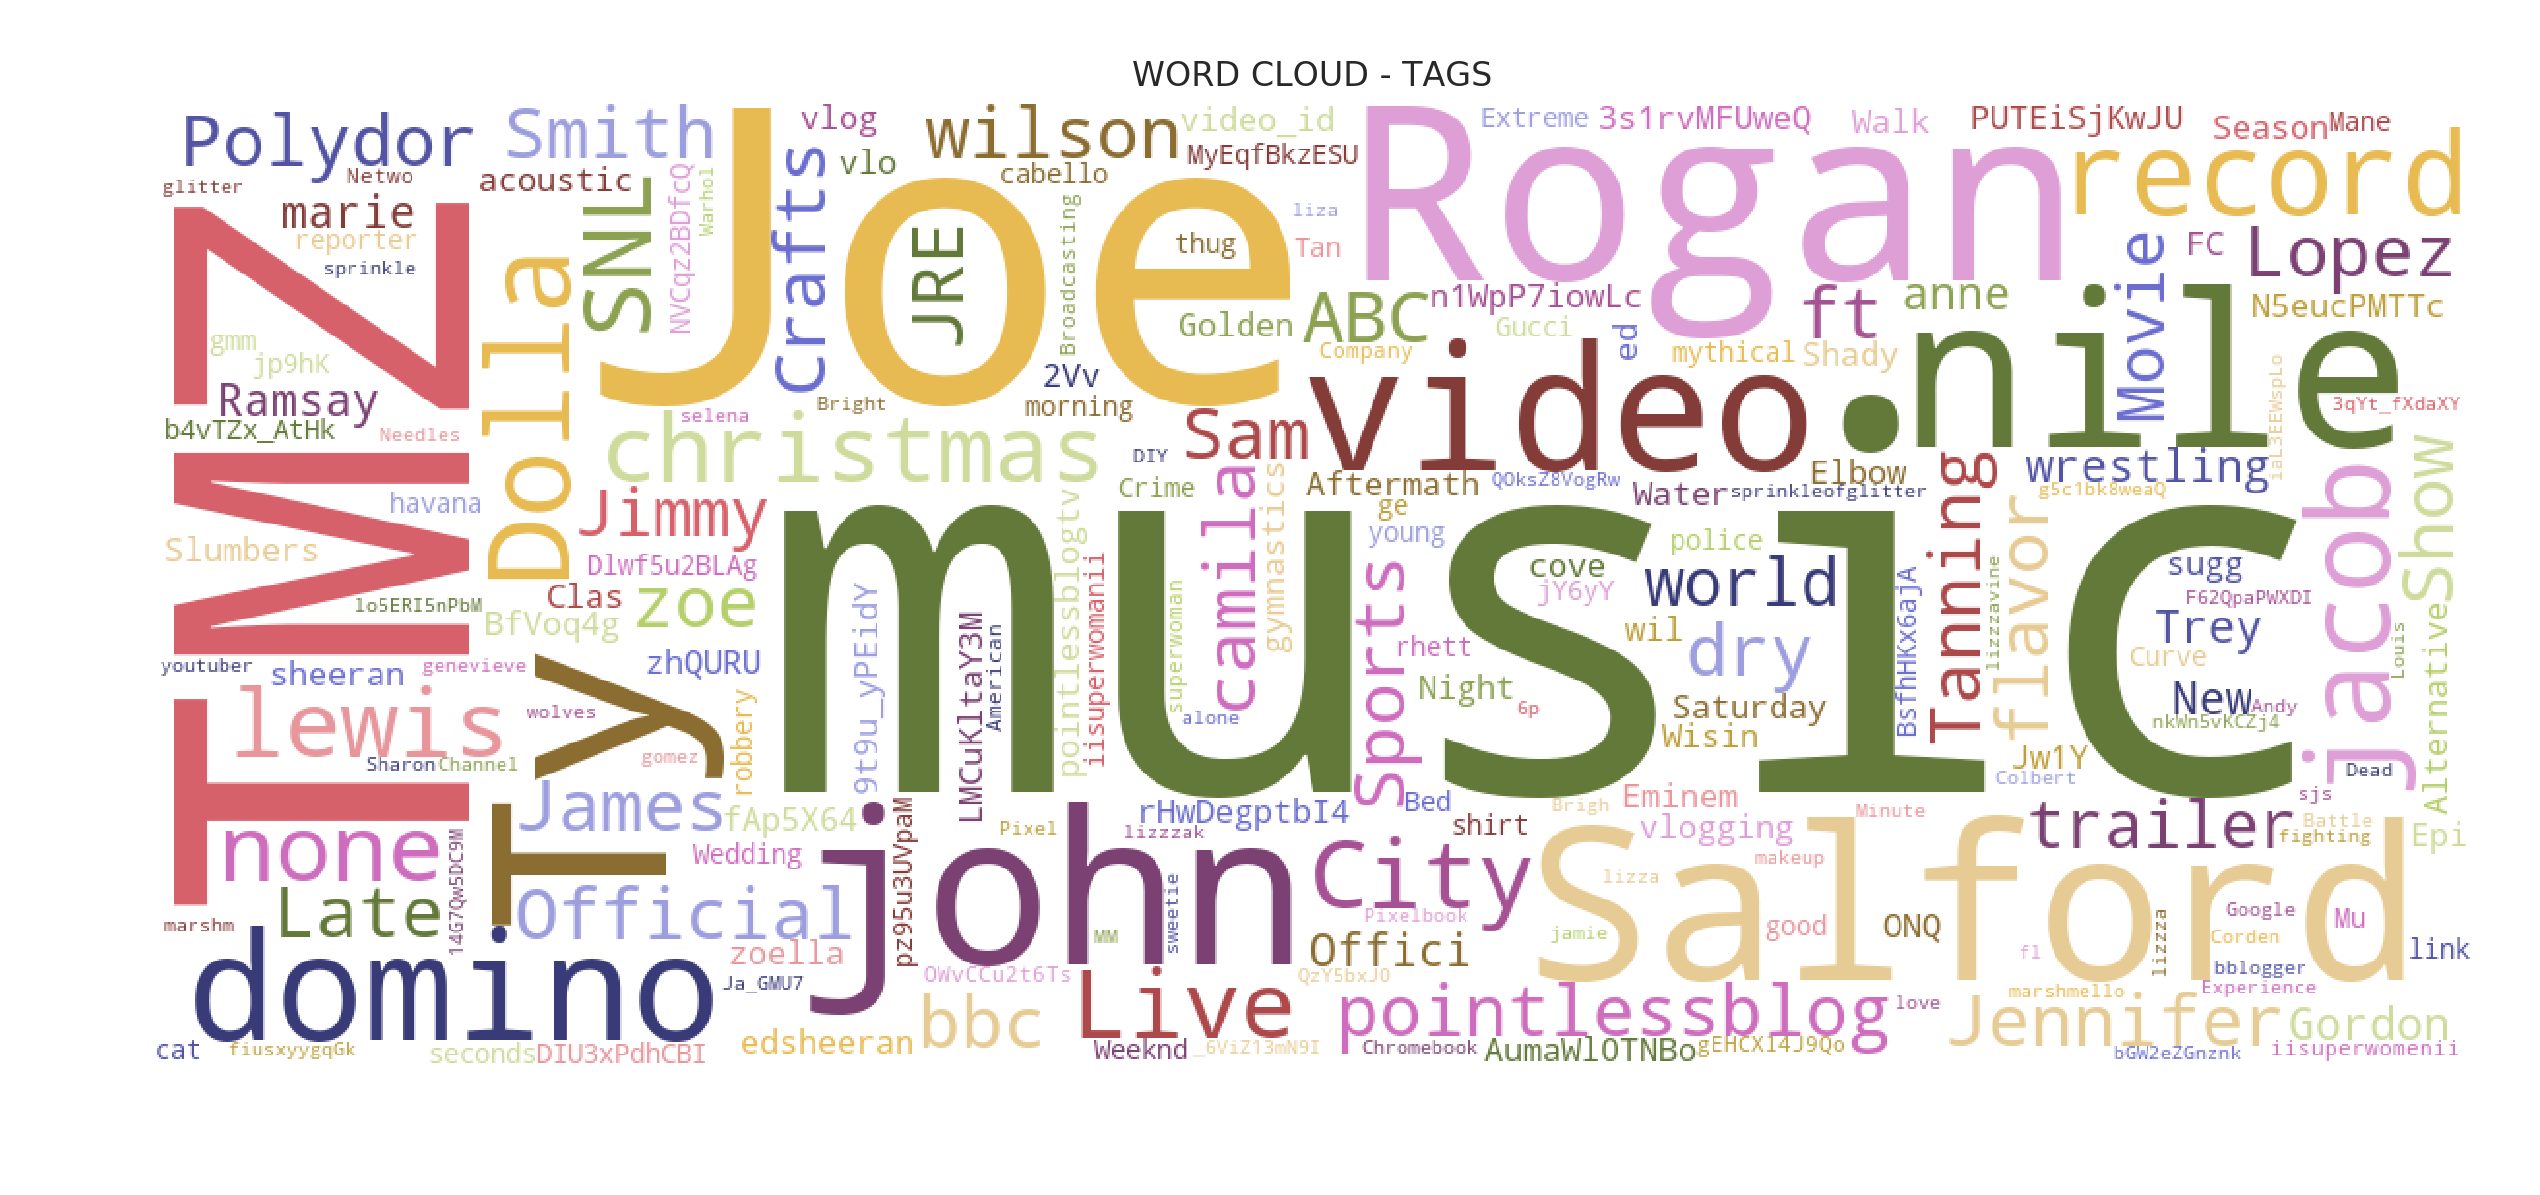

In [93]:
plt.figure(figsize = (15,15))
stopwords = set(STOPWORDS)
newStopWords= ['https', 'youtube', 'VIDEO','youtu','CHANNEL', 'WATCH']
stopwords.update(newStopWords)

wordcloud = WordCloud(width=1200, height=500, 
                         collocations=False, background_color="white", 
                         colormap="tab20b").generate(str(df['tags']))

print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.title("WORD CLOUD - TAGS")
plt.axis('off')
plt.show();

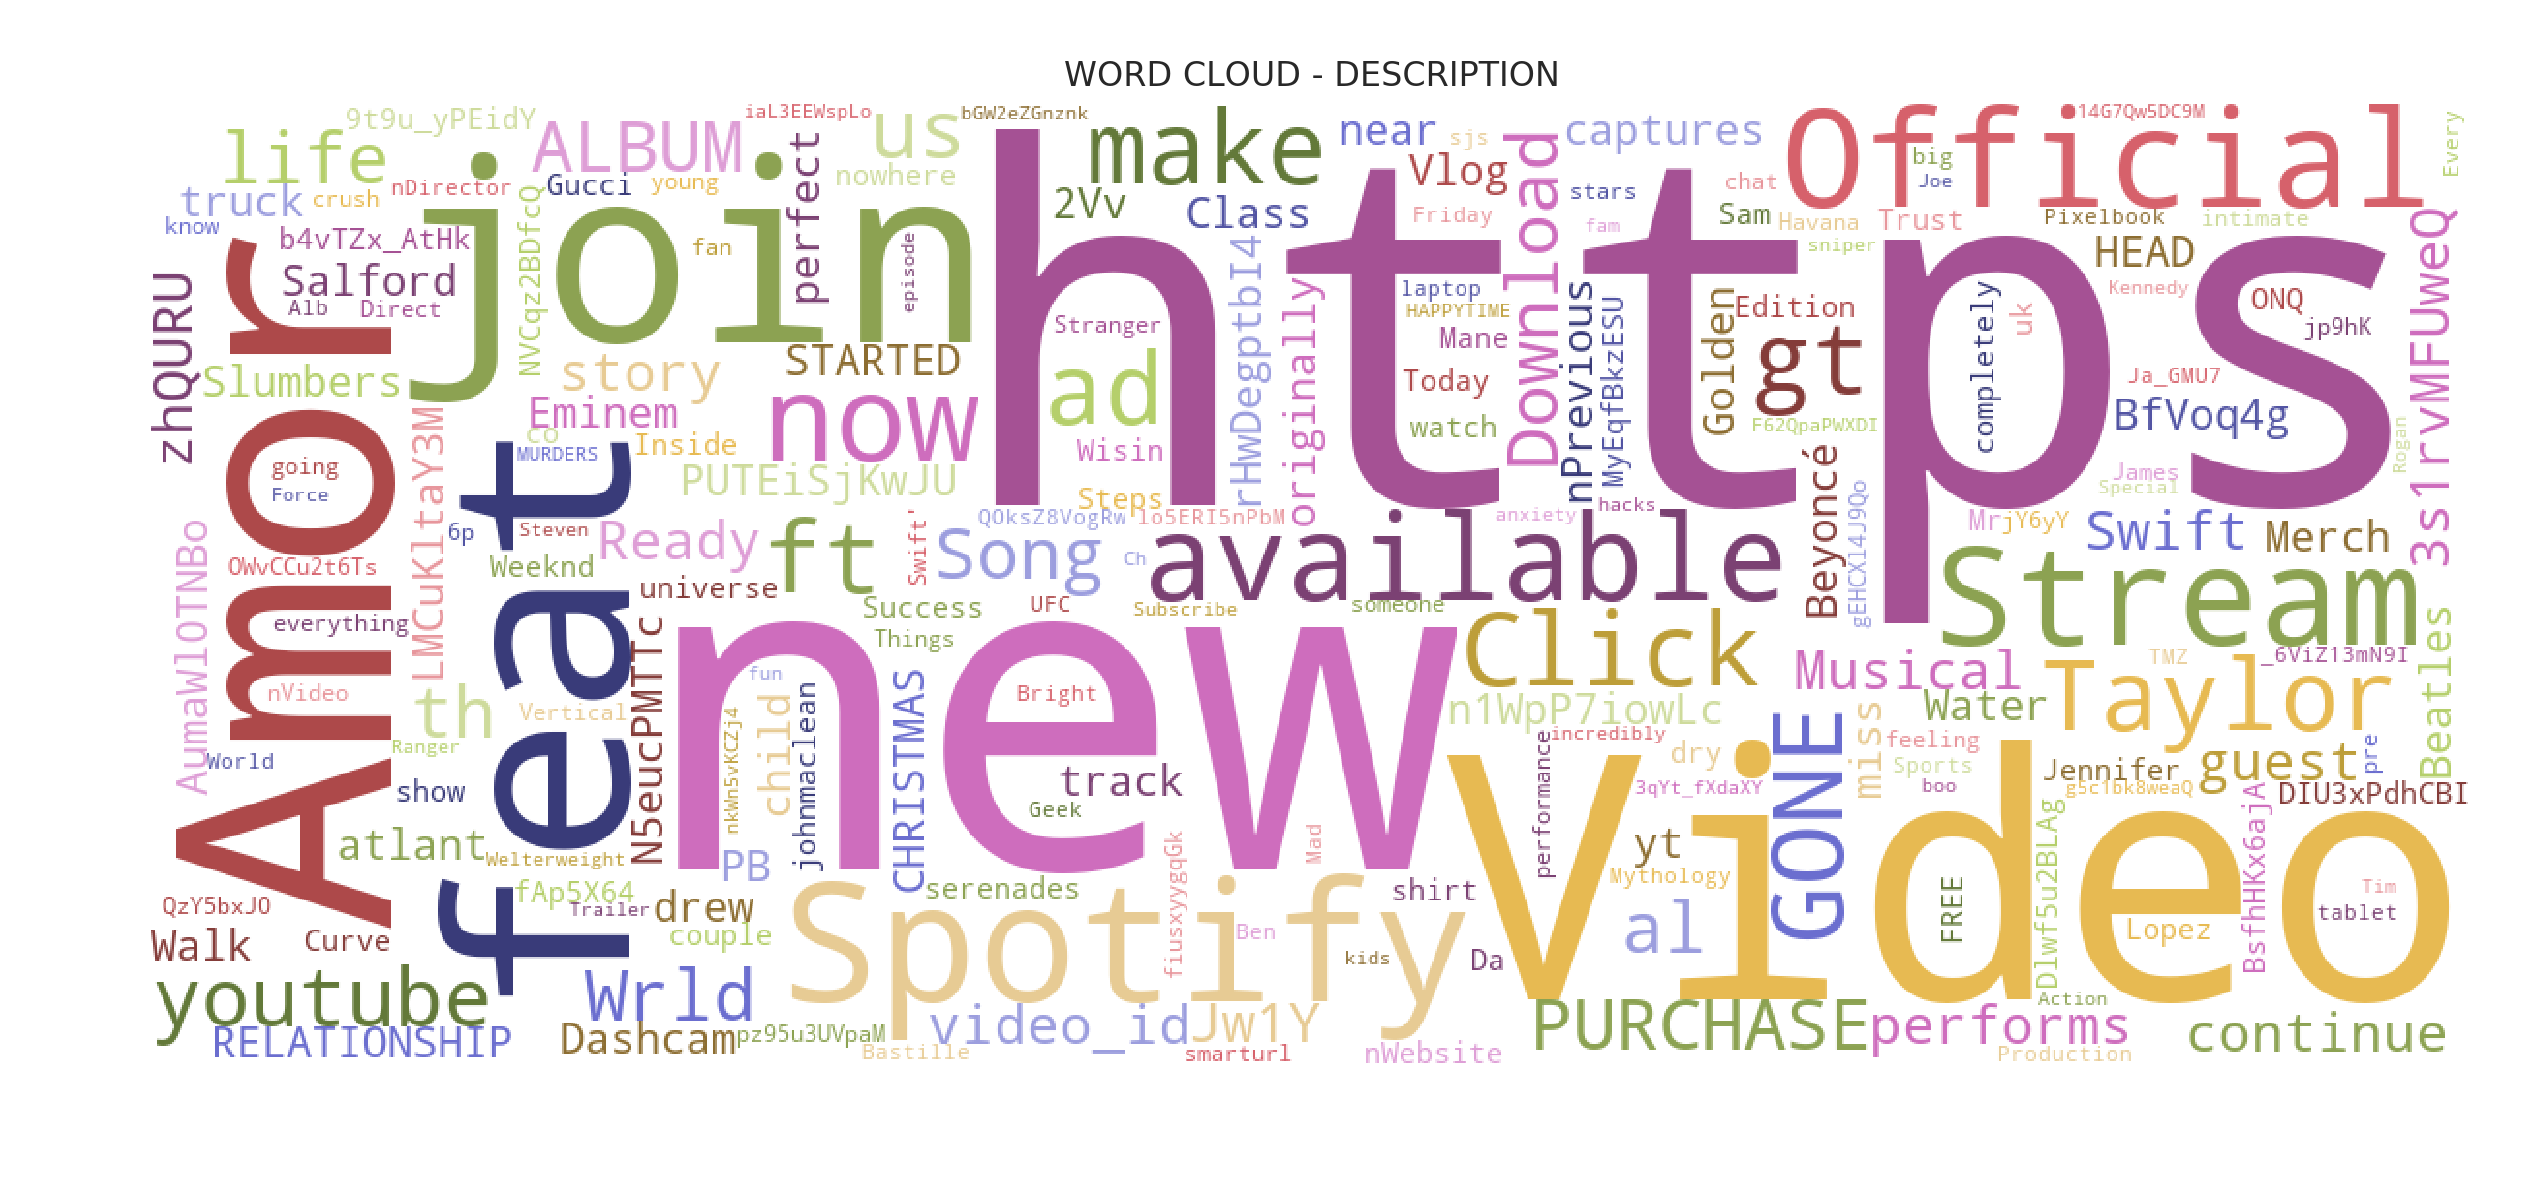

In [94]:
plt.figure(figsize = (15,15))
stopwords = set(STOPWORDS)
newStopWords= ['https', 'youtube', 'VIDEO','youtu','CHANNEL', 'WATCH']
stopwords.update(newStopWords)

wordcloud = WordCloud(width=1200, height=500, 
                         collocations=False, background_color="white", 
                         colormap="tab20b").generate(str(df['description']))

print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.title("WORD CLOUD - DESCRIPTION")
plt.axis('off')
plt.show();

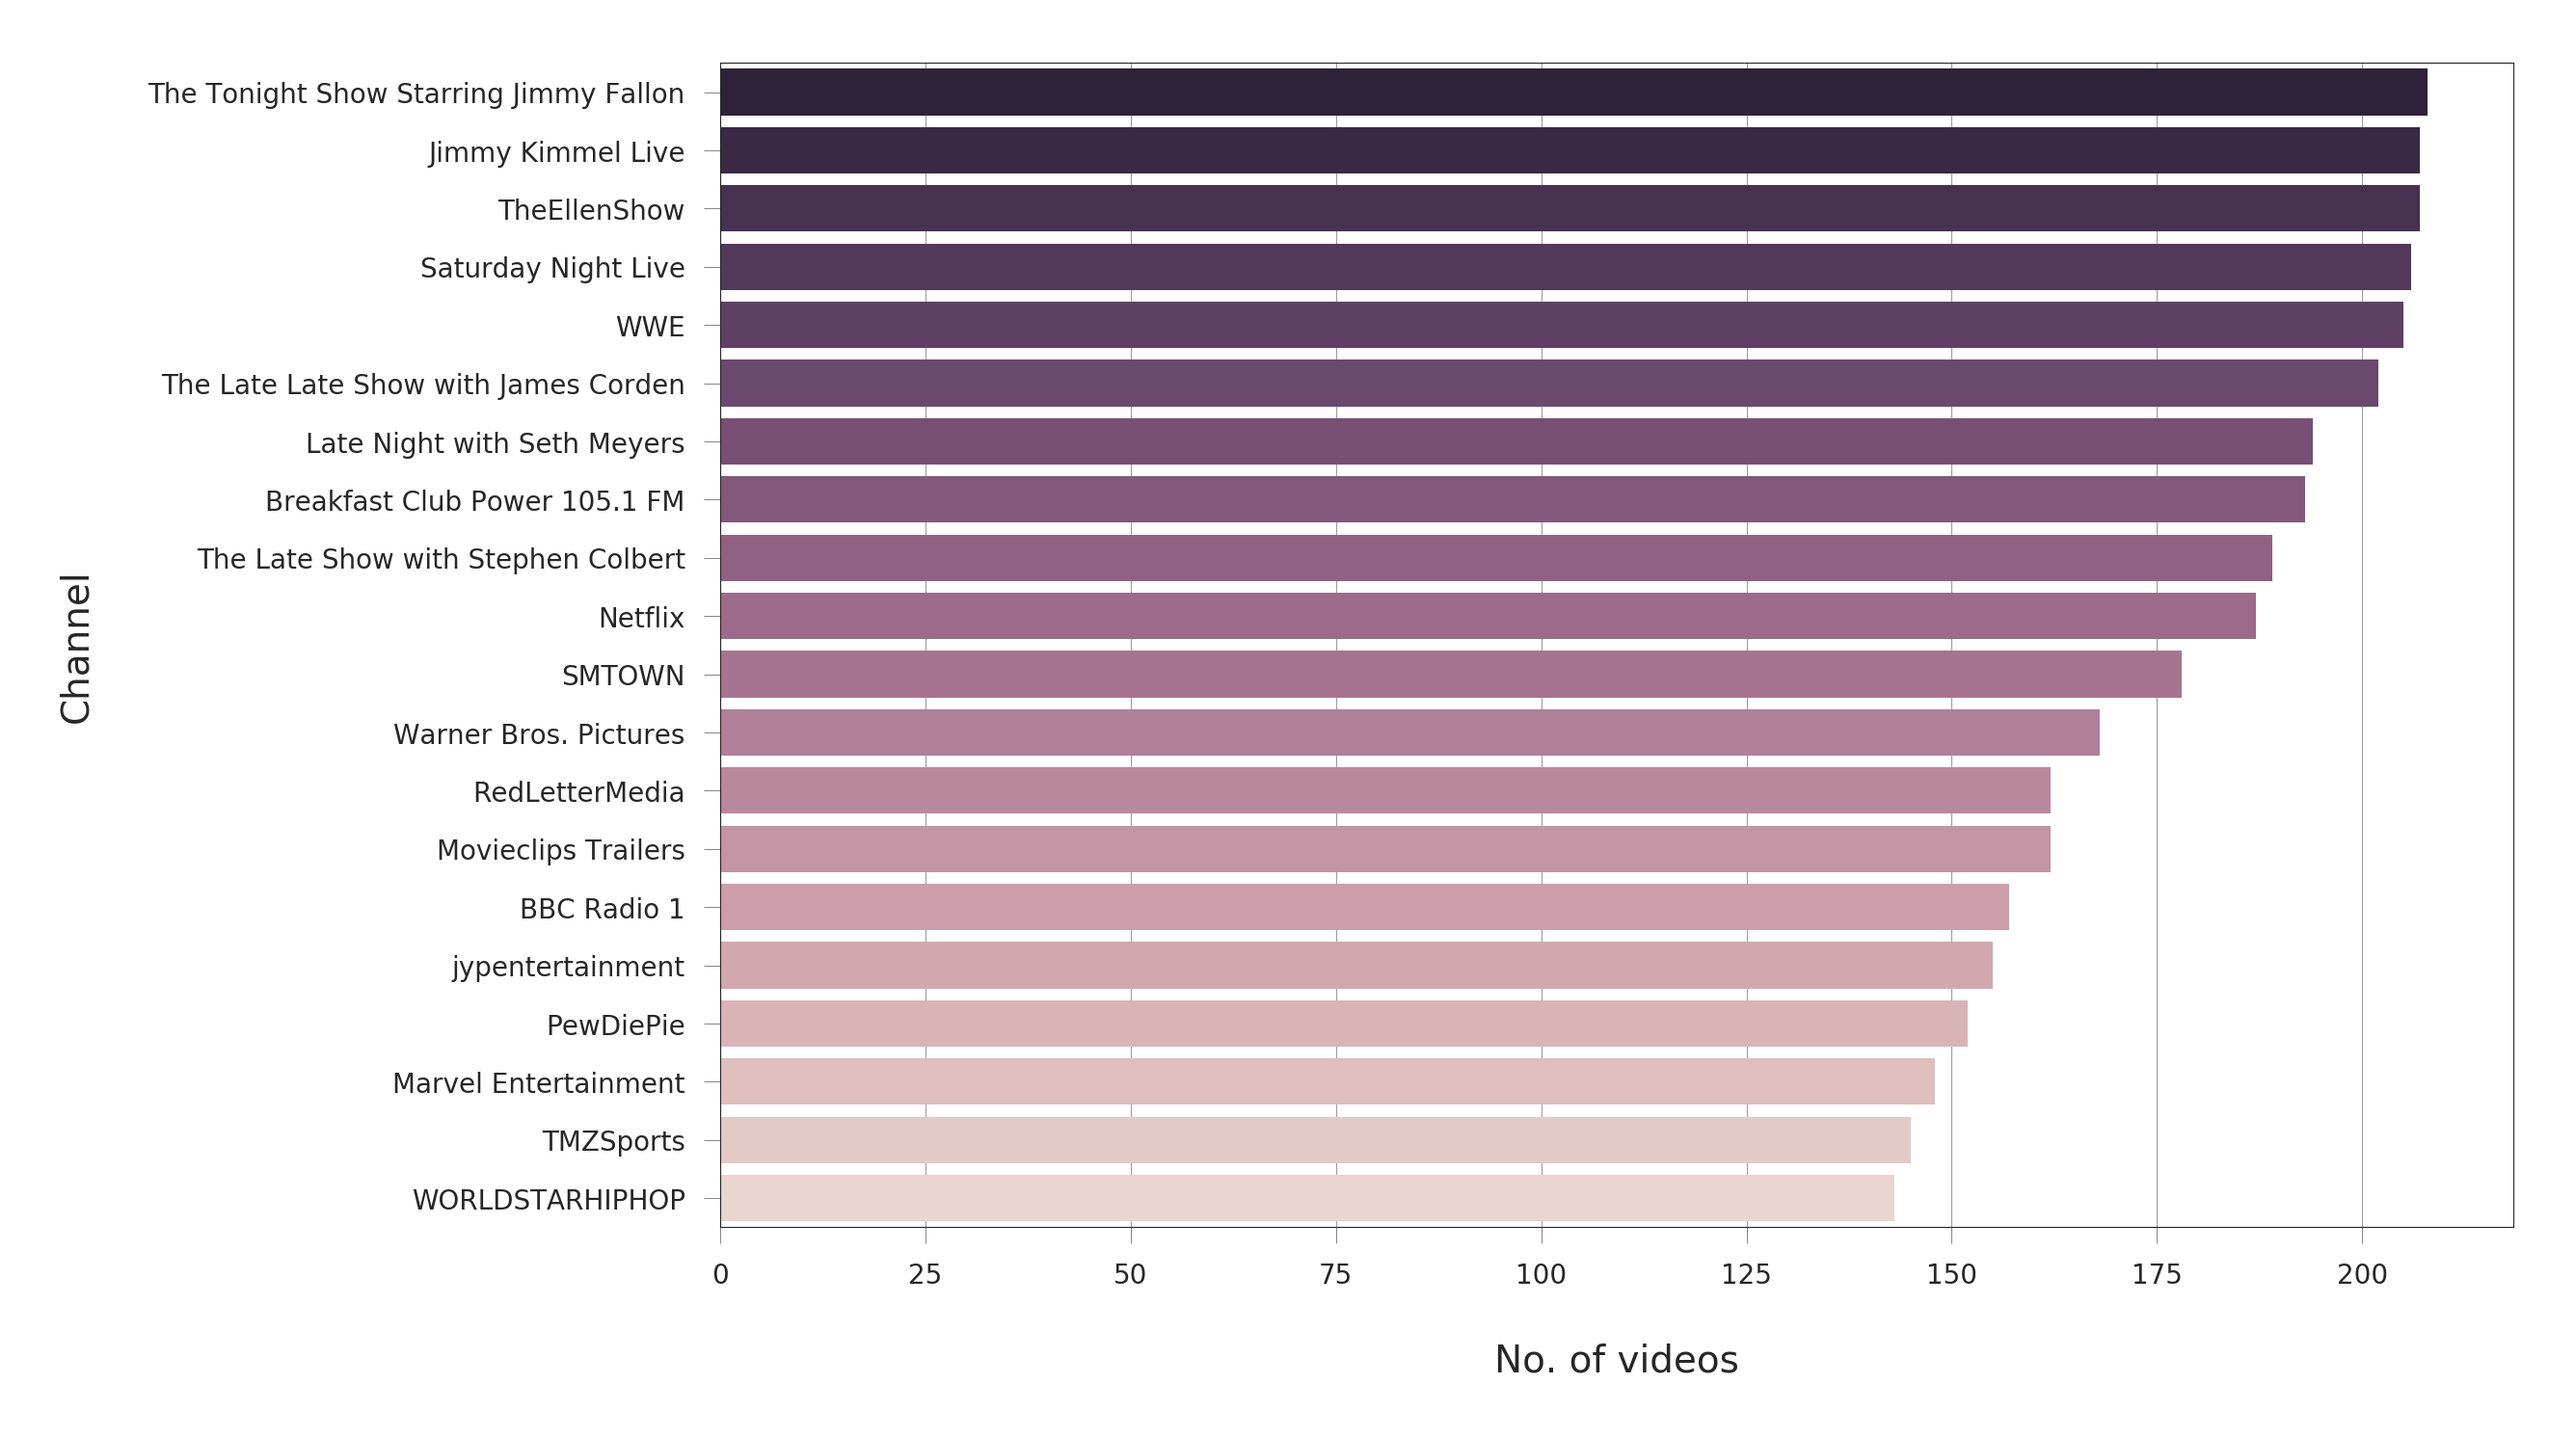

In [95]:
cdf = df.groupby("channel_title").size().reset_index(name="video_count") \
    .sort_values("video_count", ascending=False).head(20)

fig, ax = plt.subplots(figsize=(12,8))
sns.barplot(x="video_count", y="channel_title", data=cdf,
                palette=sns.cubehelix_palette(n_colors=20, reverse=True), ax=ax)
ax.set(xlabel="No. of videos", ylabel="Channel");

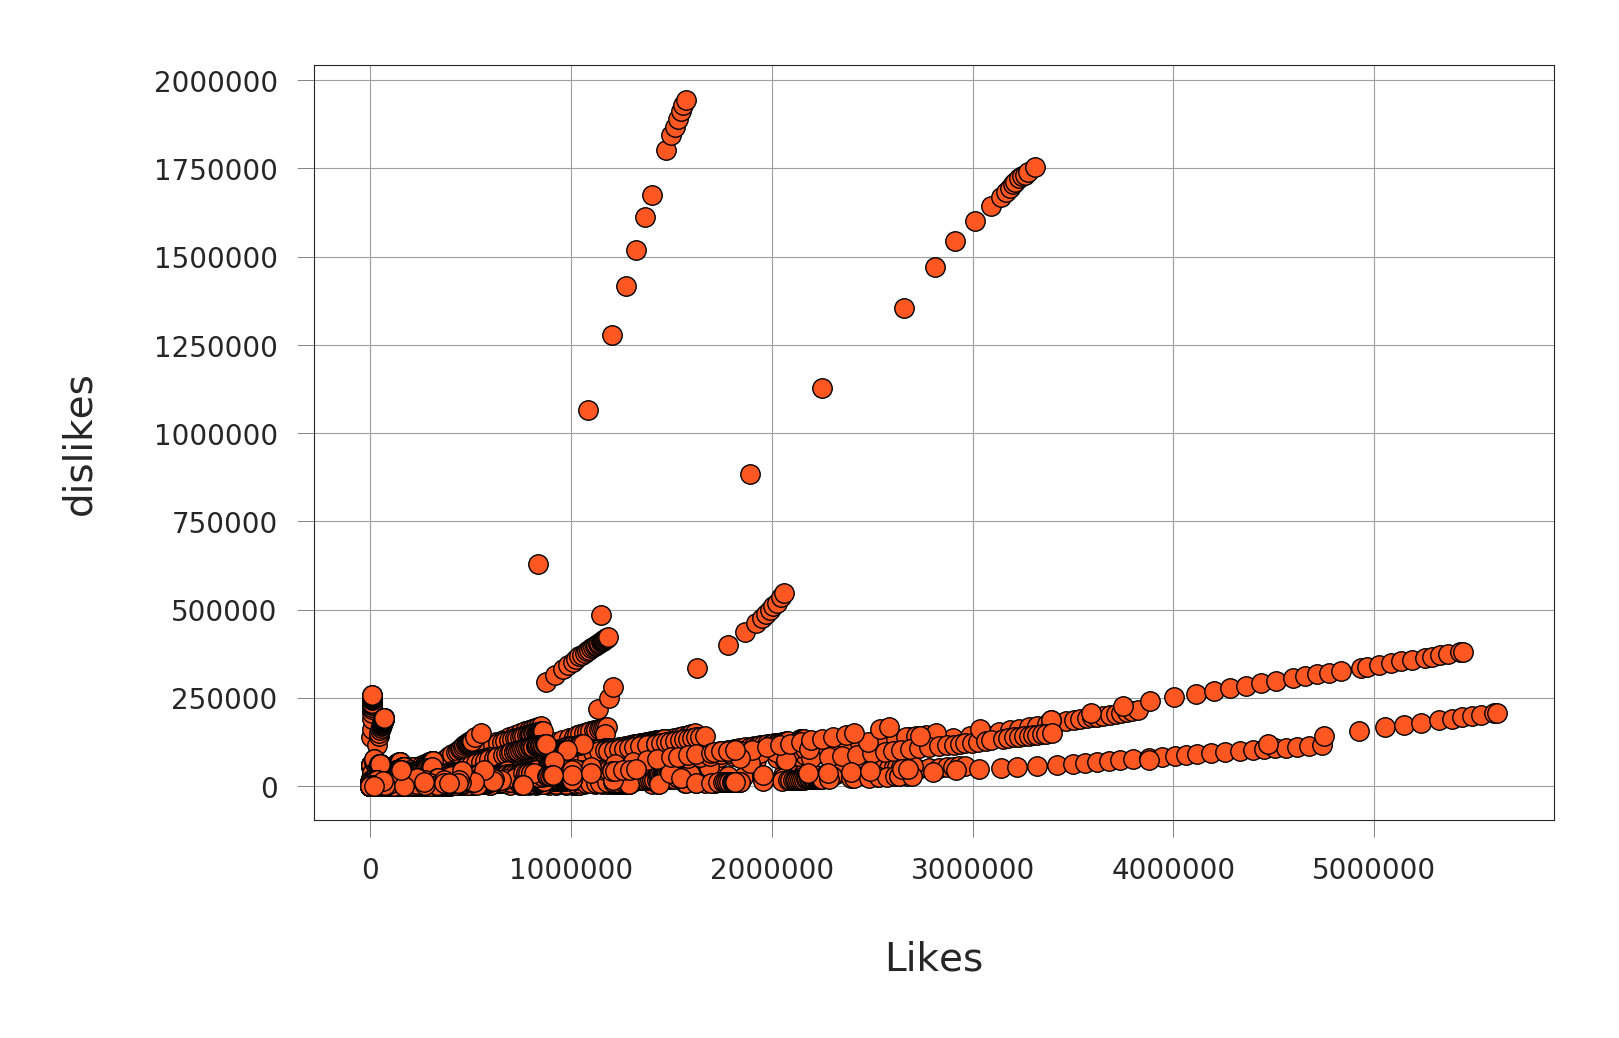

In [96]:
fig, ax = plt.subplots()
plt.scatter(x=df['likes'], y=df['dislikes'], color=PLOT_COLORS[2], edgecolors="#000000", linewidths=0.5)
ax.set(xlabel="Likes", ylabel="dislikes");

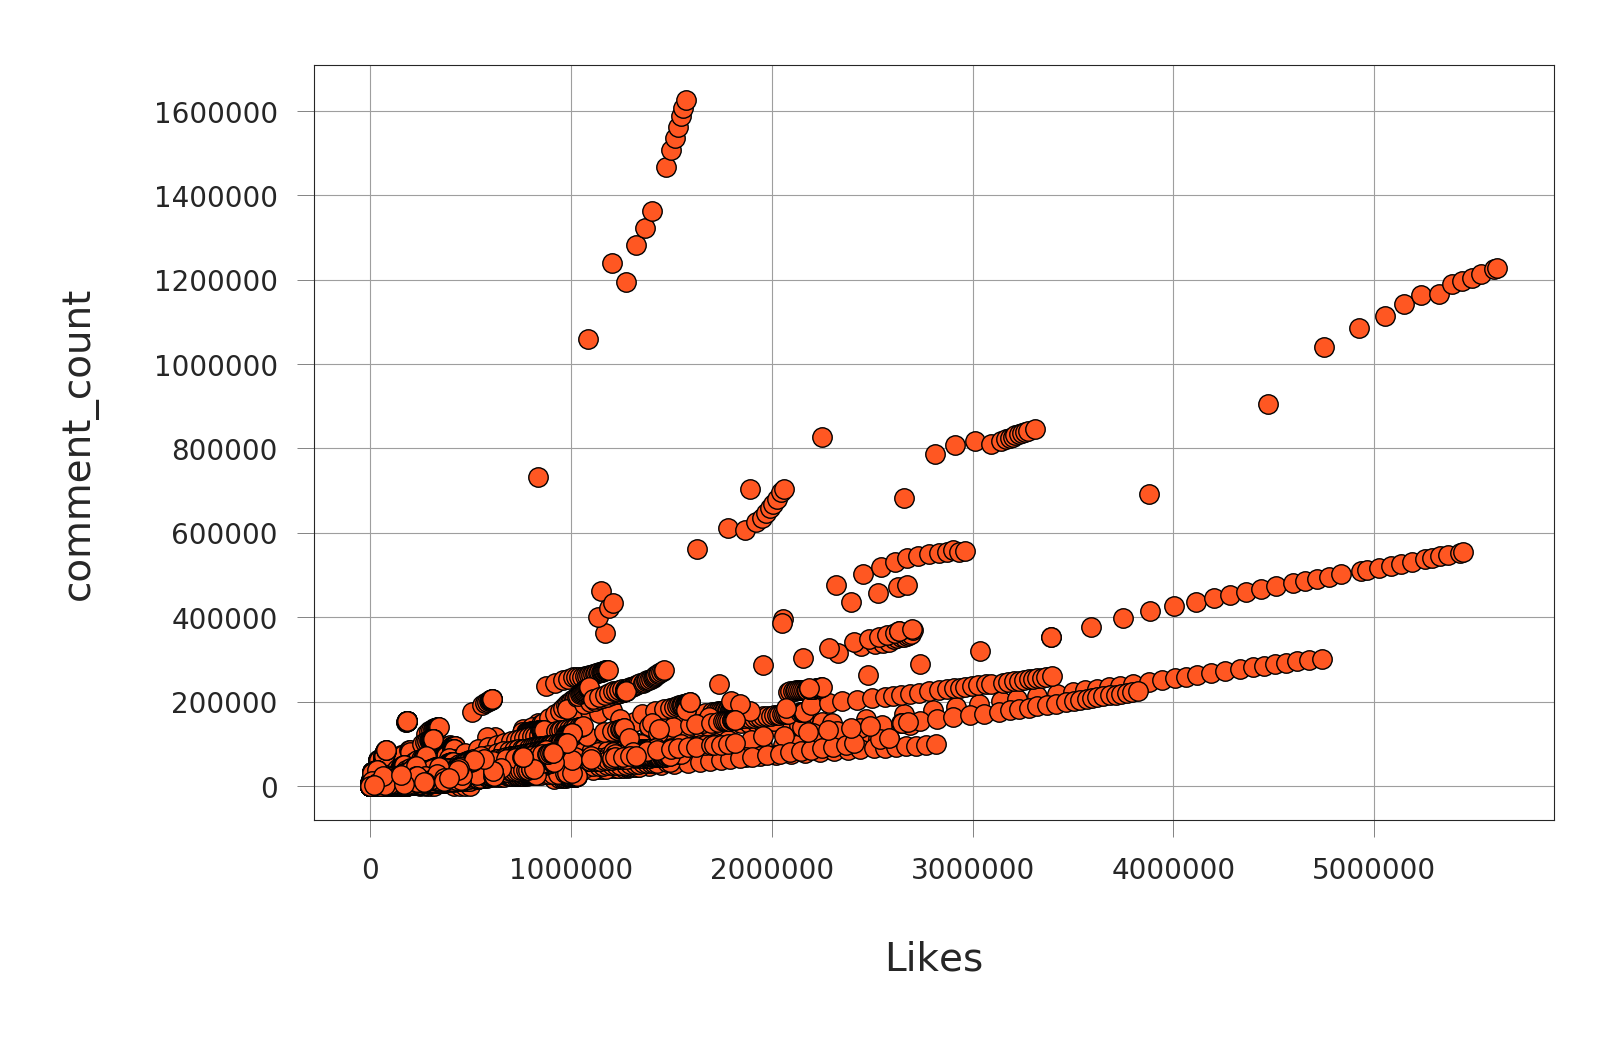

In [97]:
fig, ax = plt.subplots()
plt.scatter(x=df['likes'], y=df['comment_count'], color=PLOT_COLORS[2], edgecolors="#000000", linewidths=0.5)
ax.set(xlabel="Likes", ylabel="comment_count");

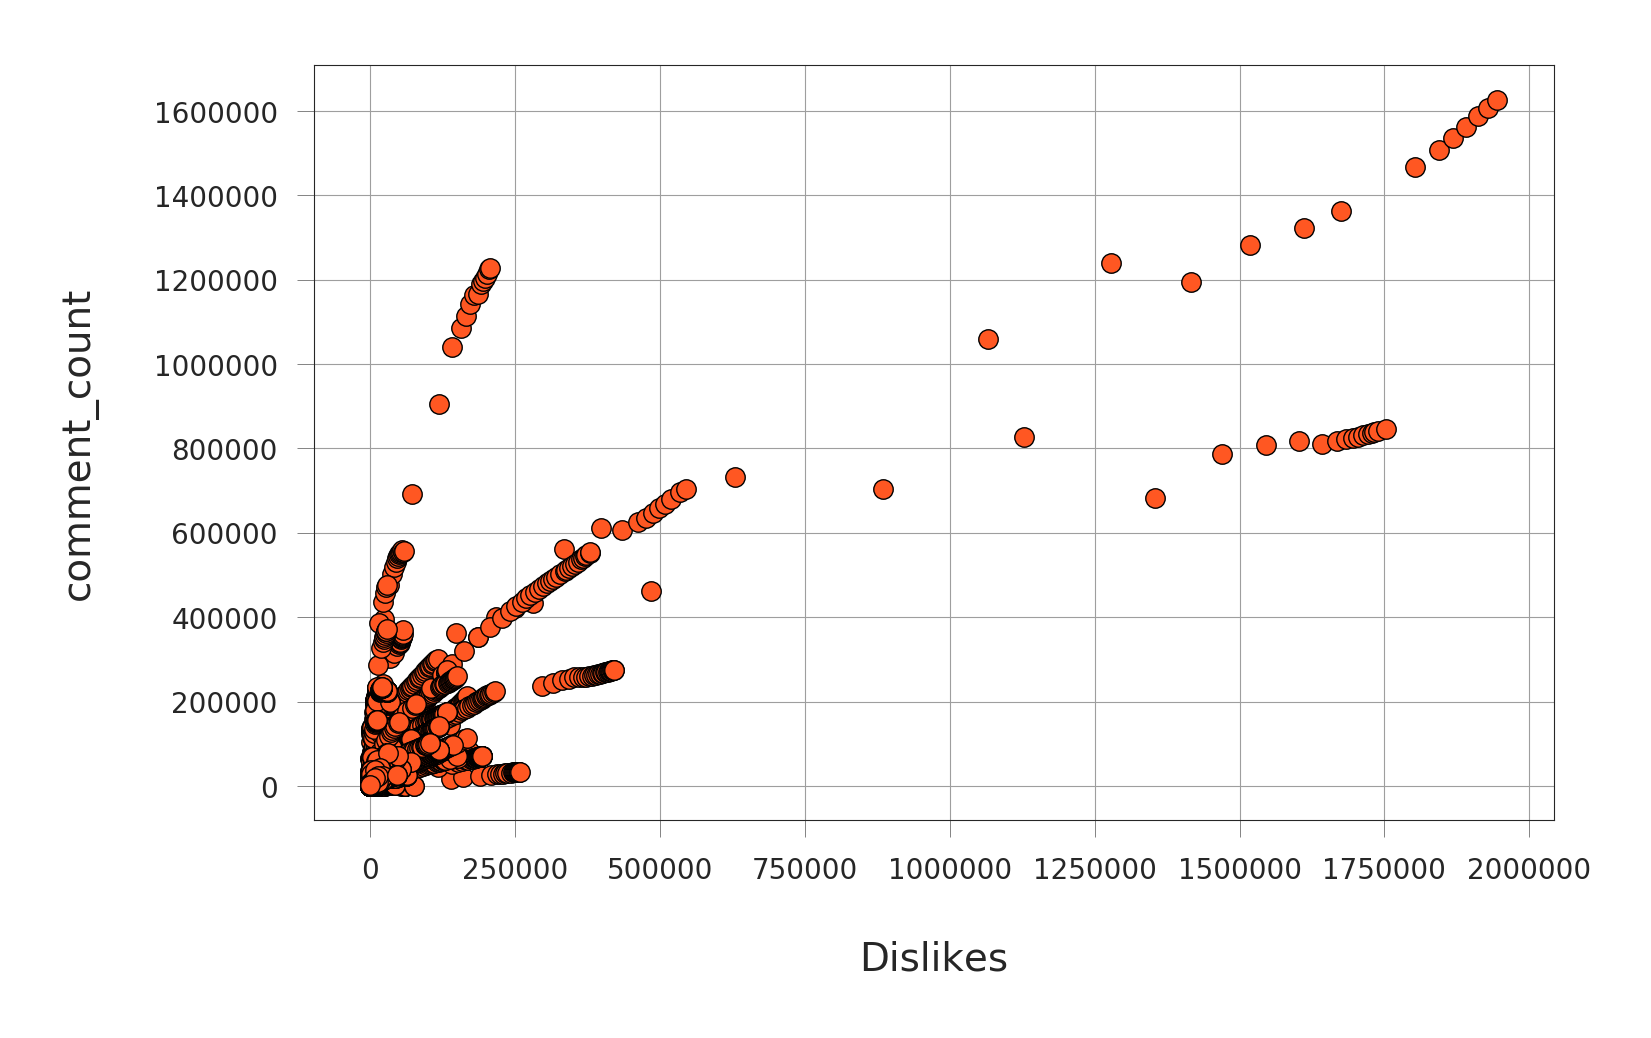

In [98]:
fig, ax = plt.subplots()
plt.scatter(x=df['dislikes'], y=df['comment_count'], color=PLOT_COLORS[2], edgecolors="#000000", linewidths=0.5)
ax.set(xlabel="Dislikes", ylabel="comment_count");